# MSc Project : Analysis 03 interannual variability

#### Checking the pentad variation of CC-scaling

pentad-1 -> 2001-2005

pentad-2 -> 2006-2010

pentad-3 -> 2011-2015

pentad-4 -> 2016-2020

### setting up the environment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4
# import pandas as pd
import dask
# from mpl_toolkits.basemap import Basemap
# from datetime import datetime
# from datetime import timedelta
# from scipy import stats
# import scipy.interpolate as interp
%matplotlib inline

In [3]:
from functions import ccplot, binning

In [4]:
import seaborn as sns
# Use seaborn style defaults and set default figure size
# plt.style.use('seaborn-pastel')
# sns.set_theme(style="ticks")
plt.style.use(['science', 'notebook'])

In [5]:
# Colormap selection
xr.set_options(cmap_divergent='BrBG', cmap_sequential='YlGnBu')

### importing and preparing the data

In [8]:
mfdata_DIR = './data/GPM_lowres_data/gpm_200[1-5].nc'

# gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
gpm = xr.open_mfdataset(mfdata_DIR, chunks=dict(time=1000, lat=-1, lon=-1), engine='netcdf4', parallel=True)
# gpm = xr.open_mfdataset(mfdata_DIR, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
# gpm = xr.open_dataset('./data/GPM_data/gpm_2000.nc', chunks={"time":2000})

In [9]:
gpm

<xarray.Dataset>
Dimensions:    (time: 87648, lon: 161, lat: 161)
Coordinates:
  * time       (time) datetime64[ns] 2001-01-01 ... 2005-12-31T23:30:00
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>

In [10]:
precip = gpm.precipCal.resample(time = '1H').mean()

In [11]:
precip = precip.chunk(dict(time=1000, lat=-1, lon=-1))

In [12]:
precip

<xarray.DataArray 'precipCal' (time: 43824, lat: 161, lon: 161)>
dask.array<rechunk-merge, shape=(43824, 161, 161), dtype=float32, chunksize=(1000, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 ... 2005-12-31T23:00:00
  * lon      (lon) float64 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.0 39.25 39.5 39.75 40.0

In [13]:
mfdata_DIR2 = './data/era_data/era_200[1-5].nc'

# era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=8000, lat=40, lon=40), engine='netcdf4', combine='nested', concat_dim='time', parallel=True)
era = xr.open_mfdataset(mfdata_DIR2, chunks=dict(time=1000, lat=40, lon=40), engine='netcdf4', parallel=True)
# era = xr.open_mfdataset(mfdata_DIR2, engine='netcdf4', combine='nested', concat_dim='time', parallel=True)

In [15]:
era = era.transpose('time', 'latitude', 'longitude')

In [16]:
era = era.rename_dims({'longitude':'lon', 'latitude':'lat'})

In [17]:
era = era.rename({'longitude':'lon', 'latitude':'lat'})

In [18]:
era

<xarray.Dataset>
Dimensions:  (lon: 161, lat: 161, time: 43824)
Coordinates:
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0
  * time     (time) datetime64[ns] 2001-01-01 ... 2005-12-31T23:00:00
Data variables:
    u10      (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
    v10      (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
    d2m      (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
    t2m      (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
    mx2t     (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
    mn2t     (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
    sst      (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-10-04 11:56:24 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [19]:
t2m = era.t2m
d2m = era.d2m

In [20]:
t2m = t2m.chunk(dict(time=1000, lat=-1, lon=-1))
d2m = d2m.chunk(dict(time=1000, lat=-1, lon=-1))
t2m

<xarray.DataArray 't2m' (time: 43824, lat: 161, lon: 161)>
dask.array<rechunk-merge, shape=(43824, 161, 161), dtype=float32, chunksize=(1000, 161, 161), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 60.0 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float32 40.0 39.75 39.5 39.25 39.0 ... 1.0 0.75 0.5 0.25 0.0
  * time     (time) datetime64[ns] 2001-01-01 ... 2005-12-31T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [21]:
ds_comb = xr.merge([precip, t2m, d2m])

In [22]:
ds_comb

<xarray.Dataset>
Dimensions:    (lon: 161, lat: 161, time: 43824)
Coordinates:
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
  * time       (time) datetime64[ns] 2001-01-01 ... 2005-12-31T23:00:00
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
    t2m        (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>
    d2m        (time, lat, lon) float32 dask.array<chunksize=(1000, 161, 161), meta=np.ndarray>

In [23]:
mon = [6,7,8,9]
premon = [3,4,5]
postmon = [10,11,12]
wint = [1,2]

In [24]:
ds_comb_mon = xr.concat([list(ds_comb.groupby('time.month'))[i-1][1] for i in mon], dim='time')

In [25]:
ds_comb_mon = ds_comb_mon.sortby('time.year')

In [26]:
ds_comb_mon

<xarray.Dataset>
Dimensions:    (lon: 161, lat: 161, time: 14640)
Coordinates:
  * lon        (lon) float64 60.0 60.25 60.5 60.75 ... 99.25 99.5 99.75 100.0
  * lat        (lat) float64 0.0 0.25 0.5 0.75 1.0 ... 39.25 39.5 39.75 40.0
  * time       (time) datetime64[ns] 2001-06-01 ... 2005-09-30T23:00:00
Data variables:
    precipCal  (time, lat, lon) float32 dask.array<chunksize=(376, 161, 161), meta=np.ndarray>
    t2m        (time, lat, lon) float32 dask.array<chunksize=(376, 161, 161), meta=np.ndarray>
    d2m        (time, lat, lon) float32 dask.array<chunksize=(376, 161, 161), meta=np.ndarray>

In [30]:
precip = ds_comb_mon.precipCal
t2m = ds_comb_mon.t2m
d2m = ds_comb_mon.d2m

In [31]:
precip_daily_rate = precip[::-1].rolling(time=24).sum()[::-1]

In [32]:
# Set values less than 0.1 mm/hr to nan

# precip = xr.where(precip_daily_rate > 1, precip, np.nan).chunk(dict(time=-1, lat=40, lon=40))
# # precip = xr.where(precip > 0.1, precip, np.nan).chunk(dict(time=-1, lat=40, lon=40))
# precip = precip.where(precip > 0).chunk(dict(time=-1, lat=40, lon=40))
# t2m = t2m.where(precip != np.nan).chunk(dict(time=-1, lat=40, lon=40))
# d2m = d2m.where(precip != np.nan).chunk(dict(time=-1, lat=40, lon=40))

precip = xr.where(precip_daily_rate > 0.1, precip, np.nan)
precip = precip.where(precip > 0)
t2m = t2m.where(precip != np.nan)
d2m = d2m.where(precip != np.nan)

In [33]:
ind_precip = precip.chunk(dict(time=-1, lat=-1, lon=-1))
ind_t2m = t2m.chunk(dict(time=-1, lat=-1, lon=-1))
ind_d2m = d2m.chunk(dict(time=-1, lat=-1, lon=-1))

In [34]:
ind_precip_loaded = ind_precip.load()
ind_t2m_loaded = ind_t2m.load()
ind_d2m_loaded = ind_d2m.load()<!DOCTYPE html>

In [36]:
t2m_slope95, t2m_p95, d2m_slope95, d2m_p95, t2m_slope50, t2m_p50, d2m_slope50, d2m_p50  = binning.get_binned_3d(ind_precip_loaded, ind_t2m_loaded, ind_d2m_loaded, bin_nr=20)

Starting the binning process ...
converting data-arrays to numpy arrays ...
Getting freq bins ...
Done, now initializing zero arrays ...
Starting the loop ...


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 1/161 lat and 1/161 lon
Completed 1/161 lat and 2/161 lon
Completed 1/161 lat and 3/161 lon
Completed 1/161 lat and 4/161 lon
Completed 1/161 lat and 5/161 lon
Completed 1/161 lat and 6/161 lon
Completed 1/161 lat and 7/161 lon
Completed 1/161 lat and 8/161 lon
Completed 1/161 lat and 9/161 lon
Completed 1/161 lat and 10/161 lon
Completed 1/161 lat and 11/161 lon
Completed 1/161 lat and 12/161 lon
Completed 1/161 lat and 13/161 lon
Completed 1/161 lat and 14/161 lon
Completed 1/161 lat and 15/161 lon
Completed 1/161 lat and 16/161 lon
Completed 1/161 lat and 17/161 lon
Completed 1/161 lat and 18/161 lon
Completed 1/161 lat and 19/161 lon
Completed 1/161 lat and 20/161 lon
Completed 1/161 lat and 21/161 lon
Completed 1/161 lat and 22/161 lon
Completed 1/161 lat and 23/161 lon
Completed 1/161 lat and 24/161 lon
Completed 1/161 lat and 25/161 lon
Completed 1/161 lat and 26/161 lon
Completed 1/161 lat and 27/161 lon
Completed 1/161 lat and 28/161 lon
Completed 1/161 lat and 29/16

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 2/161 lat and 1/161 lon
Completed 2/161 lat and 2/161 lon
Completed 2/161 lat and 3/161 lon
Completed 2/161 lat and 4/161 lon
Completed 2/161 lat and 5/161 lon
Completed 2/161 lat and 6/161 lon
Completed 2/161 lat and 7/161 lon
Completed 2/161 lat and 8/161 lon
Completed 2/161 lat and 9/161 lon
Completed 2/161 lat and 10/161 lon
Completed 2/161 lat and 11/161 lon
Completed 2/161 lat and 12/161 lon
Completed 2/161 lat and 13/161 lon
Completed 2/161 lat and 14/161 lon
Completed 2/161 lat and 15/161 lon
Completed 2/161 lat and 16/161 lon
Completed 2/161 lat and 17/161 lon
Completed 2/161 lat and 18/161 lon
Completed 2/161 lat and 19/161 lon
Completed 2/161 lat and 20/161 lon
Completed 2/161 lat and 21/161 lon
Completed 2/161 lat and 22/161 lon
Completed 2/161 lat and 23/161 lon
Completed 2/161 lat and 24/161 lon
Completed 2/161 lat and 25/161 lon
Completed 2/161 lat and 26/161 lon
Completed 2/161 lat and 27/161 lon
Completed 2/161 lat and 28/161 lon
Completed 2/161 lat and 29/16

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 3/161 lat and 1/161 lon
Completed 3/161 lat and 2/161 lon
Completed 3/161 lat and 3/161 lon
Completed 3/161 lat and 4/161 lon
Completed 3/161 lat and 5/161 lon
Completed 3/161 lat and 6/161 lon
Completed 3/161 lat and 7/161 lon
Completed 3/161 lat and 8/161 lon
Completed 3/161 lat and 9/161 lon
Completed 3/161 lat and 10/161 lon
Completed 3/161 lat and 11/161 lon
Completed 3/161 lat and 12/161 lon
Completed 3/161 lat and 13/161 lon
Completed 3/161 lat and 14/161 lon
Completed 3/161 lat and 15/161 lon
Completed 3/161 lat and 16/161 lon
Completed 3/161 lat and 17/161 lon
Completed 3/161 lat and 18/161 lon
Completed 3/161 lat and 19/161 lon
Completed 3/161 lat and 20/161 lon
Completed 3/161 lat and 21/161 lon
Completed 3/161 lat and 22/161 lon
Completed 3/161 lat and 23/161 lon
Completed 3/161 lat and 24/161 lon
Completed 3/161 lat and 25/161 lon
Completed 3/161 lat and 26/161 lon
Completed 3/161 lat and 27/161 lon
Completed 3/161 lat and 28/161 lon
Completed 3/161 lat and 29/16

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 4/161 lat and 1/161 lon
Completed 4/161 lat and 2/161 lon
Completed 4/161 lat and 3/161 lon
Completed 4/161 lat and 4/161 lon
Completed 4/161 lat and 5/161 lon
Completed 4/161 lat and 6/161 lon
Completed 4/161 lat and 7/161 lon
Completed 4/161 lat and 8/161 lon
Completed 4/161 lat and 9/161 lon
Completed 4/161 lat and 10/161 lon
Completed 4/161 lat and 11/161 lon
Completed 4/161 lat and 12/161 lon
Completed 4/161 lat and 13/161 lon
Completed 4/161 lat and 14/161 lon
Completed 4/161 lat and 15/161 lon
Completed 4/161 lat and 16/161 lon
Completed 4/161 lat and 17/161 lon
Completed 4/161 lat and 18/161 lon
Completed 4/161 lat and 19/161 lon
Completed 4/161 lat and 20/161 lon
Completed 4/161 lat and 21/161 lon
Completed 4/161 lat and 22/161 lon
Completed 4/161 lat and 23/161 lon
Completed 4/161 lat and 24/161 lon
Completed 4/161 lat and 25/161 lon
Completed 4/161 lat and 26/161 lon
Completed 4/161 lat and 27/161 lon
Completed 4/161 lat and 28/161 lon
Completed 4/161 lat and 29/16

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 5/161 lat and 1/161 lon
Completed 5/161 lat and 2/161 lon
Completed 5/161 lat and 3/161 lon
Completed 5/161 lat and 4/161 lon
Completed 5/161 lat and 5/161 lon
Completed 5/161 lat and 6/161 lon
Completed 5/161 lat and 7/161 lon
Completed 5/161 lat and 8/161 lon
Completed 5/161 lat and 9/161 lon
Completed 5/161 lat and 10/161 lon
Completed 5/161 lat and 11/161 lon
Completed 5/161 lat and 12/161 lon
Completed 5/161 lat and 13/161 lon
Completed 5/161 lat and 14/161 lon
Completed 5/161 lat and 15/161 lon
Completed 5/161 lat and 16/161 lon
Completed 5/161 lat and 17/161 lon
Completed 5/161 lat and 18/161 lon
Completed 5/161 lat and 19/161 lon
Completed 5/161 lat and 20/161 lon
Completed 5/161 lat and 21/161 lon
Completed 5/161 lat and 22/161 lon
Completed 5/161 lat and 23/161 lon
Completed 5/161 lat and 24/161 lon
Completed 5/161 lat and 25/161 lon
Completed 5/161 lat and 26/161 lon
Completed 5/161 lat and 27/161 lon
Completed 5/161 lat and 28/161 lon
Completed 5/161 lat and 29/16

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 6/161 lat and 1/161 lon
Completed 6/161 lat and 2/161 lon
Completed 6/161 lat and 3/161 lon
Completed 6/161 lat and 4/161 lon
Completed 6/161 lat and 5/161 lon
Completed 6/161 lat and 6/161 lon
Completed 6/161 lat and 7/161 lon
Completed 6/161 lat and 8/161 lon
Completed 6/161 lat and 9/161 lon
Completed 6/161 lat and 10/161 lon
Completed 6/161 lat and 11/161 lon
Completed 6/161 lat and 12/161 lon
Completed 6/161 lat and 13/161 lon
Completed 6/161 lat and 14/161 lon
Completed 6/161 lat and 15/161 lon
Completed 6/161 lat and 16/161 lon
Completed 6/161 lat and 17/161 lon
Completed 6/161 lat and 18/161 lon
Completed 6/161 lat and 19/161 lon
Completed 6/161 lat and 20/161 lon
Completed 6/161 lat and 21/161 lon
Completed 6/161 lat and 22/161 lon
Completed 6/161 lat and 23/161 lon
Completed 6/161 lat and 24/161 lon
Completed 6/161 lat and 25/161 lon
Completed 6/161 lat and 26/161 lon
Completed 6/161 lat and 27/161 lon
Completed 6/161 lat and 28/161 lon
Completed 6/161 lat and 29/16

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 7/161 lat and 1/161 lon
Completed 7/161 lat and 2/161 lon
Completed 7/161 lat and 3/161 lon
Completed 7/161 lat and 4/161 lon
Completed 7/161 lat and 5/161 lon
Completed 7/161 lat and 6/161 lon
Completed 7/161 lat and 7/161 lon
Completed 7/161 lat and 8/161 lon
Completed 7/161 lat and 9/161 lon
Completed 7/161 lat and 10/161 lon
Completed 7/161 lat and 11/161 lon
Completed 7/161 lat and 12/161 lon
Completed 7/161 lat and 13/161 lon
Completed 7/161 lat and 14/161 lon
Completed 7/161 lat and 15/161 lon
Completed 7/161 lat and 16/161 lon
Completed 7/161 lat and 17/161 lon
Completed 7/161 lat and 18/161 lon
Completed 7/161 lat and 19/161 lon
Completed 7/161 lat and 20/161 lon
Completed 7/161 lat and 21/161 lon
Completed 7/161 lat and 22/161 lon
Completed 7/161 lat and 23/161 lon
Completed 7/161 lat and 24/161 lon
Completed 7/161 lat and 25/161 lon
Completed 7/161 lat and 26/161 lon
Completed 7/161 lat and 27/161 lon
Completed 7/161 lat and 28/161 lon
Completed 7/161 lat and 29/16

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 8/161 lat and 1/161 lon
Completed 8/161 lat and 2/161 lon
Completed 8/161 lat and 3/161 lon
Completed 8/161 lat and 4/161 lon
Completed 8/161 lat and 5/161 lon
Completed 8/161 lat and 6/161 lon
Completed 8/161 lat and 7/161 lon
Completed 8/161 lat and 8/161 lon
Completed 8/161 lat and 9/161 lon
Completed 8/161 lat and 10/161 lon
Completed 8/161 lat and 11/161 lon
Completed 8/161 lat and 12/161 lon
Completed 8/161 lat and 13/161 lon
Completed 8/161 lat and 14/161 lon
Completed 8/161 lat and 15/161 lon
Completed 8/161 lat and 16/161 lon
Completed 8/161 lat and 17/161 lon
Completed 8/161 lat and 18/161 lon
Completed 8/161 lat and 19/161 lon
Completed 8/161 lat and 20/161 lon
Completed 8/161 lat and 21/161 lon
Completed 8/161 lat and 22/161 lon
Completed 8/161 lat and 23/161 lon
Completed 8/161 lat and 24/161 lon
Completed 8/161 lat and 25/161 lon
Completed 8/161 lat and 26/161 lon
Completed 8/161 lat and 27/161 lon
Completed 8/161 lat and 28/161 lon
Completed 8/161 lat and 29/16

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 9/161 lat and 1/161 lon
Completed 9/161 lat and 2/161 lon
Completed 9/161 lat and 3/161 lon
Completed 9/161 lat and 4/161 lon
Completed 9/161 lat and 5/161 lon
Completed 9/161 lat and 6/161 lon
Completed 9/161 lat and 7/161 lon
Completed 9/161 lat and 8/161 lon
Completed 9/161 lat and 9/161 lon
Completed 9/161 lat and 10/161 lon
Completed 9/161 lat and 11/161 lon
Completed 9/161 lat and 12/161 lon
Completed 9/161 lat and 13/161 lon
Completed 9/161 lat and 14/161 lon
Completed 9/161 lat and 15/161 lon
Completed 9/161 lat and 16/161 lon
Completed 9/161 lat and 17/161 lon
Completed 9/161 lat and 18/161 lon
Completed 9/161 lat and 19/161 lon
Completed 9/161 lat and 20/161 lon
Completed 9/161 lat and 21/161 lon
Completed 9/161 lat and 22/161 lon
Completed 9/161 lat and 23/161 lon
Completed 9/161 lat and 24/161 lon
Completed 9/161 lat and 25/161 lon
Completed 9/161 lat and 26/161 lon
Completed 9/161 lat and 27/161 lon
Completed 9/161 lat and 28/161 lon
Completed 9/161 lat and 29/16

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 10/161 lat and 1/161 lon
Completed 10/161 lat and 2/161 lon
Completed 10/161 lat and 3/161 lon
Completed 10/161 lat and 4/161 lon
Completed 10/161 lat and 5/161 lon
Completed 10/161 lat and 6/161 lon
Completed 10/161 lat and 7/161 lon
Completed 10/161 lat and 8/161 lon
Completed 10/161 lat and 9/161 lon
Completed 10/161 lat and 10/161 lon
Completed 10/161 lat and 11/161 lon
Completed 10/161 lat and 12/161 lon
Completed 10/161 lat and 13/161 lon
Completed 10/161 lat and 14/161 lon
Completed 10/161 lat and 15/161 lon
Completed 10/161 lat and 16/161 lon
Completed 10/161 lat and 17/161 lon
Completed 10/161 lat and 18/161 lon
Completed 10/161 lat and 19/161 lon
Completed 10/161 lat and 20/161 lon
Completed 10/161 lat and 21/161 lon
Completed 10/161 lat and 22/161 lon
Completed 10/161 lat and 23/161 lon
Completed 10/161 lat and 24/161 lon
Completed 10/161 lat and 25/161 lon
Completed 10/161 lat and 26/161 lon
Completed 10/161 lat and 27/161 lon
Completed 10/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 11/161 lat and 1/161 lon
Completed 11/161 lat and 2/161 lon
Completed 11/161 lat and 3/161 lon
Completed 11/161 lat and 4/161 lon
Completed 11/161 lat and 5/161 lon
Completed 11/161 lat and 6/161 lon
Completed 11/161 lat and 7/161 lon
Completed 11/161 lat and 8/161 lon
Completed 11/161 lat and 9/161 lon
Completed 11/161 lat and 10/161 lon
Completed 11/161 lat and 11/161 lon
Completed 11/161 lat and 12/161 lon
Completed 11/161 lat and 13/161 lon
Completed 11/161 lat and 14/161 lon
Completed 11/161 lat and 15/161 lon
Completed 11/161 lat and 16/161 lon
Completed 11/161 lat and 17/161 lon
Completed 11/161 lat and 18/161 lon
Completed 11/161 lat and 19/161 lon
Completed 11/161 lat and 20/161 lon
Completed 11/161 lat and 21/161 lon
Completed 11/161 lat and 22/161 lon
Completed 11/161 lat and 23/161 lon
Completed 11/161 lat and 24/161 lon
Completed 11/161 lat and 25/161 lon
Completed 11/161 lat and 26/161 lon
Completed 11/161 lat and 27/161 lon
Completed 11/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 12/161 lat and 1/161 lon
Completed 12/161 lat and 2/161 lon
Completed 12/161 lat and 3/161 lon
Completed 12/161 lat and 4/161 lon
Completed 12/161 lat and 5/161 lon
Completed 12/161 lat and 6/161 lon
Completed 12/161 lat and 7/161 lon
Completed 12/161 lat and 8/161 lon
Completed 12/161 lat and 9/161 lon
Completed 12/161 lat and 10/161 lon
Completed 12/161 lat and 11/161 lon
Completed 12/161 lat and 12/161 lon
Completed 12/161 lat and 13/161 lon
Completed 12/161 lat and 14/161 lon
Completed 12/161 lat and 15/161 lon
Completed 12/161 lat and 16/161 lon
Completed 12/161 lat and 17/161 lon
Completed 12/161 lat and 18/161 lon
Completed 12/161 lat and 19/161 lon
Completed 12/161 lat and 20/161 lon
Completed 12/161 lat and 21/161 lon
Completed 12/161 lat and 22/161 lon
Completed 12/161 lat and 23/161 lon
Completed 12/161 lat and 24/161 lon
Completed 12/161 lat and 25/161 lon
Completed 12/161 lat and 26/161 lon
Completed 12/161 lat and 27/161 lon
Completed 12/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 13/161 lat and 1/161 lon
Completed 13/161 lat and 2/161 lon
Completed 13/161 lat and 3/161 lon
Completed 13/161 lat and 4/161 lon
Completed 13/161 lat and 5/161 lon
Completed 13/161 lat and 6/161 lon
Completed 13/161 lat and 7/161 lon
Completed 13/161 lat and 8/161 lon
Completed 13/161 lat and 9/161 lon
Completed 13/161 lat and 10/161 lon
Completed 13/161 lat and 11/161 lon
Completed 13/161 lat and 12/161 lon
Completed 13/161 lat and 13/161 lon
Completed 13/161 lat and 14/161 lon
Completed 13/161 lat and 15/161 lon
Completed 13/161 lat and 16/161 lon
Completed 13/161 lat and 17/161 lon
Completed 13/161 lat and 18/161 lon
Completed 13/161 lat and 19/161 lon
Completed 13/161 lat and 20/161 lon
Completed 13/161 lat and 21/161 lon
Completed 13/161 lat and 22/161 lon
Completed 13/161 lat and 23/161 lon
Completed 13/161 lat and 24/161 lon
Completed 13/161 lat and 25/161 lon
Completed 13/161 lat and 26/161 lon
Completed 13/161 lat and 27/161 lon
Completed 13/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 14/161 lat and 1/161 lon
Completed 14/161 lat and 2/161 lon
Completed 14/161 lat and 3/161 lon
Completed 14/161 lat and 4/161 lon
Completed 14/161 lat and 5/161 lon
Completed 14/161 lat and 6/161 lon
Completed 14/161 lat and 7/161 lon
Completed 14/161 lat and 8/161 lon
Completed 14/161 lat and 9/161 lon
Completed 14/161 lat and 10/161 lon
Completed 14/161 lat and 11/161 lon
Completed 14/161 lat and 12/161 lon
Completed 14/161 lat and 13/161 lon
Completed 14/161 lat and 14/161 lon
Completed 14/161 lat and 15/161 lon
Completed 14/161 lat and 16/161 lon
Completed 14/161 lat and 17/161 lon
Completed 14/161 lat and 18/161 lon
Completed 14/161 lat and 19/161 lon
Completed 14/161 lat and 20/161 lon
Completed 14/161 lat and 21/161 lon
Completed 14/161 lat and 22/161 lon
Completed 14/161 lat and 23/161 lon
Completed 14/161 lat and 24/161 lon
Completed 14/161 lat and 25/161 lon
Completed 14/161 lat and 26/161 lon
Completed 14/161 lat and 27/161 lon
Completed 14/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 15/161 lat and 1/161 lon
Completed 15/161 lat and 2/161 lon
Completed 15/161 lat and 3/161 lon
Completed 15/161 lat and 4/161 lon
Completed 15/161 lat and 5/161 lon
Completed 15/161 lat and 6/161 lon
Completed 15/161 lat and 7/161 lon
Completed 15/161 lat and 8/161 lon
Completed 15/161 lat and 9/161 lon
Completed 15/161 lat and 10/161 lon
Completed 15/161 lat and 11/161 lon
Completed 15/161 lat and 12/161 lon
Completed 15/161 lat and 13/161 lon
Completed 15/161 lat and 14/161 lon
Completed 15/161 lat and 15/161 lon
Completed 15/161 lat and 16/161 lon
Completed 15/161 lat and 17/161 lon
Completed 15/161 lat and 18/161 lon
Completed 15/161 lat and 19/161 lon
Completed 15/161 lat and 20/161 lon
Completed 15/161 lat and 21/161 lon
Completed 15/161 lat and 22/161 lon
Completed 15/161 lat and 23/161 lon
Completed 15/161 lat and 24/161 lon
Completed 15/161 lat and 25/161 lon
Completed 15/161 lat and 26/161 lon
Completed 15/161 lat and 27/161 lon
Completed 15/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 16/161 lat and 1/161 lon
Completed 16/161 lat and 2/161 lon
Completed 16/161 lat and 3/161 lon
Completed 16/161 lat and 4/161 lon
Completed 16/161 lat and 5/161 lon
Completed 16/161 lat and 6/161 lon
Completed 16/161 lat and 7/161 lon
Completed 16/161 lat and 8/161 lon
Completed 16/161 lat and 9/161 lon
Completed 16/161 lat and 10/161 lon
Completed 16/161 lat and 11/161 lon
Completed 16/161 lat and 12/161 lon
Completed 16/161 lat and 13/161 lon
Completed 16/161 lat and 14/161 lon
Completed 16/161 lat and 15/161 lon
Completed 16/161 lat and 16/161 lon
Completed 16/161 lat and 17/161 lon
Completed 16/161 lat and 18/161 lon
Completed 16/161 lat and 19/161 lon
Completed 16/161 lat and 20/161 lon
Completed 16/161 lat and 21/161 lon
Completed 16/161 lat and 22/161 lon
Completed 16/161 lat and 23/161 lon
Completed 16/161 lat and 24/161 lon
Completed 16/161 lat and 25/161 lon
Completed 16/161 lat and 26/161 lon
Completed 16/161 lat and 27/161 lon
Completed 16/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 17/161 lat and 1/161 lon
Completed 17/161 lat and 2/161 lon
Completed 17/161 lat and 3/161 lon
Completed 17/161 lat and 4/161 lon
Completed 17/161 lat and 5/161 lon
Completed 17/161 lat and 6/161 lon
Completed 17/161 lat and 7/161 lon
Completed 17/161 lat and 8/161 lon
Completed 17/161 lat and 9/161 lon
Completed 17/161 lat and 10/161 lon
Completed 17/161 lat and 11/161 lon
Completed 17/161 lat and 12/161 lon
Completed 17/161 lat and 13/161 lon
Completed 17/161 lat and 14/161 lon
Completed 17/161 lat and 15/161 lon
Completed 17/161 lat and 16/161 lon
Completed 17/161 lat and 17/161 lon
Completed 17/161 lat and 18/161 lon
Completed 17/161 lat and 19/161 lon
Completed 17/161 lat and 20/161 lon
Completed 17/161 lat and 21/161 lon
Completed 17/161 lat and 22/161 lon
Completed 17/161 lat and 23/161 lon
Completed 17/161 lat and 24/161 lon
Completed 17/161 lat and 25/161 lon
Completed 17/161 lat and 26/161 lon
Completed 17/161 lat and 27/161 lon
Completed 17/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 18/161 lat and 1/161 lon
Completed 18/161 lat and 2/161 lon
Completed 18/161 lat and 3/161 lon
Completed 18/161 lat and 4/161 lon
Completed 18/161 lat and 5/161 lon
Completed 18/161 lat and 6/161 lon
Completed 18/161 lat and 7/161 lon
Completed 18/161 lat and 8/161 lon
Completed 18/161 lat and 9/161 lon
Completed 18/161 lat and 10/161 lon
Completed 18/161 lat and 11/161 lon
Completed 18/161 lat and 12/161 lon
Completed 18/161 lat and 13/161 lon
Completed 18/161 lat and 14/161 lon
Completed 18/161 lat and 15/161 lon
Completed 18/161 lat and 16/161 lon
Completed 18/161 lat and 17/161 lon
Completed 18/161 lat and 18/161 lon
Completed 18/161 lat and 19/161 lon
Completed 18/161 lat and 20/161 lon
Completed 18/161 lat and 21/161 lon
Completed 18/161 lat and 22/161 lon
Completed 18/161 lat and 23/161 lon
Completed 18/161 lat and 24/161 lon
Completed 18/161 lat and 25/161 lon
Completed 18/161 lat and 26/161 lon
Completed 18/161 lat and 27/161 lon
Completed 18/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 19/161 lat and 1/161 lon
Completed 19/161 lat and 2/161 lon
Completed 19/161 lat and 3/161 lon
Completed 19/161 lat and 4/161 lon
Completed 19/161 lat and 5/161 lon
Completed 19/161 lat and 6/161 lon
Completed 19/161 lat and 7/161 lon
Completed 19/161 lat and 8/161 lon
Completed 19/161 lat and 9/161 lon
Completed 19/161 lat and 10/161 lon
Completed 19/161 lat and 11/161 lon
Completed 19/161 lat and 12/161 lon
Completed 19/161 lat and 13/161 lon
Completed 19/161 lat and 14/161 lon
Completed 19/161 lat and 15/161 lon
Completed 19/161 lat and 16/161 lon
Completed 19/161 lat and 17/161 lon
Completed 19/161 lat and 18/161 lon
Completed 19/161 lat and 19/161 lon
Completed 19/161 lat and 20/161 lon
Completed 19/161 lat and 21/161 lon
Completed 19/161 lat and 22/161 lon
Completed 19/161 lat and 23/161 lon
Completed 19/161 lat and 24/161 lon
Completed 19/161 lat and 25/161 lon
Completed 19/161 lat and 26/161 lon
Completed 19/161 lat and 27/161 lon
Completed 19/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 20/161 lat and 1/161 lon
Completed 20/161 lat and 2/161 lon
Completed 20/161 lat and 3/161 lon
Completed 20/161 lat and 4/161 lon
Completed 20/161 lat and 5/161 lon
Completed 20/161 lat and 6/161 lon
Completed 20/161 lat and 7/161 lon
Completed 20/161 lat and 8/161 lon
Completed 20/161 lat and 9/161 lon
Completed 20/161 lat and 10/161 lon
Completed 20/161 lat and 11/161 lon
Completed 20/161 lat and 12/161 lon
Completed 20/161 lat and 13/161 lon
Completed 20/161 lat and 14/161 lon
Completed 20/161 lat and 15/161 lon
Completed 20/161 lat and 16/161 lon
Completed 20/161 lat and 17/161 lon
Completed 20/161 lat and 18/161 lon
Completed 20/161 lat and 19/161 lon
Completed 20/161 lat and 20/161 lon
Completed 20/161 lat and 21/161 lon
Completed 20/161 lat and 22/161 lon
Completed 20/161 lat and 23/161 lon
Completed 20/161 lat and 24/161 lon
Completed 20/161 lat and 25/161 lon
Completed 20/161 lat and 26/161 lon
Completed 20/161 lat and 27/161 lon
Completed 20/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 21/161 lat and 1/161 lon
Completed 21/161 lat and 2/161 lon
Completed 21/161 lat and 3/161 lon
Completed 21/161 lat and 4/161 lon
Completed 21/161 lat and 5/161 lon
Completed 21/161 lat and 6/161 lon
Completed 21/161 lat and 7/161 lon
Completed 21/161 lat and 8/161 lon
Completed 21/161 lat and 9/161 lon
Completed 21/161 lat and 10/161 lon
Completed 21/161 lat and 11/161 lon
Completed 21/161 lat and 12/161 lon
Completed 21/161 lat and 13/161 lon
Completed 21/161 lat and 14/161 lon
Completed 21/161 lat and 15/161 lon
Completed 21/161 lat and 16/161 lon
Completed 21/161 lat and 17/161 lon
Completed 21/161 lat and 18/161 lon
Completed 21/161 lat and 19/161 lon
Completed 21/161 lat and 20/161 lon
Completed 21/161 lat and 21/161 lon
Completed 21/161 lat and 22/161 lon
Completed 21/161 lat and 23/161 lon
Completed 21/161 lat and 24/161 lon
Completed 21/161 lat and 25/161 lon
Completed 21/161 lat and 26/161 lon
Completed 21/161 lat and 27/161 lon
Completed 21/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 22/161 lat and 1/161 lon
Completed 22/161 lat and 2/161 lon
Completed 22/161 lat and 3/161 lon
Completed 22/161 lat and 4/161 lon
Completed 22/161 lat and 5/161 lon
Completed 22/161 lat and 6/161 lon
Completed 22/161 lat and 7/161 lon
Completed 22/161 lat and 8/161 lon
Completed 22/161 lat and 9/161 lon
Completed 22/161 lat and 10/161 lon
Completed 22/161 lat and 11/161 lon
Completed 22/161 lat and 12/161 lon
Completed 22/161 lat and 13/161 lon
Completed 22/161 lat and 14/161 lon
Completed 22/161 lat and 15/161 lon
Completed 22/161 lat and 16/161 lon
Completed 22/161 lat and 17/161 lon
Completed 22/161 lat and 18/161 lon
Completed 22/161 lat and 19/161 lon
Completed 22/161 lat and 20/161 lon
Completed 22/161 lat and 21/161 lon
Completed 22/161 lat and 22/161 lon
Completed 22/161 lat and 23/161 lon
Completed 22/161 lat and 24/161 lon
Completed 22/161 lat and 25/161 lon
Completed 22/161 lat and 26/161 lon
Completed 22/161 lat and 27/161 lon
Completed 22/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 23/161 lat and 1/161 lon
Completed 23/161 lat and 2/161 lon
Completed 23/161 lat and 3/161 lon
Completed 23/161 lat and 4/161 lon
Completed 23/161 lat and 5/161 lon
Completed 23/161 lat and 6/161 lon
Completed 23/161 lat and 7/161 lon
Completed 23/161 lat and 8/161 lon
Completed 23/161 lat and 9/161 lon
Completed 23/161 lat and 10/161 lon
Completed 23/161 lat and 11/161 lon
Completed 23/161 lat and 12/161 lon
Completed 23/161 lat and 13/161 lon
Completed 23/161 lat and 14/161 lon
Completed 23/161 lat and 15/161 lon
Completed 23/161 lat and 16/161 lon
Completed 23/161 lat and 17/161 lon
Completed 23/161 lat and 18/161 lon
Completed 23/161 lat and 19/161 lon
Completed 23/161 lat and 20/161 lon
Completed 23/161 lat and 21/161 lon
Completed 23/161 lat and 22/161 lon
Completed 23/161 lat and 23/161 lon
Completed 23/161 lat and 24/161 lon
Completed 23/161 lat and 25/161 lon
Completed 23/161 lat and 26/161 lon
Completed 23/161 lat and 27/161 lon
Completed 23/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 24/161 lat and 1/161 lon
Completed 24/161 lat and 2/161 lon
Completed 24/161 lat and 3/161 lon
Completed 24/161 lat and 4/161 lon
Completed 24/161 lat and 5/161 lon
Completed 24/161 lat and 6/161 lon
Completed 24/161 lat and 7/161 lon
Completed 24/161 lat and 8/161 lon
Completed 24/161 lat and 9/161 lon
Completed 24/161 lat and 10/161 lon
Completed 24/161 lat and 11/161 lon
Completed 24/161 lat and 12/161 lon
Completed 24/161 lat and 13/161 lon
Completed 24/161 lat and 14/161 lon
Completed 24/161 lat and 15/161 lon
Completed 24/161 lat and 16/161 lon
Completed 24/161 lat and 17/161 lon
Completed 24/161 lat and 18/161 lon
Completed 24/161 lat and 19/161 lon
Completed 24/161 lat and 20/161 lon
Completed 24/161 lat and 21/161 lon
Completed 24/161 lat and 22/161 lon
Completed 24/161 lat and 23/161 lon
Completed 24/161 lat and 24/161 lon
Completed 24/161 lat and 25/161 lon
Completed 24/161 lat and 26/161 lon
Completed 24/161 lat and 27/161 lon
Completed 24/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 25/161 lat and 1/161 lon
Completed 25/161 lat and 2/161 lon
Completed 25/161 lat and 3/161 lon
Completed 25/161 lat and 4/161 lon
Completed 25/161 lat and 5/161 lon
Completed 25/161 lat and 6/161 lon
Completed 25/161 lat and 7/161 lon
Completed 25/161 lat and 8/161 lon
Completed 25/161 lat and 9/161 lon
Completed 25/161 lat and 10/161 lon
Completed 25/161 lat and 11/161 lon
Completed 25/161 lat and 12/161 lon
Completed 25/161 lat and 13/161 lon
Completed 25/161 lat and 14/161 lon
Completed 25/161 lat and 15/161 lon
Completed 25/161 lat and 16/161 lon
Completed 25/161 lat and 17/161 lon
Completed 25/161 lat and 18/161 lon
Completed 25/161 lat and 19/161 lon
Completed 25/161 lat and 20/161 lon
Completed 25/161 lat and 21/161 lon
Completed 25/161 lat and 22/161 lon
Completed 25/161 lat and 23/161 lon
Completed 25/161 lat and 24/161 lon
Completed 25/161 lat and 25/161 lon
Completed 25/161 lat and 26/161 lon
Completed 25/161 lat and 27/161 lon
Completed 25/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 26/161 lat and 1/161 lon
Completed 26/161 lat and 2/161 lon
Completed 26/161 lat and 3/161 lon
Completed 26/161 lat and 4/161 lon
Completed 26/161 lat and 5/161 lon
Completed 26/161 lat and 6/161 lon
Completed 26/161 lat and 7/161 lon
Completed 26/161 lat and 8/161 lon
Completed 26/161 lat and 9/161 lon
Completed 26/161 lat and 10/161 lon
Completed 26/161 lat and 11/161 lon
Completed 26/161 lat and 12/161 lon
Completed 26/161 lat and 13/161 lon
Completed 26/161 lat and 14/161 lon
Completed 26/161 lat and 15/161 lon
Completed 26/161 lat and 16/161 lon
Completed 26/161 lat and 17/161 lon
Completed 26/161 lat and 18/161 lon
Completed 26/161 lat and 19/161 lon
Completed 26/161 lat and 20/161 lon
Completed 26/161 lat and 21/161 lon
Completed 26/161 lat and 22/161 lon
Completed 26/161 lat and 23/161 lon
Completed 26/161 lat and 24/161 lon
Completed 26/161 lat and 25/161 lon
Completed 26/161 lat and 26/161 lon
Completed 26/161 lat and 27/161 lon
Completed 26/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 27/161 lat and 1/161 lon
Completed 27/161 lat and 2/161 lon
Completed 27/161 lat and 3/161 lon
Completed 27/161 lat and 4/161 lon
Completed 27/161 lat and 5/161 lon
Completed 27/161 lat and 6/161 lon
Completed 27/161 lat and 7/161 lon
Completed 27/161 lat and 8/161 lon
Completed 27/161 lat and 9/161 lon
Completed 27/161 lat and 10/161 lon
Completed 27/161 lat and 11/161 lon
Completed 27/161 lat and 12/161 lon
Completed 27/161 lat and 13/161 lon
Completed 27/161 lat and 14/161 lon
Completed 27/161 lat and 15/161 lon
Completed 27/161 lat and 16/161 lon
Completed 27/161 lat and 17/161 lon
Completed 27/161 lat and 18/161 lon
Completed 27/161 lat and 19/161 lon
Completed 27/161 lat and 20/161 lon
Completed 27/161 lat and 21/161 lon
Completed 27/161 lat and 22/161 lon
Completed 27/161 lat and 23/161 lon
Completed 27/161 lat and 24/161 lon
Completed 27/161 lat and 25/161 lon
Completed 27/161 lat and 26/161 lon
Completed 27/161 lat and 27/161 lon
Completed 27/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 28/161 lat and 1/161 lon
Completed 28/161 lat and 2/161 lon
Completed 28/161 lat and 3/161 lon
Completed 28/161 lat and 4/161 lon
Completed 28/161 lat and 5/161 lon
Completed 28/161 lat and 6/161 lon
Completed 28/161 lat and 7/161 lon
Completed 28/161 lat and 8/161 lon
Completed 28/161 lat and 9/161 lon
Completed 28/161 lat and 10/161 lon
Completed 28/161 lat and 11/161 lon
Completed 28/161 lat and 12/161 lon
Completed 28/161 lat and 13/161 lon
Completed 28/161 lat and 14/161 lon
Completed 28/161 lat and 15/161 lon
Completed 28/161 lat and 16/161 lon
Completed 28/161 lat and 17/161 lon
Completed 28/161 lat and 18/161 lon
Completed 28/161 lat and 19/161 lon
Completed 28/161 lat and 20/161 lon
Completed 28/161 lat and 21/161 lon
Completed 28/161 lat and 22/161 lon
Completed 28/161 lat and 23/161 lon
Completed 28/161 lat and 24/161 lon
Completed 28/161 lat and 25/161 lon
Completed 28/161 lat and 26/161 lon
Completed 28/161 lat and 27/161 lon
Completed 28/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 29/161 lat and 1/161 lon
Completed 29/161 lat and 2/161 lon
Completed 29/161 lat and 3/161 lon
Completed 29/161 lat and 4/161 lon
Completed 29/161 lat and 5/161 lon
Completed 29/161 lat and 6/161 lon
Completed 29/161 lat and 7/161 lon
Completed 29/161 lat and 8/161 lon
Completed 29/161 lat and 9/161 lon
Completed 29/161 lat and 10/161 lon
Completed 29/161 lat and 11/161 lon
Completed 29/161 lat and 12/161 lon
Completed 29/161 lat and 13/161 lon
Completed 29/161 lat and 14/161 lon
Completed 29/161 lat and 15/161 lon
Completed 29/161 lat and 16/161 lon
Completed 29/161 lat and 17/161 lon
Completed 29/161 lat and 18/161 lon
Completed 29/161 lat and 19/161 lon
Completed 29/161 lat and 20/161 lon
Completed 29/161 lat and 21/161 lon
Completed 29/161 lat and 22/161 lon
Completed 29/161 lat and 23/161 lon
Completed 29/161 lat and 24/161 lon
Completed 29/161 lat and 25/161 lon
Completed 29/161 lat and 26/161 lon
Completed 29/161 lat and 27/161 lon
Completed 29/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 30/161 lat and 1/161 lon
Completed 30/161 lat and 2/161 lon
Completed 30/161 lat and 3/161 lon
Completed 30/161 lat and 4/161 lon
Completed 30/161 lat and 5/161 lon
Completed 30/161 lat and 6/161 lon
Completed 30/161 lat and 7/161 lon
Completed 30/161 lat and 8/161 lon
Completed 30/161 lat and 9/161 lon
Completed 30/161 lat and 10/161 lon
Completed 30/161 lat and 11/161 lon
Completed 30/161 lat and 12/161 lon
Completed 30/161 lat and 13/161 lon
Completed 30/161 lat and 14/161 lon
Completed 30/161 lat and 15/161 lon
Completed 30/161 lat and 16/161 lon
Completed 30/161 lat and 17/161 lon
Completed 30/161 lat and 18/161 lon
Completed 30/161 lat and 19/161 lon
Completed 30/161 lat and 20/161 lon
Completed 30/161 lat and 21/161 lon
Completed 30/161 lat and 22/161 lon
Completed 30/161 lat and 23/161 lon
Completed 30/161 lat and 24/161 lon
Completed 30/161 lat and 25/161 lon
Completed 30/161 lat and 26/161 lon
Completed 30/161 lat and 27/161 lon
Completed 30/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 31/161 lat and 1/161 lon
Completed 31/161 lat and 2/161 lon
Completed 31/161 lat and 3/161 lon
Completed 31/161 lat and 4/161 lon
Completed 31/161 lat and 5/161 lon
Completed 31/161 lat and 6/161 lon
Completed 31/161 lat and 7/161 lon
Completed 31/161 lat and 8/161 lon
Completed 31/161 lat and 9/161 lon
Completed 31/161 lat and 10/161 lon
Completed 31/161 lat and 11/161 lon
Completed 31/161 lat and 12/161 lon
Completed 31/161 lat and 13/161 lon
Completed 31/161 lat and 14/161 lon
Completed 31/161 lat and 15/161 lon
Completed 31/161 lat and 16/161 lon
Completed 31/161 lat and 17/161 lon
Completed 31/161 lat and 18/161 lon
Completed 31/161 lat and 19/161 lon
Completed 31/161 lat and 20/161 lon
Completed 31/161 lat and 21/161 lon
Completed 31/161 lat and 22/161 lon
Completed 31/161 lat and 23/161 lon
Completed 31/161 lat and 24/161 lon
Completed 31/161 lat and 25/161 lon
Completed 31/161 lat and 26/161 lon
Completed 31/161 lat and 27/161 lon
Completed 31/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 32/161 lat and 1/161 lon
Completed 32/161 lat and 2/161 lon
Completed 32/161 lat and 3/161 lon
Completed 32/161 lat and 4/161 lon
Completed 32/161 lat and 5/161 lon
Completed 32/161 lat and 6/161 lon
Completed 32/161 lat and 7/161 lon
Completed 32/161 lat and 8/161 lon
Completed 32/161 lat and 9/161 lon
Completed 32/161 lat and 10/161 lon
Completed 32/161 lat and 11/161 lon
Completed 32/161 lat and 12/161 lon
Completed 32/161 lat and 13/161 lon
Completed 32/161 lat and 14/161 lon
Completed 32/161 lat and 15/161 lon
Completed 32/161 lat and 16/161 lon
Completed 32/161 lat and 17/161 lon
Completed 32/161 lat and 18/161 lon
Completed 32/161 lat and 19/161 lon
Completed 32/161 lat and 20/161 lon
Completed 32/161 lat and 21/161 lon
Completed 32/161 lat and 22/161 lon
Completed 32/161 lat and 23/161 lon
Completed 32/161 lat and 24/161 lon
Completed 32/161 lat and 25/161 lon
Completed 32/161 lat and 26/161 lon
Completed 32/161 lat and 27/161 lon
Completed 32/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 33/161 lat and 1/161 lon
Completed 33/161 lat and 2/161 lon
Completed 33/161 lat and 3/161 lon
Completed 33/161 lat and 4/161 lon
Completed 33/161 lat and 5/161 lon
Completed 33/161 lat and 6/161 lon
Completed 33/161 lat and 7/161 lon
Completed 33/161 lat and 8/161 lon
Completed 33/161 lat and 9/161 lon
Completed 33/161 lat and 10/161 lon
Completed 33/161 lat and 11/161 lon
Completed 33/161 lat and 12/161 lon
Completed 33/161 lat and 13/161 lon
Completed 33/161 lat and 14/161 lon
Completed 33/161 lat and 15/161 lon
Completed 33/161 lat and 16/161 lon
Completed 33/161 lat and 17/161 lon
Completed 33/161 lat and 18/161 lon
Completed 33/161 lat and 19/161 lon
Completed 33/161 lat and 20/161 lon
Completed 33/161 lat and 21/161 lon
Completed 33/161 lat and 22/161 lon
Completed 33/161 lat and 23/161 lon
Completed 33/161 lat and 24/161 lon
Completed 33/161 lat and 25/161 lon
Completed 33/161 lat and 26/161 lon
Completed 33/161 lat and 27/161 lon
Completed 33/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 34/161 lat and 1/161 lon
Completed 34/161 lat and 2/161 lon
Completed 34/161 lat and 3/161 lon
Completed 34/161 lat and 4/161 lon
Completed 34/161 lat and 5/161 lon
Completed 34/161 lat and 6/161 lon
Completed 34/161 lat and 7/161 lon
Completed 34/161 lat and 8/161 lon
Completed 34/161 lat and 9/161 lon
Completed 34/161 lat and 10/161 lon
Completed 34/161 lat and 11/161 lon
Completed 34/161 lat and 12/161 lon
Completed 34/161 lat and 13/161 lon
Completed 34/161 lat and 14/161 lon
Completed 34/161 lat and 15/161 lon
Completed 34/161 lat and 16/161 lon
Completed 34/161 lat and 17/161 lon
Completed 34/161 lat and 18/161 lon
Completed 34/161 lat and 19/161 lon
Completed 34/161 lat and 20/161 lon
Completed 34/161 lat and 21/161 lon
Completed 34/161 lat and 22/161 lon
Completed 34/161 lat and 23/161 lon
Completed 34/161 lat and 24/161 lon
Completed 34/161 lat and 25/161 lon
Completed 34/161 lat and 26/161 lon
Completed 34/161 lat and 27/161 lon
Completed 34/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 35/161 lat and 1/161 lon
Completed 35/161 lat and 2/161 lon
Completed 35/161 lat and 3/161 lon
Completed 35/161 lat and 4/161 lon
Completed 35/161 lat and 5/161 lon
Completed 35/161 lat and 6/161 lon
Completed 35/161 lat and 7/161 lon
Completed 35/161 lat and 8/161 lon
Completed 35/161 lat and 9/161 lon
Completed 35/161 lat and 10/161 lon
Completed 35/161 lat and 11/161 lon
Completed 35/161 lat and 12/161 lon
Completed 35/161 lat and 13/161 lon
Completed 35/161 lat and 14/161 lon
Completed 35/161 lat and 15/161 lon
Completed 35/161 lat and 16/161 lon
Completed 35/161 lat and 17/161 lon
Completed 35/161 lat and 18/161 lon
Completed 35/161 lat and 19/161 lon
Completed 35/161 lat and 20/161 lon
Completed 35/161 lat and 21/161 lon
Completed 35/161 lat and 22/161 lon
Completed 35/161 lat and 23/161 lon
Completed 35/161 lat and 24/161 lon
Completed 35/161 lat and 25/161 lon
Completed 35/161 lat and 26/161 lon
Completed 35/161 lat and 27/161 lon
Completed 35/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 36/161 lat and 1/161 lon
Completed 36/161 lat and 2/161 lon
Completed 36/161 lat and 3/161 lon
Completed 36/161 lat and 4/161 lon
Completed 36/161 lat and 5/161 lon
Completed 36/161 lat and 6/161 lon
Completed 36/161 lat and 7/161 lon
Completed 36/161 lat and 8/161 lon
Completed 36/161 lat and 9/161 lon
Completed 36/161 lat and 10/161 lon
Completed 36/161 lat and 11/161 lon
Completed 36/161 lat and 12/161 lon
Completed 36/161 lat and 13/161 lon
Completed 36/161 lat and 14/161 lon
Completed 36/161 lat and 15/161 lon
Completed 36/161 lat and 16/161 lon
Completed 36/161 lat and 17/161 lon
Completed 36/161 lat and 18/161 lon
Completed 36/161 lat and 19/161 lon
Completed 36/161 lat and 20/161 lon
Completed 36/161 lat and 21/161 lon
Completed 36/161 lat and 22/161 lon
Completed 36/161 lat and 23/161 lon
Completed 36/161 lat and 24/161 lon
Completed 36/161 lat and 25/161 lon
Completed 36/161 lat and 26/161 lon
Completed 36/161 lat and 27/161 lon
Completed 36/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 37/161 lat and 1/161 lon
Completed 37/161 lat and 2/161 lon
Completed 37/161 lat and 3/161 lon
Completed 37/161 lat and 4/161 lon
Completed 37/161 lat and 5/161 lon
Completed 37/161 lat and 6/161 lon
Completed 37/161 lat and 7/161 lon
Completed 37/161 lat and 8/161 lon
Completed 37/161 lat and 9/161 lon
Completed 37/161 lat and 10/161 lon
Completed 37/161 lat and 11/161 lon
Completed 37/161 lat and 12/161 lon
Completed 37/161 lat and 13/161 lon
Completed 37/161 lat and 14/161 lon
Completed 37/161 lat and 15/161 lon
Completed 37/161 lat and 16/161 lon
Completed 37/161 lat and 17/161 lon
Completed 37/161 lat and 18/161 lon
Completed 37/161 lat and 19/161 lon
Completed 37/161 lat and 20/161 lon
Completed 37/161 lat and 21/161 lon
Completed 37/161 lat and 22/161 lon
Completed 37/161 lat and 23/161 lon
Completed 37/161 lat and 24/161 lon
Completed 37/161 lat and 25/161 lon
Completed 37/161 lat and 26/161 lon
Completed 37/161 lat and 27/161 lon
Completed 37/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 38/161 lat and 1/161 lon
Completed 38/161 lat and 2/161 lon
Completed 38/161 lat and 3/161 lon
Completed 38/161 lat and 4/161 lon
Completed 38/161 lat and 5/161 lon
Completed 38/161 lat and 6/161 lon
Completed 38/161 lat and 7/161 lon
Completed 38/161 lat and 8/161 lon
Completed 38/161 lat and 9/161 lon
Completed 38/161 lat and 10/161 lon
Completed 38/161 lat and 11/161 lon
Completed 38/161 lat and 12/161 lon
Completed 38/161 lat and 13/161 lon
Completed 38/161 lat and 14/161 lon
Completed 38/161 lat and 15/161 lon
Completed 38/161 lat and 16/161 lon
Completed 38/161 lat and 17/161 lon
Completed 38/161 lat and 18/161 lon
Completed 38/161 lat and 19/161 lon
Completed 38/161 lat and 20/161 lon
Completed 38/161 lat and 21/161 lon
Completed 38/161 lat and 22/161 lon
Completed 38/161 lat and 23/161 lon
Completed 38/161 lat and 24/161 lon
Completed 38/161 lat and 25/161 lon
Completed 38/161 lat and 26/161 lon
Completed 38/161 lat and 27/161 lon
Completed 38/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 39/161 lat and 1/161 lon
Completed 39/161 lat and 2/161 lon
Completed 39/161 lat and 3/161 lon
Completed 39/161 lat and 4/161 lon
Completed 39/161 lat and 5/161 lon
Completed 39/161 lat and 6/161 lon
Completed 39/161 lat and 7/161 lon
Completed 39/161 lat and 8/161 lon
Completed 39/161 lat and 9/161 lon
Completed 39/161 lat and 10/161 lon
Completed 39/161 lat and 11/161 lon
Completed 39/161 lat and 12/161 lon
Completed 39/161 lat and 13/161 lon
Completed 39/161 lat and 14/161 lon
Completed 39/161 lat and 15/161 lon
Completed 39/161 lat and 16/161 lon
Completed 39/161 lat and 17/161 lon
Completed 39/161 lat and 18/161 lon
Completed 39/161 lat and 19/161 lon
Completed 39/161 lat and 20/161 lon
Completed 39/161 lat and 21/161 lon
Completed 39/161 lat and 22/161 lon
Completed 39/161 lat and 23/161 lon
Completed 39/161 lat and 24/161 lon
Completed 39/161 lat and 25/161 lon
Completed 39/161 lat and 26/161 lon
Completed 39/161 lat and 27/161 lon
Completed 39/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 40/161 lat and 1/161 lon
Completed 40/161 lat and 2/161 lon
Completed 40/161 lat and 3/161 lon
Completed 40/161 lat and 4/161 lon
Completed 40/161 lat and 5/161 lon
Completed 40/161 lat and 6/161 lon
Completed 40/161 lat and 7/161 lon
Completed 40/161 lat and 8/161 lon
Completed 40/161 lat and 9/161 lon
Completed 40/161 lat and 10/161 lon
Completed 40/161 lat and 11/161 lon
Completed 40/161 lat and 12/161 lon
Completed 40/161 lat and 13/161 lon
Completed 40/161 lat and 14/161 lon
Completed 40/161 lat and 15/161 lon
Completed 40/161 lat and 16/161 lon
Completed 40/161 lat and 17/161 lon
Completed 40/161 lat and 18/161 lon
Completed 40/161 lat and 19/161 lon
Completed 40/161 lat and 20/161 lon
Completed 40/161 lat and 21/161 lon
Completed 40/161 lat and 22/161 lon
Completed 40/161 lat and 23/161 lon
Completed 40/161 lat and 24/161 lon
Completed 40/161 lat and 25/161 lon
Completed 40/161 lat and 26/161 lon
Completed 40/161 lat and 27/161 lon
Completed 40/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 41/161 lat and 1/161 lon
Completed 41/161 lat and 2/161 lon
Completed 41/161 lat and 3/161 lon
Completed 41/161 lat and 4/161 lon
Completed 41/161 lat and 5/161 lon
Completed 41/161 lat and 6/161 lon
Completed 41/161 lat and 7/161 lon
Completed 41/161 lat and 8/161 lon
Completed 41/161 lat and 9/161 lon
Completed 41/161 lat and 10/161 lon
Completed 41/161 lat and 11/161 lon
Completed 41/161 lat and 12/161 lon
Completed 41/161 lat and 13/161 lon
Completed 41/161 lat and 14/161 lon
Completed 41/161 lat and 15/161 lon
Completed 41/161 lat and 16/161 lon
Completed 41/161 lat and 17/161 lon
Completed 41/161 lat and 18/161 lon
Completed 41/161 lat and 19/161 lon
Completed 41/161 lat and 20/161 lon
Completed 41/161 lat and 21/161 lon
Completed 41/161 lat and 22/161 lon
Completed 41/161 lat and 23/161 lon
Completed 41/161 lat and 24/161 lon
Completed 41/161 lat and 25/161 lon
Completed 41/161 lat and 26/161 lon
Completed 41/161 lat and 27/161 lon
Completed 41/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 42/161 lat and 1/161 lon
Completed 42/161 lat and 2/161 lon
Completed 42/161 lat and 3/161 lon
Completed 42/161 lat and 4/161 lon
Completed 42/161 lat and 5/161 lon
Completed 42/161 lat and 6/161 lon
Completed 42/161 lat and 7/161 lon
Completed 42/161 lat and 8/161 lon
Completed 42/161 lat and 9/161 lon
Completed 42/161 lat and 10/161 lon
Completed 42/161 lat and 11/161 lon
Completed 42/161 lat and 12/161 lon
Completed 42/161 lat and 13/161 lon
Completed 42/161 lat and 14/161 lon
Completed 42/161 lat and 15/161 lon
Completed 42/161 lat and 16/161 lon
Completed 42/161 lat and 17/161 lon
Completed 42/161 lat and 18/161 lon
Completed 42/161 lat and 19/161 lon
Completed 42/161 lat and 20/161 lon
Completed 42/161 lat and 21/161 lon
Completed 42/161 lat and 22/161 lon
Completed 42/161 lat and 23/161 lon
Completed 42/161 lat and 24/161 lon
Completed 42/161 lat and 25/161 lon
Completed 42/161 lat and 26/161 lon
Completed 42/161 lat and 27/161 lon
Completed 42/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 43/161 lat and 1/161 lon
Completed 43/161 lat and 2/161 lon
Completed 43/161 lat and 3/161 lon
Completed 43/161 lat and 4/161 lon
Completed 43/161 lat and 5/161 lon
Completed 43/161 lat and 6/161 lon
Completed 43/161 lat and 7/161 lon
Completed 43/161 lat and 8/161 lon
Completed 43/161 lat and 9/161 lon
Completed 43/161 lat and 10/161 lon
Completed 43/161 lat and 11/161 lon
Completed 43/161 lat and 12/161 lon
Completed 43/161 lat and 13/161 lon
Completed 43/161 lat and 14/161 lon
Completed 43/161 lat and 15/161 lon
Completed 43/161 lat and 16/161 lon
Completed 43/161 lat and 17/161 lon
Completed 43/161 lat and 18/161 lon
Completed 43/161 lat and 19/161 lon
Completed 43/161 lat and 20/161 lon
Completed 43/161 lat and 21/161 lon
Completed 43/161 lat and 22/161 lon
Completed 43/161 lat and 23/161 lon
Completed 43/161 lat and 24/161 lon
Completed 43/161 lat and 25/161 lon
Completed 43/161 lat and 26/161 lon
Completed 43/161 lat and 27/161 lon
Completed 43/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 44/161 lat and 1/161 lon
Completed 44/161 lat and 2/161 lon
Completed 44/161 lat and 3/161 lon
Completed 44/161 lat and 4/161 lon
Completed 44/161 lat and 5/161 lon
Completed 44/161 lat and 6/161 lon
Completed 44/161 lat and 7/161 lon
Completed 44/161 lat and 8/161 lon
Completed 44/161 lat and 9/161 lon
Completed 44/161 lat and 10/161 lon
Completed 44/161 lat and 11/161 lon
Completed 44/161 lat and 12/161 lon
Completed 44/161 lat and 13/161 lon
Completed 44/161 lat and 14/161 lon
Completed 44/161 lat and 15/161 lon
Completed 44/161 lat and 16/161 lon
Completed 44/161 lat and 17/161 lon
Completed 44/161 lat and 18/161 lon
Completed 44/161 lat and 19/161 lon
Completed 44/161 lat and 20/161 lon
Completed 44/161 lat and 21/161 lon
Completed 44/161 lat and 22/161 lon
Completed 44/161 lat and 23/161 lon
Completed 44/161 lat and 24/161 lon
Completed 44/161 lat and 25/161 lon
Completed 44/161 lat and 26/161 lon
Completed 44/161 lat and 27/161 lon
Completed 44/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 45/161 lat and 1/161 lon
Completed 45/161 lat and 2/161 lon
Completed 45/161 lat and 3/161 lon
Completed 45/161 lat and 4/161 lon
Completed 45/161 lat and 5/161 lon
Completed 45/161 lat and 6/161 lon
Completed 45/161 lat and 7/161 lon
Completed 45/161 lat and 8/161 lon
Completed 45/161 lat and 9/161 lon
Completed 45/161 lat and 10/161 lon
Completed 45/161 lat and 11/161 lon
Completed 45/161 lat and 12/161 lon
Completed 45/161 lat and 13/161 lon
Completed 45/161 lat and 14/161 lon
Completed 45/161 lat and 15/161 lon
Completed 45/161 lat and 16/161 lon
Completed 45/161 lat and 17/161 lon
Completed 45/161 lat and 18/161 lon
Completed 45/161 lat and 19/161 lon
Completed 45/161 lat and 20/161 lon
Completed 45/161 lat and 21/161 lon
Completed 45/161 lat and 22/161 lon
Completed 45/161 lat and 23/161 lon
Completed 45/161 lat and 24/161 lon
Completed 45/161 lat and 25/161 lon
Completed 45/161 lat and 26/161 lon
Completed 45/161 lat and 27/161 lon
Completed 45/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 46/161 lat and 1/161 lon
Completed 46/161 lat and 2/161 lon
Completed 46/161 lat and 3/161 lon
Completed 46/161 lat and 4/161 lon
Completed 46/161 lat and 5/161 lon
Completed 46/161 lat and 6/161 lon
Completed 46/161 lat and 7/161 lon
Completed 46/161 lat and 8/161 lon
Completed 46/161 lat and 9/161 lon
Completed 46/161 lat and 10/161 lon
Completed 46/161 lat and 11/161 lon
Completed 46/161 lat and 12/161 lon
Completed 46/161 lat and 13/161 lon
Completed 46/161 lat and 14/161 lon
Completed 46/161 lat and 15/161 lon
Completed 46/161 lat and 16/161 lon
Completed 46/161 lat and 17/161 lon
Completed 46/161 lat and 18/161 lon
Completed 46/161 lat and 19/161 lon
Completed 46/161 lat and 20/161 lon
Completed 46/161 lat and 21/161 lon
Completed 46/161 lat and 22/161 lon
Completed 46/161 lat and 23/161 lon
Completed 46/161 lat and 24/161 lon
Completed 46/161 lat and 25/161 lon
Completed 46/161 lat and 26/161 lon
Completed 46/161 lat and 27/161 lon
Completed 46/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 47/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 47/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 47/161 lat and 3/161 lon
Completed 47/161 lat and 4/161 lon
Completed 47/161 lat and 5/161 lon
Completed 47/161 lat and 6/161 lon
Completed 47/161 lat and 7/161 lon
Completed 47/161 lat and 8/161 lon
Completed 47/161 lat and 9/161 lon
Completed 47/161 lat and 10/161 lon
Completed 47/161 lat and 11/161 lon
Completed 47/161 lat and 12/161 lon
Completed 47/161 lat and 13/161 lon
Completed 47/161 lat and 14/161 lon
Completed 47/161 lat and 15/161 lon
Completed 47/161 lat and 16/161 lon
Completed 47/161 lat and 17/161 lon
Completed 47/161 lat and 18/161 lon
Completed 47/161 lat and 19/161 lon
Completed 47/161 lat and 20/161 lon
Completed 47/161 lat and 21/161 lon
Completed 47/161 lat and 22/161 lon
Completed 47/161 lat and 23/161 lon
Completed 47/161 lat and 24/161 lon
Completed 47/161 lat and 25/161 lon
Completed 47/161 lat and 26/161 lon
Completed 47/161 lat and 27/161 lon
Completed 47/161 lat and 28/161 lon
Completed 47/161 lat and 29/161 lon
Completed 47/161 lat and 30/161 lon

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 48/161 lat and 1/161 lon
Completed 48/161 lat and 2/161 lon
Completed 48/161 lat and 3/161 lon
Completed 48/161 lat and 4/161 lon
Completed 48/161 lat and 5/161 lon
Completed 48/161 lat and 6/161 lon
Completed 48/161 lat and 7/161 lon
Completed 48/161 lat and 8/161 lon
Completed 48/161 lat and 9/161 lon
Completed 48/161 lat and 10/161 lon
Completed 48/161 lat and 11/161 lon
Completed 48/161 lat and 12/161 lon
Completed 48/161 lat and 13/161 lon
Completed 48/161 lat and 14/161 lon
Completed 48/161 lat and 15/161 lon
Completed 48/161 lat and 16/161 lon
Completed 48/161 lat and 17/161 lon
Completed 48/161 lat and 18/161 lon
Completed 48/161 lat and 19/161 lon
Completed 48/161 lat and 20/161 lon
Completed 48/161 lat and 21/161 lon
Completed 48/161 lat and 22/161 lon
Completed 48/161 lat and 23/161 lon
Completed 48/161 lat and 24/161 lon
Completed 48/161 lat and 25/161 lon
Completed 48/161 lat and 26/161 lon
Completed 48/161 lat and 27/161 lon
Completed 48/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 49/161 lat and 1/161 lon
Completed 49/161 lat and 2/161 lon
Completed 49/161 lat and 3/161 lon
Completed 49/161 lat and 4/161 lon
Completed 49/161 lat and 5/161 lon
Completed 49/161 lat and 6/161 lon
Completed 49/161 lat and 7/161 lon
Completed 49/161 lat and 8/161 lon
Completed 49/161 lat and 9/161 lon
Completed 49/161 lat and 10/161 lon
Completed 49/161 lat and 11/161 lon
Completed 49/161 lat and 12/161 lon
Completed 49/161 lat and 13/161 lon
Completed 49/161 lat and 14/161 lon
Completed 49/161 lat and 15/161 lon
Completed 49/161 lat and 16/161 lon
Completed 49/161 lat and 17/161 lon
Completed 49/161 lat and 18/161 lon
Completed 49/161 lat and 19/161 lon
Completed 49/161 lat and 20/161 lon
Completed 49/161 lat and 21/161 lon
Completed 49/161 lat and 22/161 lon
Completed 49/161 lat and 23/161 lon
Completed 49/161 lat and 24/161 lon
Completed 49/161 lat and 25/161 lon
Completed 49/161 lat and 26/161 lon
Completed 49/161 lat and 27/161 lon
Completed 49/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 50/161 lat and 1/161 lon
Completed 50/161 lat and 2/161 lon
Completed 50/161 lat and 3/161 lon
Completed 50/161 lat and 4/161 lon
Completed 50/161 lat and 5/161 lon
Completed 50/161 lat and 6/161 lon
Completed 50/161 lat and 7/161 lon
Completed 50/161 lat and 8/161 lon
Completed 50/161 lat and 9/161 lon
Completed 50/161 lat and 10/161 lon
Completed 50/161 lat and 11/161 lon
Completed 50/161 lat and 12/161 lon
Completed 50/161 lat and 13/161 lon
Completed 50/161 lat and 14/161 lon
Completed 50/161 lat and 15/161 lon
Completed 50/161 lat and 16/161 lon
Completed 50/161 lat and 17/161 lon
Completed 50/161 lat and 18/161 lon
Completed 50/161 lat and 19/161 lon
Completed 50/161 lat and 20/161 lon
Completed 50/161 lat and 21/161 lon
Completed 50/161 lat and 22/161 lon
Completed 50/161 lat and 23/161 lon
Completed 50/161 lat and 24/161 lon
Completed 50/161 lat and 25/161 lon
Completed 50/161 lat and 26/161 lon
Completed 50/161 lat and 27/161 lon
Completed 50/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 51/161 lat and 1/161 lon
Completed 51/161 lat and 2/161 lon
Completed 51/161 lat and 3/161 lon
Completed 51/161 lat and 4/161 lon
Completed 51/161 lat and 5/161 lon
Completed 51/161 lat and 6/161 lon
Completed 51/161 lat and 7/161 lon
Completed 51/161 lat and 8/161 lon
Completed 51/161 lat and 9/161 lon
Completed 51/161 lat and 10/161 lon
Completed 51/161 lat and 11/161 lon
Completed 51/161 lat and 12/161 lon
Completed 51/161 lat and 13/161 lon
Completed 51/161 lat and 14/161 lon
Completed 51/161 lat and 15/161 lon
Completed 51/161 lat and 16/161 lon
Completed 51/161 lat and 17/161 lon
Completed 51/161 lat and 18/161 lon
Completed 51/161 lat and 19/161 lon
Completed 51/161 lat and 20/161 lon
Completed 51/161 lat and 21/161 lon
Completed 51/161 lat and 22/161 lon
Completed 51/161 lat and 23/161 lon
Completed 51/161 lat and 24/161 lon
Completed 51/161 lat and 25/161 lon
Completed 51/161 lat and 26/161 lon
Completed 51/161 lat and 27/161 lon
Completed 51/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 52/161 lat and 1/161 lon
Completed 52/161 lat and 2/161 lon
Completed 52/161 lat and 3/161 lon
Completed 52/161 lat and 4/161 lon
Completed 52/161 lat and 5/161 lon
Completed 52/161 lat and 6/161 lon
Completed 52/161 lat and 7/161 lon
Completed 52/161 lat and 8/161 lon
Completed 52/161 lat and 9/161 lon
Completed 52/161 lat and 10/161 lon
Completed 52/161 lat and 11/161 lon
Completed 52/161 lat and 12/161 lon
Completed 52/161 lat and 13/161 lon
Completed 52/161 lat and 14/161 lon
Completed 52/161 lat and 15/161 lon
Completed 52/161 lat and 16/161 lon
Completed 52/161 lat and 17/161 lon
Completed 52/161 lat and 18/161 lon
Completed 52/161 lat and 19/161 lon
Completed 52/161 lat and 20/161 lon
Completed 52/161 lat and 21/161 lon
Completed 52/161 lat and 22/161 lon
Completed 52/161 lat and 23/161 lon
Completed 52/161 lat and 24/161 lon
Completed 52/161 lat and 25/161 lon
Completed 52/161 lat and 26/161 lon
Completed 52/161 lat and 27/161 lon
Completed 52/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 53/161 lat and 1/161 lon
Completed 53/161 lat and 2/161 lon
Completed 53/161 lat and 3/161 lon
Completed 53/161 lat and 4/161 lon
Completed 53/161 lat and 5/161 lon
Completed 53/161 lat and 6/161 lon
Completed 53/161 lat and 7/161 lon
Completed 53/161 lat and 8/161 lon
Completed 53/161 lat and 9/161 lon
Completed 53/161 lat and 10/161 lon
Completed 53/161 lat and 11/161 lon
Completed 53/161 lat and 12/161 lon
Completed 53/161 lat and 13/161 lon
Completed 53/161 lat and 14/161 lon
Completed 53/161 lat and 15/161 lon
Completed 53/161 lat and 16/161 lon
Completed 53/161 lat and 17/161 lon
Completed 53/161 lat and 18/161 lon
Completed 53/161 lat and 19/161 lon
Completed 53/161 lat and 20/161 lon
Completed 53/161 lat and 21/161 lon
Completed 53/161 lat and 22/161 lon
Completed 53/161 lat and 23/161 lon
Completed 53/161 lat and 24/161 lon
Completed 53/161 lat and 25/161 lon
Completed 53/161 lat and 26/161 lon
Completed 53/161 lat and 27/161 lon
Completed 53/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 54/161 lat and 1/161 lon
Completed 54/161 lat and 2/161 lon
Completed 54/161 lat and 3/161 lon
Completed 54/161 lat and 4/161 lon
Completed 54/161 lat and 5/161 lon
Completed 54/161 lat and 6/161 lon
Completed 54/161 lat and 7/161 lon
Completed 54/161 lat and 8/161 lon
Completed 54/161 lat and 9/161 lon
Completed 54/161 lat and 10/161 lon
Completed 54/161 lat and 11/161 lon
Completed 54/161 lat and 12/161 lon
Completed 54/161 lat and 13/161 lon
Completed 54/161 lat and 14/161 lon
Completed 54/161 lat and 15/161 lon
Completed 54/161 lat and 16/161 lon
Completed 54/161 lat and 17/161 lon
Completed 54/161 lat and 18/161 lon
Completed 54/161 lat and 19/161 lon
Completed 54/161 lat and 20/161 lon
Completed 54/161 lat and 21/161 lon
Completed 54/161 lat and 22/161 lon
Completed 54/161 lat and 23/161 lon
Completed 54/161 lat and 24/161 lon
Completed 54/161 lat and 25/161 lon
Completed 54/161 lat and 26/161 lon
Completed 54/161 lat and 27/161 lon
Completed 54/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 55/161 lat and 1/161 lon
Completed 55/161 lat and 2/161 lon
Completed 55/161 lat and 3/161 lon
Completed 55/161 lat and 4/161 lon
Completed 55/161 lat and 5/161 lon
Completed 55/161 lat and 6/161 lon
Completed 55/161 lat and 7/161 lon
Completed 55/161 lat and 8/161 lon
Completed 55/161 lat and 9/161 lon
Completed 55/161 lat and 10/161 lon
Completed 55/161 lat and 11/161 lon
Completed 55/161 lat and 12/161 lon
Completed 55/161 lat and 13/161 lon
Completed 55/161 lat and 14/161 lon
Completed 55/161 lat and 15/161 lon
Completed 55/161 lat and 16/161 lon
Completed 55/161 lat and 17/161 lon
Completed 55/161 lat and 18/161 lon
Completed 55/161 lat and 19/161 lon
Completed 55/161 lat and 20/161 lon
Completed 55/161 lat and 21/161 lon
Completed 55/161 lat and 22/161 lon
Completed 55/161 lat and 23/161 lon
Completed 55/161 lat and 24/161 lon
Completed 55/161 lat and 25/161 lon
Completed 55/161 lat and 26/161 lon
Completed 55/161 lat and 27/161 lon
Completed 55/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 56/161 lat and 1/161 lon
Completed 56/161 lat and 2/161 lon
Completed 56/161 lat and 3/161 lon
Completed 56/161 lat and 4/161 lon
Completed 56/161 lat and 5/161 lon
Completed 56/161 lat and 6/161 lon
Completed 56/161 lat and 7/161 lon
Completed 56/161 lat and 8/161 lon
Completed 56/161 lat and 9/161 lon
Completed 56/161 lat and 10/161 lon
Completed 56/161 lat and 11/161 lon
Completed 56/161 lat and 12/161 lon
Completed 56/161 lat and 13/161 lon
Completed 56/161 lat and 14/161 lon
Completed 56/161 lat and 15/161 lon
Completed 56/161 lat and 16/161 lon
Completed 56/161 lat and 17/161 lon
Completed 56/161 lat and 18/161 lon
Completed 56/161 lat and 19/161 lon
Completed 56/161 lat and 20/161 lon
Completed 56/161 lat and 21/161 lon
Completed 56/161 lat and 22/161 lon
Completed 56/161 lat and 23/161 lon
Completed 56/161 lat and 24/161 lon
Completed 56/161 lat and 25/161 lon
Completed 56/161 lat and 26/161 lon
Completed 56/161 lat and 27/161 lon
Completed 56/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 57/161 lat and 1/161 lon
Completed 57/161 lat and 2/161 lon
Completed 57/161 lat and 3/161 lon
Completed 57/161 lat and 4/161 lon
Completed 57/161 lat and 5/161 lon
Completed 57/161 lat and 6/161 lon
Completed 57/161 lat and 7/161 lon
Completed 57/161 lat and 8/161 lon
Completed 57/161 lat and 9/161 lon
Completed 57/161 lat and 10/161 lon
Completed 57/161 lat and 11/161 lon
Completed 57/161 lat and 12/161 lon
Completed 57/161 lat and 13/161 lon
Completed 57/161 lat and 14/161 lon
Completed 57/161 lat and 15/161 lon
Completed 57/161 lat and 16/161 lon
Completed 57/161 lat and 17/161 lon
Completed 57/161 lat and 18/161 lon
Completed 57/161 lat and 19/161 lon
Completed 57/161 lat and 20/161 lon
Completed 57/161 lat and 21/161 lon
Completed 57/161 lat and 22/161 lon
Completed 57/161 lat and 23/161 lon
Completed 57/161 lat and 24/161 lon
Completed 57/161 lat and 25/161 lon
Completed 57/161 lat and 26/161 lon
Completed 57/161 lat and 27/161 lon
Completed 57/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 58/161 lat and 1/161 lon
Completed 58/161 lat and 2/161 lon
Completed 58/161 lat and 3/161 lon
Completed 58/161 lat and 4/161 lon
Completed 58/161 lat and 5/161 lon
Completed 58/161 lat and 6/161 lon
Completed 58/161 lat and 7/161 lon
Completed 58/161 lat and 8/161 lon
Completed 58/161 lat and 9/161 lon
Completed 58/161 lat and 10/161 lon
Completed 58/161 lat and 11/161 lon
Completed 58/161 lat and 12/161 lon
Completed 58/161 lat and 13/161 lon
Completed 58/161 lat and 14/161 lon
Completed 58/161 lat and 15/161 lon
Completed 58/161 lat and 16/161 lon
Completed 58/161 lat and 17/161 lon
Completed 58/161 lat and 18/161 lon
Completed 58/161 lat and 19/161 lon
Completed 58/161 lat and 20/161 lon
Completed 58/161 lat and 21/161 lon
Completed 58/161 lat and 22/161 lon
Completed 58/161 lat and 23/161 lon
Completed 58/161 lat and 24/161 lon
Completed 58/161 lat and 25/161 lon
Completed 58/161 lat and 26/161 lon
Completed 58/161 lat and 27/161 lon
Completed 58/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 59/161 lat and 1/161 lon
Completed 59/161 lat and 2/161 lon
Completed 59/161 lat and 3/161 lon
Completed 59/161 lat and 4/161 lon
Completed 59/161 lat and 5/161 lon
Completed 59/161 lat and 6/161 lon
Completed 59/161 lat and 7/161 lon
Completed 59/161 lat and 8/161 lon
Completed 59/161 lat and 9/161 lon
Completed 59/161 lat and 10/161 lon
Completed 59/161 lat and 11/161 lon
Completed 59/161 lat and 12/161 lon
Completed 59/161 lat and 13/161 lon
Completed 59/161 lat and 14/161 lon
Completed 59/161 lat and 15/161 lon
Completed 59/161 lat and 16/161 lon
Completed 59/161 lat and 17/161 lon
Completed 59/161 lat and 18/161 lon
Completed 59/161 lat and 19/161 lon
Completed 59/161 lat and 20/161 lon
Completed 59/161 lat and 21/161 lon
Completed 59/161 lat and 22/161 lon
Completed 59/161 lat and 23/161 lon
Completed 59/161 lat and 24/161 lon
Completed 59/161 lat and 25/161 lon
Completed 59/161 lat and 26/161 lon
Completed 59/161 lat and 27/161 lon
Completed 59/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 60/161 lat and 1/161 lon
Completed 60/161 lat and 2/161 lon
Completed 60/161 lat and 3/161 lon
Completed 60/161 lat and 4/161 lon
Completed 60/161 lat and 5/161 lon
Completed 60/161 lat and 6/161 lon
Completed 60/161 lat and 7/161 lon
Completed 60/161 lat and 8/161 lon
Completed 60/161 lat and 9/161 lon
Completed 60/161 lat and 10/161 lon
Completed 60/161 lat and 11/161 lon
Completed 60/161 lat and 12/161 lon
Completed 60/161 lat and 13/161 lon
Completed 60/161 lat and 14/161 lon
Completed 60/161 lat and 15/161 lon
Completed 60/161 lat and 16/161 lon
Completed 60/161 lat and 17/161 lon
Completed 60/161 lat and 18/161 lon
Completed 60/161 lat and 19/161 lon
Completed 60/161 lat and 20/161 lon
Completed 60/161 lat and 21/161 lon
Completed 60/161 lat and 22/161 lon
Completed 60/161 lat and 23/161 lon
Completed 60/161 lat and 24/161 lon
Completed 60/161 lat and 25/161 lon
Completed 60/161 lat and 26/161 lon
Completed 60/161 lat and 27/161 lon
Completed 60/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 61/161 lat and 1/161 lon
Completed 61/161 lat and 2/161 lon
Completed 61/161 lat and 3/161 lon
Completed 61/161 lat and 4/161 lon
Completed 61/161 lat and 5/161 lon
Completed 61/161 lat and 6/161 lon
Completed 61/161 lat and 7/161 lon
Completed 61/161 lat and 8/161 lon
Completed 61/161 lat and 9/161 lon
Completed 61/161 lat and 10/161 lon
Completed 61/161 lat and 11/161 lon
Completed 61/161 lat and 12/161 lon
Completed 61/161 lat and 13/161 lon
Completed 61/161 lat and 14/161 lon
Completed 61/161 lat and 15/161 lon
Completed 61/161 lat and 16/161 lon
Completed 61/161 lat and 17/161 lon
Completed 61/161 lat and 18/161 lon
Completed 61/161 lat and 19/161 lon
Completed 61/161 lat and 20/161 lon
Completed 61/161 lat and 21/161 lon
Completed 61/161 lat and 22/161 lon
Completed 61/161 lat and 23/161 lon
Completed 61/161 lat and 24/161 lon
Completed 61/161 lat and 25/161 lon
Completed 61/161 lat and 26/161 lon
Completed 61/161 lat and 27/161 lon
Completed 61/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 62/161 lat and 1/161 lon
Completed 62/161 lat and 2/161 lon
Completed 62/161 lat and 3/161 lon
Completed 62/161 lat and 4/161 lon
Completed 62/161 lat and 5/161 lon
Completed 62/161 lat and 6/161 lon
Completed 62/161 lat and 7/161 lon
Completed 62/161 lat and 8/161 lon
Completed 62/161 lat and 9/161 lon
Completed 62/161 lat and 10/161 lon
Completed 62/161 lat and 11/161 lon
Completed 62/161 lat and 12/161 lon
Completed 62/161 lat and 13/161 lon
Completed 62/161 lat and 14/161 lon
Completed 62/161 lat and 15/161 lon
Completed 62/161 lat and 16/161 lon
Completed 62/161 lat and 17/161 lon
Completed 62/161 lat and 18/161 lon
Completed 62/161 lat and 19/161 lon
Completed 62/161 lat and 20/161 lon
Completed 62/161 lat and 21/161 lon
Completed 62/161 lat and 22/161 lon
Completed 62/161 lat and 23/161 lon
Completed 62/161 lat and 24/161 lon
Completed 62/161 lat and 25/161 lon
Completed 62/161 lat and 26/161 lon
Completed 62/161 lat and 27/161 lon
Completed 62/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 63/161 lat and 1/161 lon
Completed 63/161 lat and 2/161 lon
Completed 63/161 lat and 3/161 lon
Completed 63/161 lat and 4/161 lon
Completed 63/161 lat and 5/161 lon
Completed 63/161 lat and 6/161 lon
Completed 63/161 lat and 7/161 lon
Completed 63/161 lat and 8/161 lon
Completed 63/161 lat and 9/161 lon
Completed 63/161 lat and 10/161 lon
Completed 63/161 lat and 11/161 lon
Completed 63/161 lat and 12/161 lon
Completed 63/161 lat and 13/161 lon
Completed 63/161 lat and 14/161 lon
Completed 63/161 lat and 15/161 lon
Completed 63/161 lat and 16/161 lon
Completed 63/161 lat and 17/161 lon
Completed 63/161 lat and 18/161 lon
Completed 63/161 lat and 19/161 lon
Completed 63/161 lat and 20/161 lon
Completed 63/161 lat and 21/161 lon
Completed 63/161 lat and 22/161 lon
Completed 63/161 lat and 23/161 lon
Completed 63/161 lat and 24/161 lon
Completed 63/161 lat and 25/161 lon
Completed 63/161 lat and 26/161 lon
Completed 63/161 lat and 27/161 lon
Completed 63/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 64/161 lat and 1/161 lon
Completed 64/161 lat and 2/161 lon
Completed 64/161 lat and 3/161 lon
Completed 64/161 lat and 4/161 lon
Completed 64/161 lat and 5/161 lon
Completed 64/161 lat and 6/161 lon
Completed 64/161 lat and 7/161 lon
Completed 64/161 lat and 8/161 lon
Completed 64/161 lat and 9/161 lon
Completed 64/161 lat and 10/161 lon
Completed 64/161 lat and 11/161 lon
Completed 64/161 lat and 12/161 lon
Completed 64/161 lat and 13/161 lon
Completed 64/161 lat and 14/161 lon
Completed 64/161 lat and 15/161 lon
Completed 64/161 lat and 16/161 lon
Completed 64/161 lat and 17/161 lon
Completed 64/161 lat and 18/161 lon
Completed 64/161 lat and 19/161 lon
Completed 64/161 lat and 20/161 lon
Completed 64/161 lat and 21/161 lon
Completed 64/161 lat and 22/161 lon
Completed 64/161 lat and 23/161 lon
Completed 64/161 lat and 24/161 lon
Completed 64/161 lat and 25/161 lon
Completed 64/161 lat and 26/161 lon
Completed 64/161 lat and 27/161 lon
Completed 64/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 65/161 lat and 1/161 lon
Completed 65/161 lat and 2/161 lon
Completed 65/161 lat and 3/161 lon
Completed 65/161 lat and 4/161 lon
Completed 65/161 lat and 5/161 lon
Completed 65/161 lat and 6/161 lon
Completed 65/161 lat and 7/161 lon
Completed 65/161 lat and 8/161 lon
Completed 65/161 lat and 9/161 lon
Completed 65/161 lat and 10/161 lon
Completed 65/161 lat and 11/161 lon
Completed 65/161 lat and 12/161 lon
Completed 65/161 lat and 13/161 lon
Completed 65/161 lat and 14/161 lon
Completed 65/161 lat and 15/161 lon
Completed 65/161 lat and 16/161 lon
Completed 65/161 lat and 17/161 lon
Completed 65/161 lat and 18/161 lon
Completed 65/161 lat and 19/161 lon
Completed 65/161 lat and 20/161 lon
Completed 65/161 lat and 21/161 lon
Completed 65/161 lat and 22/161 lon
Completed 65/161 lat and 23/161 lon
Completed 65/161 lat and 24/161 lon
Completed 65/161 lat and 25/161 lon
Completed 65/161 lat and 26/161 lon
Completed 65/161 lat and 27/161 lon
Completed 65/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 66/161 lat and 1/161 lon
Completed 66/161 lat and 2/161 lon
Completed 66/161 lat and 3/161 lon
Completed 66/161 lat and 4/161 lon
Completed 66/161 lat and 5/161 lon
Completed 66/161 lat and 6/161 lon
Completed 66/161 lat and 7/161 lon
Completed 66/161 lat and 8/161 lon
Completed 66/161 lat and 9/161 lon
Completed 66/161 lat and 10/161 lon
Completed 66/161 lat and 11/161 lon
Completed 66/161 lat and 12/161 lon
Completed 66/161 lat and 13/161 lon
Completed 66/161 lat and 14/161 lon
Completed 66/161 lat and 15/161 lon
Completed 66/161 lat and 16/161 lon
Completed 66/161 lat and 17/161 lon
Completed 66/161 lat and 18/161 lon
Completed 66/161 lat and 19/161 lon
Completed 66/161 lat and 20/161 lon
Completed 66/161 lat and 21/161 lon
Completed 66/161 lat and 22/161 lon
Completed 66/161 lat and 23/161 lon
Completed 66/161 lat and 24/161 lon
Completed 66/161 lat and 25/161 lon
Completed 66/161 lat and 26/161 lon
Completed 66/161 lat and 27/161 lon
Completed 66/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 67/161 lat and 1/161 lon
Completed 67/161 lat and 2/161 lon
Completed 67/161 lat and 3/161 lon
Completed 67/161 lat and 4/161 lon
Completed 67/161 lat and 5/161 lon
Completed 67/161 lat and 6/161 lon
Completed 67/161 lat and 7/161 lon
Completed 67/161 lat and 8/161 lon
Completed 67/161 lat and 9/161 lon
Completed 67/161 lat and 10/161 lon
Completed 67/161 lat and 11/161 lon
Completed 67/161 lat and 12/161 lon
Completed 67/161 lat and 13/161 lon
Completed 67/161 lat and 14/161 lon
Completed 67/161 lat and 15/161 lon
Completed 67/161 lat and 16/161 lon
Completed 67/161 lat and 17/161 lon
Completed 67/161 lat and 18/161 lon
Completed 67/161 lat and 19/161 lon
Completed 67/161 lat and 20/161 lon
Completed 67/161 lat and 21/161 lon
Completed 67/161 lat and 22/161 lon
Completed 67/161 lat and 23/161 lon
Completed 67/161 lat and 24/161 lon
Completed 67/161 lat and 25/161 lon
Completed 67/161 lat and 26/161 lon
Completed 67/161 lat and 27/161 lon
Completed 67/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 68/161 lat and 1/161 lon
Completed 68/161 lat and 2/161 lon
Completed 68/161 lat and 3/161 lon
Completed 68/161 lat and 4/161 lon
Completed 68/161 lat and 5/161 lon
Completed 68/161 lat and 6/161 lon
Completed 68/161 lat and 7/161 lon
Completed 68/161 lat and 8/161 lon
Completed 68/161 lat and 9/161 lon
Completed 68/161 lat and 10/161 lon
Completed 68/161 lat and 11/161 lon
Completed 68/161 lat and 12/161 lon
Completed 68/161 lat and 13/161 lon
Completed 68/161 lat and 14/161 lon
Completed 68/161 lat and 15/161 lon
Completed 68/161 lat and 16/161 lon
Completed 68/161 lat and 17/161 lon
Completed 68/161 lat and 18/161 lon
Completed 68/161 lat and 19/161 lon
Completed 68/161 lat and 20/161 lon
Completed 68/161 lat and 21/161 lon
Completed 68/161 lat and 22/161 lon
Completed 68/161 lat and 23/161 lon
Completed 68/161 lat and 24/161 lon
Completed 68/161 lat and 25/161 lon
Completed 68/161 lat and 26/161 lon
Completed 68/161 lat and 27/161 lon
Completed 68/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 69/161 lat and 1/161 lon
Completed 69/161 lat and 2/161 lon
Completed 69/161 lat and 3/161 lon
Completed 69/161 lat and 4/161 lon
Completed 69/161 lat and 5/161 lon
Completed 69/161 lat and 6/161 lon
Completed 69/161 lat and 7/161 lon
Completed 69/161 lat and 8/161 lon
Completed 69/161 lat and 9/161 lon
Completed 69/161 lat and 10/161 lon
Completed 69/161 lat and 11/161 lon
Completed 69/161 lat and 12/161 lon
Completed 69/161 lat and 13/161 lon
Completed 69/161 lat and 14/161 lon
Completed 69/161 lat and 15/161 lon
Completed 69/161 lat and 16/161 lon
Completed 69/161 lat and 17/161 lon
Completed 69/161 lat and 18/161 lon
Completed 69/161 lat and 19/161 lon
Completed 69/161 lat and 20/161 lon
Completed 69/161 lat and 21/161 lon
Completed 69/161 lat and 22/161 lon
Completed 69/161 lat and 23/161 lon
Completed 69/161 lat and 24/161 lon
Completed 69/161 lat and 25/161 lon
Completed 69/161 lat and 26/161 lon
Completed 69/161 lat and 27/161 lon
Completed 69/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 70/161 lat and 1/161 lon
Completed 70/161 lat and 2/161 lon
Completed 70/161 lat and 3/161 lon
Completed 70/161 lat and 4/161 lon
Completed 70/161 lat and 5/161 lon
Completed 70/161 lat and 6/161 lon
Completed 70/161 lat and 7/161 lon
Completed 70/161 lat and 8/161 lon
Completed 70/161 lat and 9/161 lon
Completed 70/161 lat and 10/161 lon
Completed 70/161 lat and 11/161 lon
Completed 70/161 lat and 12/161 lon
Completed 70/161 lat and 13/161 lon
Completed 70/161 lat and 14/161 lon
Completed 70/161 lat and 15/161 lon
Completed 70/161 lat and 16/161 lon
Completed 70/161 lat and 17/161 lon
Completed 70/161 lat and 18/161 lon
Completed 70/161 lat and 19/161 lon
Completed 70/161 lat and 20/161 lon
Completed 70/161 lat and 21/161 lon
Completed 70/161 lat and 22/161 lon
Completed 70/161 lat and 23/161 lon
Completed 70/161 lat and 24/161 lon
Completed 70/161 lat and 25/161 lon
Completed 70/161 lat and 26/161 lon
Completed 70/161 lat and 27/161 lon
Completed 70/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 71/161 lat and 1/161 lon
Completed 71/161 lat and 2/161 lon
Completed 71/161 lat and 3/161 lon
Completed 71/161 lat and 4/161 lon
Completed 71/161 lat and 5/161 lon
Completed 71/161 lat and 6/161 lon
Completed 71/161 lat and 7/161 lon
Completed 71/161 lat and 8/161 lon
Completed 71/161 lat and 9/161 lon
Completed 71/161 lat and 10/161 lon
Completed 71/161 lat and 11/161 lon
Completed 71/161 lat and 12/161 lon
Completed 71/161 lat and 13/161 lon
Completed 71/161 lat and 14/161 lon
Completed 71/161 lat and 15/161 lon
Completed 71/161 lat and 16/161 lon
Completed 71/161 lat and 17/161 lon
Completed 71/161 lat and 18/161 lon
Completed 71/161 lat and 19/161 lon
Completed 71/161 lat and 20/161 lon
Completed 71/161 lat and 21/161 lon
Completed 71/161 lat and 22/161 lon
Completed 71/161 lat and 23/161 lon
Completed 71/161 lat and 24/161 lon
Completed 71/161 lat and 25/161 lon
Completed 71/161 lat and 26/161 lon
Completed 71/161 lat and 27/161 lon
Completed 71/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 72/161 lat and 1/161 lon
Completed 72/161 lat and 2/161 lon
Completed 72/161 lat and 3/161 lon
Completed 72/161 lat and 4/161 lon
Completed 72/161 lat and 5/161 lon
Completed 72/161 lat and 6/161 lon
Completed 72/161 lat and 7/161 lon
Completed 72/161 lat and 8/161 lon
Completed 72/161 lat and 9/161 lon
Completed 72/161 lat and 10/161 lon
Completed 72/161 lat and 11/161 lon
Completed 72/161 lat and 12/161 lon
Completed 72/161 lat and 13/161 lon
Completed 72/161 lat and 14/161 lon
Completed 72/161 lat and 15/161 lon
Completed 72/161 lat and 16/161 lon
Completed 72/161 lat and 17/161 lon
Completed 72/161 lat and 18/161 lon
Completed 72/161 lat and 19/161 lon
Completed 72/161 lat and 20/161 lon
Completed 72/161 lat and 21/161 lon
Completed 72/161 lat and 22/161 lon
Completed 72/161 lat and 23/161 lon
Completed 72/161 lat and 24/161 lon
Completed 72/161 lat and 25/161 lon
Completed 72/161 lat and 26/161 lon
Completed 72/161 lat and 27/161 lon
Completed 72/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 73/161 lat and 1/161 lon
Completed 73/161 lat and 2/161 lon
Completed 73/161 lat and 3/161 lon
Completed 73/161 lat and 4/161 lon
Completed 73/161 lat and 5/161 lon
Completed 73/161 lat and 6/161 lon
Completed 73/161 lat and 7/161 lon
Completed 73/161 lat and 8/161 lon
Completed 73/161 lat and 9/161 lon
Completed 73/161 lat and 10/161 lon
Completed 73/161 lat and 11/161 lon
Completed 73/161 lat and 12/161 lon
Completed 73/161 lat and 13/161 lon
Completed 73/161 lat and 14/161 lon
Completed 73/161 lat and 15/161 lon
Completed 73/161 lat and 16/161 lon
Completed 73/161 lat and 17/161 lon
Completed 73/161 lat and 18/161 lon
Completed 73/161 lat and 19/161 lon
Completed 73/161 lat and 20/161 lon
Completed 73/161 lat and 21/161 lon
Completed 73/161 lat and 22/161 lon
Completed 73/161 lat and 23/161 lon
Completed 73/161 lat and 24/161 lon
Completed 73/161 lat and 25/161 lon
Completed 73/161 lat and 26/161 lon
Completed 73/161 lat and 27/161 lon
Completed 73/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 74/161 lat and 1/161 lon
Completed 74/161 lat and 2/161 lon
Completed 74/161 lat and 3/161 lon
Completed 74/161 lat and 4/161 lon
Completed 74/161 lat and 5/161 lon
Completed 74/161 lat and 6/161 lon
Completed 74/161 lat and 7/161 lon
Completed 74/161 lat and 8/161 lon
Completed 74/161 lat and 9/161 lon
Completed 74/161 lat and 10/161 lon
Completed 74/161 lat and 11/161 lon
Completed 74/161 lat and 12/161 lon
Completed 74/161 lat and 13/161 lon
Completed 74/161 lat and 14/161 lon
Completed 74/161 lat and 15/161 lon
Completed 74/161 lat and 16/161 lon
Completed 74/161 lat and 17/161 lon
Completed 74/161 lat and 18/161 lon
Completed 74/161 lat and 19/161 lon
Completed 74/161 lat and 20/161 lon
Completed 74/161 lat and 21/161 lon
Completed 74/161 lat and 22/161 lon
Completed 74/161 lat and 23/161 lon
Completed 74/161 lat and 24/161 lon
Completed 74/161 lat and 25/161 lon
Completed 74/161 lat and 26/161 lon
Completed 74/161 lat and 27/161 lon
Completed 74/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 75/161 lat and 1/161 lon
Completed 75/161 lat and 2/161 lon
Completed 75/161 lat and 3/161 lon
Completed 75/161 lat and 4/161 lon
Completed 75/161 lat and 5/161 lon
Completed 75/161 lat and 6/161 lon
Completed 75/161 lat and 7/161 lon
Completed 75/161 lat and 8/161 lon
Completed 75/161 lat and 9/161 lon
Completed 75/161 lat and 10/161 lon
Completed 75/161 lat and 11/161 lon
Completed 75/161 lat and 12/161 lon
Completed 75/161 lat and 13/161 lon
Completed 75/161 lat and 14/161 lon
Completed 75/161 lat and 15/161 lon
Completed 75/161 lat and 16/161 lon
Completed 75/161 lat and 17/161 lon
Completed 75/161 lat and 18/161 lon
Completed 75/161 lat and 19/161 lon
Completed 75/161 lat and 20/161 lon
Completed 75/161 lat and 21/161 lon
Completed 75/161 lat and 22/161 lon
Completed 75/161 lat and 23/161 lon
Completed 75/161 lat and 24/161 lon
Completed 75/161 lat and 25/161 lon
Completed 75/161 lat and 26/161 lon
Completed 75/161 lat and 27/161 lon
Completed 75/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 76/161 lat and 1/161 lon
Completed 76/161 lat and 2/161 lon
Completed 76/161 lat and 3/161 lon
Completed 76/161 lat and 4/161 lon
Completed 76/161 lat and 5/161 lon
Completed 76/161 lat and 6/161 lon
Completed 76/161 lat and 7/161 lon
Completed 76/161 lat and 8/161 lon
Completed 76/161 lat and 9/161 lon
Completed 76/161 lat and 10/161 lon
Completed 76/161 lat and 11/161 lon
Completed 76/161 lat and 12/161 lon
Completed 76/161 lat and 13/161 lon
Completed 76/161 lat and 14/161 lon
Completed 76/161 lat and 15/161 lon
Completed 76/161 lat and 16/161 lon
Completed 76/161 lat and 17/161 lon
Completed 76/161 lat and 18/161 lon
Completed 76/161 lat and 19/161 lon
Completed 76/161 lat and 20/161 lon
Completed 76/161 lat and 21/161 lon
Completed 76/161 lat and 22/161 lon
Completed 76/161 lat and 23/161 lon
Completed 76/161 lat and 24/161 lon
Completed 76/161 lat and 25/161 lon
Completed 76/161 lat and 26/161 lon
Completed 76/161 lat and 27/161 lon
Completed 76/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 77/161 lat and 1/161 lon
Completed 77/161 lat and 2/161 lon
Completed 77/161 lat and 3/161 lon
Completed 77/161 lat and 4/161 lon
Completed 77/161 lat and 5/161 lon
Completed 77/161 lat and 6/161 lon
Completed 77/161 lat and 7/161 lon
Completed 77/161 lat and 8/161 lon
Completed 77/161 lat and 9/161 lon
Completed 77/161 lat and 10/161 lon
Completed 77/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 77/161 lat and 12/161 lon
Completed 77/161 lat and 13/161 lon
Completed 77/161 lat and 14/161 lon
Completed 77/161 lat and 15/161 lon
Completed 77/161 lat and 16/161 lon
Completed 77/161 lat and 17/161 lon
Completed 77/161 lat and 18/161 lon
Completed 77/161 lat and 19/161 lon
Completed 77/161 lat and 20/161 lon
Completed 77/161 lat and 21/161 lon
Completed 77/161 lat and 22/161 lon
Completed 77/161 lat and 23/161 lon
Completed 77/161 lat and 24/161 lon
Completed 77/161 lat and 25/161 lon
Completed 77/161 lat and 26/161 lon
Completed 77/161 lat and 27/161 lon
Completed 77/161 lat and 28/161 lon
Completed 77/161 lat and 29/161 lon
Completed 77/161 lat and 30/161 lon
Completed 77/161 lat and 31/161 lon
Completed 77/161 lat and 32/161 lon
Completed 77/161 lat and 33/161 lon
Completed 77/161 lat and 34/161 lon
Completed 77/161 lat and 35/161 lon
Completed 77/161 lat and 36/161 lon
Completed 77/161 lat and 37/161 lon
Completed 77/161 lat and 38/161 lon
Completed 77/161 lat and 39/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 78/161 lat and 1/161 lon
Completed 78/161 lat and 2/161 lon
Completed 78/161 lat and 3/161 lon
Completed 78/161 lat and 4/161 lon
Completed 78/161 lat and 5/161 lon
Completed 78/161 lat and 6/161 lon
Completed 78/161 lat and 7/161 lon
Completed 78/161 lat and 8/161 lon
Completed 78/161 lat and 9/161 lon
Completed 78/161 lat and 10/161 lon
Completed 78/161 lat and 11/161 lon
Completed 78/161 lat and 12/161 lon
Completed 78/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 78/161 lat and 14/161 lon
Completed 78/161 lat and 15/161 lon
Completed 78/161 lat and 16/161 lon
Completed 78/161 lat and 17/161 lon
Completed 78/161 lat and 18/161 lon
Completed 78/161 lat and 19/161 lon
Completed 78/161 lat and 20/161 lon
Completed 78/161 lat and 21/161 lon
Completed 78/161 lat and 22/161 lon
Completed 78/161 lat and 23/161 lon
Completed 78/161 lat and 24/161 lon
Completed 78/161 lat and 25/161 lon
Completed 78/161 lat and 26/161 lon
Completed 78/161 lat and 27/161 lon
Completed 78/161 lat and 28/161 lon
Completed 78/161 lat and 29/161 lon
Completed 78/161 lat and 30/161 lon
Completed 78/161 lat and 31/161 lon
Completed 78/161 lat and 32/161 lon
Completed 78/161 lat and 33/161 lon
Completed 78/161 lat and 34/161 lon
Completed 78/161 lat and 35/161 lon
Completed 78/161 lat and 36/161 lon
Completed 78/161 lat and 37/161 lon
Completed 78/161 lat and 38/161 lon
Completed 78/161 lat and 39/161 lon
Completed 78/161 lat and 40/161 lon
Completed 78/161 lat and 41/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 79/161 lat and 1/161 lon
Completed 79/161 lat and 2/161 lon
Completed 79/161 lat and 3/161 lon
Completed 79/161 lat and 4/161 lon
Completed 79/161 lat and 5/161 lon
Completed 79/161 lat and 6/161 lon
Completed 79/161 lat and 7/161 lon
Completed 79/161 lat and 8/161 lon
Completed 79/161 lat and 9/161 lon
Completed 79/161 lat and 10/161 lon
Completed 79/161 lat and 11/161 lon
Completed 79/161 lat and 12/161 lon
Completed 79/161 lat and 13/161 lon
Completed 79/161 lat and 14/161 lon
Completed 79/161 lat and 15/161 lon
Completed 79/161 lat and 16/161 lon
Completed 79/161 lat and 17/161 lon
Completed 79/161 lat and 18/161 lon
Completed 79/161 lat and 19/161 lon
Completed 79/161 lat and 20/161 lon
Completed 79/161 lat and 21/161 lon
Completed 79/161 lat and 22/161 lon
Completed 79/161 lat and 23/161 lon
Completed 79/161 lat and 24/161 lon
Completed 79/161 lat and 25/161 lon
Completed 79/161 lat and 26/161 lon
Completed 79/161 lat and 27/161 lon
Completed 79/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 80/161 lat and 1/161 lon
Completed 80/161 lat and 2/161 lon
Completed 80/161 lat and 3/161 lon
Completed 80/161 lat and 4/161 lon
Completed 80/161 lat and 5/161 lon
Completed 80/161 lat and 6/161 lon
Completed 80/161 lat and 7/161 lon
Completed 80/161 lat and 8/161 lon
Completed 80/161 lat and 9/161 lon
Completed 80/161 lat and 10/161 lon
Completed 80/161 lat and 11/161 lon
Completed 80/161 lat and 12/161 lon
Completed 80/161 lat and 13/161 lon
Completed 80/161 lat and 14/161 lon
Completed 80/161 lat and 15/161 lon
Completed 80/161 lat and 16/161 lon
Completed 80/161 lat and 17/161 lon
Completed 80/161 lat and 18/161 lon
Completed 80/161 lat and 19/161 lon
Completed 80/161 lat and 20/161 lon
Completed 80/161 lat and 21/161 lon
Completed 80/161 lat and 22/161 lon
Completed 80/161 lat and 23/161 lon
Completed 80/161 lat and 24/161 lon
Completed 80/161 lat and 25/161 lon
Completed 80/161 lat and 26/161 lon
Completed 80/161 lat and 27/161 lon
Completed 80/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 81/161 lat and 1/161 lon
Completed 81/161 lat and 2/161 lon
Completed 81/161 lat and 3/161 lon
Completed 81/161 lat and 4/161 lon
Completed 81/161 lat and 5/161 lon
Completed 81/161 lat and 6/161 lon
Completed 81/161 lat and 7/161 lon
Completed 81/161 lat and 8/161 lon
Completed 81/161 lat and 9/161 lon
Completed 81/161 lat and 10/161 lon
Completed 81/161 lat and 11/161 lon
Completed 81/161 lat and 12/161 lon
Completed 81/161 lat and 13/161 lon
Completed 81/161 lat and 14/161 lon
Completed 81/161 lat and 15/161 lon
Completed 81/161 lat and 16/161 lon
Completed 81/161 lat and 17/161 lon
Completed 81/161 lat and 18/161 lon
Completed 81/161 lat and 19/161 lon
Completed 81/161 lat and 20/161 lon
Completed 81/161 lat and 21/161 lon
Completed 81/161 lat and 22/161 lon
Completed 81/161 lat and 23/161 lon
Completed 81/161 lat and 24/161 lon
Completed 81/161 lat and 25/161 lon
Completed 81/161 lat and 26/161 lon
Completed 81/161 lat and 27/161 lon
Completed 81/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 82/161 lat and 1/161 lon
Completed 82/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 82/161 lat and 3/161 lon
Completed 82/161 lat and 4/161 lon
Completed 82/161 lat and 5/161 lon
Completed 82/161 lat and 6/161 lon
Completed 82/161 lat and 7/161 lon
Completed 82/161 lat and 8/161 lon
Completed 82/161 lat and 9/161 lon
Completed 82/161 lat and 10/161 lon
Completed 82/161 lat and 11/161 lon
Completed 82/161 lat and 12/161 lon
Completed 82/161 lat and 13/161 lon
Completed 82/161 lat and 14/161 lon
Completed 82/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 82/161 lat and 16/161 lon
Completed 82/161 lat and 17/161 lon
Completed 82/161 lat and 18/161 lon
Completed 82/161 lat and 19/161 lon
Completed 82/161 lat and 20/161 lon
Completed 82/161 lat and 21/161 lon
Completed 82/161 lat and 22/161 lon
Completed 82/161 lat and 23/161 lon
Completed 82/161 lat and 24/161 lon
Completed 82/161 lat and 25/161 lon
Completed 82/161 lat and 26/161 lon
Completed 82/161 lat and 27/161 lon
Completed 82/161 lat and 28/161 lon
Completed 82/161 lat and 29/161 lon
Completed 82/161 lat and 30/161 lon
Completed 82/161 lat and 31/161 lon
Completed 82/161 lat and 32/161 lon
Completed 82/161 lat and 33/161 lon
Completed 82/161 lat and 34/161 lon
Completed 82/161 lat and 35/161 lon
Completed 82/161 lat and 36/161 lon
Completed 82/161 lat and 37/161 lon
Completed 82/161 lat and 38/161 lon
Completed 82/161 lat and 39/161 lon
Completed 82/161 lat and 40/161 lon
Completed 82/161 lat and 41/161 lon
Completed 82/161 lat and 42/161 lon
Completed 82/161 lat and 43/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 83/161 lat and 1/161 lon
Completed 83/161 lat and 2/161 lon
Completed 83/161 lat and 3/161 lon
Completed 83/161 lat and 4/161 lon
Completed 83/161 lat and 5/161 lon
Completed 83/161 lat and 6/161 lon
Completed 83/161 lat and 7/161 lon
Completed 83/161 lat and 8/161 lon
Completed 83/161 lat and 9/161 lon
Completed 83/161 lat and 10/161 lon
Completed 83/161 lat and 11/161 lon
Completed 83/161 lat and 12/161 lon
Completed 83/161 lat and 13/161 lon
Completed 83/161 lat and 14/161 lon
Completed 83/161 lat and 15/161 lon
Completed 83/161 lat and 16/161 lon
Completed 83/161 lat and 17/161 lon
Completed 83/161 lat and 18/161 lon
Completed 83/161 lat and 19/161 lon
Completed 83/161 lat and 20/161 lon
Completed 83/161 lat and 21/161 lon
Completed 83/161 lat and 22/161 lon
Completed 83/161 lat and 23/161 lon
Completed 83/161 lat and 24/161 lon
Completed 83/161 lat and 25/161 lon
Completed 83/161 lat and 26/161 lon
Completed 83/161 lat and 27/161 lon
Completed 83/161 lat and 28/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 84/161 lat and 1/161 lon
Completed 84/161 lat and 2/161 lon
Completed 84/161 lat and 3/161 lon
Completed 84/161 lat and 4/161 lon
Completed 84/161 lat and 5/161 lon
Completed 84/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 84/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 84/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 84/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 84/161 lat and 10/161 lon
Completed 84/161 lat and 11/161 lon
Completed 84/161 lat and 12/161 lon
Completed 84/161 lat and 13/161 lon
Completed 84/161 lat and 14/161 lon
Completed 84/161 lat and 15/161 lon
Completed 84/161 lat and 16/161 lon
Completed 84/161 lat and 17/161 lon
Completed 84/161 lat and 18/161 lon
Completed 84/161 lat and 19/161 lon
Completed 84/161 lat and 20/161 lon
Completed 84/161 lat and 21/161 lon
Completed 84/161 lat and 22/161 lon
Completed 84/161 lat and 23/161 lon
Completed 84/161 lat and 24/161 lon
Completed 84/161 lat and 25/161 lon
Completed 84/161 lat and 26/161 lon
Completed 84/161 lat and 27/161 lon
Completed 84/161 lat and 28/161 lon
Completed 84/161 lat and 29/161 lon
Completed 84/161 lat and 30/161 lon
Completed 84/161 lat and 31/161 lon
Completed 84/161 lat and 32/161 lon
Completed 84/161 lat and 33/161 lon
Completed 84/161 lat and 34/161 lon
Completed 84/161 lat and 35/161 lon
Completed 84/161 lat and 36/161 lon
Completed 84/161 lat and 37/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 85/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 85/161 lat and 2/161 lon
Completed 85/161 lat and 3/161 lon
Completed 85/161 lat and 4/161 lon
Completed 85/161 lat and 5/161 lon
Completed 85/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 85/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 85/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 85/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 85/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 85/161 lat and 11/161 lon
Completed 85/161 lat and 12/161 lon
Completed 85/161 lat and 13/161 lon
Completed 85/161 lat and 14/161 lon
Completed 85/161 lat and 15/161 lon
Completed 85/161 lat and 16/161 lon
Completed 85/161 lat and 17/161 lon
Completed 85/161 lat and 18/161 lon
Completed 85/161 lat and 19/161 lon
Completed 85/161 lat and 20/161 lon
Completed 85/161 lat and 21/161 lon
Completed 85/161 lat and 22/161 lon
Completed 85/161 lat and 23/161 lon
Completed 85/161 lat and 24/161 lon
Completed 85/161 lat and 25/161 lon
Completed 85/161 lat and 26/161 lon
Completed 85/161 lat and 27/161 lon
Completed 85/161 lat and 28/161 lon
Completed 85/161 lat and 29/161 lon
Completed 85/161 lat and 30/161 lon
Completed 85/161 lat and 31/161 lon
Completed 85/161 lat and 32/161 lon
Completed 85/161 lat and 33/161 lon
Completed 85/161 lat and 34/161 lon
Completed 85/161 lat and 35/161 lon
Completed 85/161 lat and 36/161 lon
Completed 85/161 lat and 37/161 lon
Completed 85/161 lat and 38/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 86/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 86/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 86/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 86/161 lat and 4/161 lon
Completed 86/161 lat and 5/161 lon
Completed 86/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 86/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 86/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 86/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 86/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 86/161 lat and 11/161 lon
Completed 86/161 lat and 12/161 lon
Completed 86/161 lat and 13/161 lon
Completed 86/161 lat and 14/161 lon
Completed 86/161 lat and 15/161 lon
Completed 86/161 lat and 16/161 lon
Completed 86/161 lat and 17/161 lon
Completed 86/161 lat and 18/161 lon
Completed 86/161 lat and 19/161 lon
Completed 86/161 lat and 20/161 lon
Completed 86/161 lat and 21/161 lon
Completed 86/161 lat and 22/161 lon
Completed 86/161 lat and 23/161 lon
Completed 86/161 lat and 24/161 lon
Completed 86/161 lat and 25/161 lon
Completed 86/161 lat and 26/161 lon
Completed 86/161 lat and 27/161 lon
Completed 86/161 lat and 28/161 lon
Completed 86/161 lat and 29/161 lon
Completed 86/161 lat and 30/161 lon
Completed 86/161 lat and 31/161 lon
Completed 86/161 lat and 32/161 lon
Completed 86/161 lat and 33/161 lon
Completed 86/161 lat and 34/161 lon
Completed 86/161 lat and 35/161 lon
Completed 86/161 lat and 36/161 lon
Completed 86/161 lat and 37/161 lon
Completed 86/161 lat and 38/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 87/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 87/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 87/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 87/161 lat and 4/161 lon
Completed 87/161 lat and 5/161 lon
Completed 87/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 87/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 87/161 lat and 8/161 lon
Completed 87/161 lat and 9/161 lon
Completed 87/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 87/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 87/161 lat and 12/161 lon
Completed 87/161 lat and 13/161 lon
Completed 87/161 lat and 14/161 lon
Completed 87/161 lat and 15/161 lon
Completed 87/161 lat and 16/161 lon
Completed 87/161 lat and 17/161 lon
Completed 87/161 lat and 18/161 lon
Completed 87/161 lat and 19/161 lon
Completed 87/161 lat and 20/161 lon
Completed 87/161 lat and 21/161 lon
Completed 87/161 lat and 22/161 lon
Completed 87/161 lat and 23/161 lon
Completed 87/161 lat and 24/161 lon
Completed 87/161 lat and 25/161 lon
Completed 87/161 lat and 26/161 lon
Completed 87/161 lat and 27/161 lon
Completed 87/161 lat and 28/161 lon
Completed 87/161 lat and 29/161 lon
Completed 87/161 lat and 30/161 lon
Completed 87/161 lat and 31/161 lon
Completed 87/161 lat and 32/161 lon
Completed 87/161 lat and 33/161 lon
Completed 87/161 lat and 34/161 lon
Completed 87/161 lat and 35/161 lon
Completed 87/161 lat and 36/161 lon
Completed 87/161 lat and 37/161 lon
Completed 87/161 lat and 38/161 lon
Completed 87/161 lat and 39/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 88/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 88/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 88/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 88/161 lat and 4/161 lon
Completed 88/161 lat and 5/161 lon
Completed 88/161 lat and 6/161 lon
Completed 88/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 88/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 88/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 88/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 88/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 88/161 lat and 12/161 lon
Completed 88/161 lat and 13/161 lon
Completed 88/161 lat and 14/161 lon
Completed 88/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 88/161 lat and 16/161 lon
Completed 88/161 lat and 17/161 lon
Completed 88/161 lat and 18/161 lon
Completed 88/161 lat and 19/161 lon
Completed 88/161 lat and 20/161 lon
Completed 88/161 lat and 21/161 lon
Completed 88/161 lat and 22/161 lon
Completed 88/161 lat and 23/161 lon
Completed 88/161 lat and 24/161 lon
Completed 88/161 lat and 25/161 lon
Completed 88/161 lat and 26/161 lon
Completed 88/161 lat and 27/161 lon
Completed 88/161 lat and 28/161 lon
Completed 88/161 lat and 29/161 lon
Completed 88/161 lat and 30/161 lon
Completed 88/161 lat and 31/161 lon
Completed 88/161 lat and 32/161 lon
Completed 88/161 lat and 33/161 lon
Completed 88/161 lat and 34/161 lon
Completed 88/161 lat and 35/161 lon
Completed 88/161 lat and 36/161 lon
Completed 88/161 lat and 37/161 lon
Completed 88/161 lat and 38/161 lon
Completed 88/161 lat and 39/161 lon
Completed 88/161 lat and 40/161 lon
Completed 88/161 lat and 41/161 lon
Completed 88/161 lat and 42/161 lon
Completed 88/161 lat and 43/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 89/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 89/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 89/161 lat and 3/161 lon
Completed 89/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 89/161 lat and 5/161 lon
Completed 89/161 lat and 6/161 lon
Completed 89/161 lat and 7/161 lon
Completed 89/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 89/161 lat and 9/161 lon
Completed 89/161 lat and 10/161 lon
Completed 89/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 89/161 lat and 12/161 lon
Completed 89/161 lat and 13/161 lon
Completed 89/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 89/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 89/161 lat and 16/161 lon
Completed 89/161 lat and 17/161 lon
Completed 89/161 lat and 18/161 lon
Completed 89/161 lat and 19/161 lon
Completed 89/161 lat and 20/161 lon
Completed 89/161 lat and 21/161 lon
Completed 89/161 lat and 22/161 lon
Completed 89/161 lat and 23/161 lon
Completed 89/161 lat and 24/161 lon
Completed 89/161 lat and 25/161 lon
Completed 89/161 lat and 26/161 lon
Completed 89/161 lat and 27/161 lon
Completed 89/161 lat and 28/161 lon
Completed 89/161 lat and 29/161 lon
Completed 89/161 lat and 30/161 lon
Completed 89/161 lat and 31/161 lon
Completed 89/161 lat and 32/161 lon
Completed 89/161 lat and 33/161 lon
Completed 89/161 lat and 34/161 lon
Completed 89/161 lat and 35/161 lon
Completed 89/161 lat and 36/161 lon
Completed 89/161 lat and 37/161 lon
Completed 89/161 lat and 38/161 lon
Completed 89/161 lat and 39/161 lon
Completed 89/161 lat and 40/161 lon
Completed 89/161 lat and 41/161 lon
Completed 89/161 lat and 42/161 lon
Completed 89/161 lat and 43/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 12/161 lon
Completed 90/161 lat and 13/161 lon
Completed 90/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 90/161 lat and 16/161 lon
Completed 90/161 lat and 17/161 lon
Completed 90/161 lat and 18/161 lon
Completed 90/161 lat and 19/161 lon
Completed 90/161 lat and 20/161 lon
Completed 90/161 lat and 21/161 lon
Completed 90/161 lat and 22/161 lon
Completed 90/161 lat and 23/161 lon
Completed 90/161 lat and 24/161 lon
Completed 90/161 lat and 25/161 lon
Completed 90/161 lat and 26/161 lon
Completed 90/161 lat and 27/161 lon
Completed 90/161 lat and 28/161 lon
Completed 90/161 lat and 29/161 lon
Completed 90/161 lat and 30/161 lon
Completed 90/161 lat and 31/161 lon
Completed 90/161 lat and 32/161 lon
Completed 90/161 lat and 33/161 lon
Completed 90/161 lat and 34/161 lon
Completed 90/161 lat and 35/161 lon
Completed 90/161 lat and 36/161 lon
Completed 90/161 lat and 37/161 lon
Completed 90/161 lat and 38/161 lon
Completed 90/161 lat and 39/161 lon
Completed 90/161 lat and 40/161 lon
Completed 90/161 lat and 41/161 lon
Completed 90/161 lat and 42/161 lon
Completed 90/161 lat and 43/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 1/161 lon
Completed 91/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 91/161 lat and 14/161 lon
Completed 91/161 lat and 15/161 lon
Completed 91/161 lat and 16/161 lon
Completed 91/161 lat and 17/161 lon
Completed 91/161 lat and 18/161 lon
Completed 91/161 lat and 19/161 lon
Completed 91/161 lat and 20/161 lon
Completed 91/161 lat and 21/161 lon
Completed 91/161 lat and 22/161 lon
Completed 91/161 lat and 23/161 lon
Completed 91/161 lat and 24/161 lon
Completed 91/161 lat and 25/161 lon
Completed 91/161 lat and 26/161 lon
Completed 91/161 lat and 27/161 lon
Completed 91/161 lat and 28/161 lon
Completed 91/161 lat and 29/161 lon
Completed 91/161 lat and 30/161 lon
Completed 91/161 lat and 31/161 lon
Completed 91/161 lat and 32/161 lon
Completed 91/161 lat and 33/161 lon
Completed 91/161 lat and 34/161 lon
Completed 91/161 lat and 35/161 lon
Completed 91/161 lat and 36/161 lon
Completed 91/161 lat and 37/161 lon
Completed 91/161 lat and 38/161 lon
Completed 91/161 lat and 39/161 lon
Completed 91/161 lat and 40/161 lon
Completed 91/161 lat and 41/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 12/161 lon
Completed 92/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 15/161 lon
Completed 92/161 lat and 16/161 lon
Completed 92/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 92/161 lat and 18/161 lon
Completed 92/161 lat and 19/161 lon
Completed 92/161 lat and 20/161 lon
Completed 92/161 lat and 21/161 lon
Completed 92/161 lat and 22/161 lon
Completed 92/161 lat and 23/161 lon
Completed 92/161 lat and 24/161 lon
Completed 92/161 lat and 25/161 lon
Completed 92/161 lat and 26/161 lon
Completed 92/161 lat and 27/161 lon
Completed 92/161 lat and 28/161 lon
Completed 92/161 lat and 29/161 lon
Completed 92/161 lat and 30/161 lon
Completed 92/161 lat and 31/161 lon
Completed 92/161 lat and 32/161 lon
Completed 92/161 lat and 33/161 lon
Completed 92/161 lat and 34/161 lon
Completed 92/161 lat and 35/161 lon
Completed 92/161 lat and 36/161 lon
Completed 92/161 lat and 37/161 lon
Completed 92/161 lat and 38/161 lon
Completed 92/161 lat and 39/161 lon
Completed 92/161 lat and 40/161 lon
Completed 92/161 lat and 41/161 lon
Completed 92/161 lat and 42/161 lon
Completed 92/161 lat and 43/161 lon
Completed 92/161 lat and 44/161 lon
Completed 92/161 lat and 45/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 6/161 lon
Completed 93/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 13/161 lon
Completed 93/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 15/161 lon
Completed 93/161 lat and 16/161 lon
Completed 93/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 20/161 lon
Completed 93/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 93/161 lat and 23/161 lon
Completed 93/161 lat and 24/161 lon
Completed 93/161 lat and 25/161 lon
Completed 93/161 lat and 26/161 lon
Completed 93/161 lat and 27/161 lon
Completed 93/161 lat and 28/161 lon
Completed 93/161 lat and 29/161 lon
Completed 93/161 lat and 30/161 lon
Completed 93/161 lat and 31/161 lon
Completed 93/161 lat and 32/161 lon
Completed 93/161 lat and 33/161 lon
Completed 93/161 lat and 34/161 lon
Completed 93/161 lat and 35/161 lon
Completed 93/161 lat and 36/161 lon
Completed 93/161 lat and 37/161 lon
Completed 93/161 lat and 38/161 lon
Completed 93/161 lat and 39/161 lon
Completed 93/161 lat and 40/161 lon
Completed 93/161 lat and 41/161 lon
Completed 93/161 lat and 42/161 lon
Completed 93/161 lat and 43/161 lon
Completed 93/161 lat and 44/161 lon
Completed 93/161 lat and 45/161 lon
Completed 93/161 lat and 46/161 lon
Completed 93/161 lat and 47/161 lon
Completed 93/161 lat and 48/161 lon
Completed 93/161 lat and 49/161 lon
Completed 93/161 lat and 50/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 94/161 lat and 22/161 lon
Completed 94/161 lat and 23/161 lon
Completed 94/161 lat and 24/161 lon
Completed 94/161 lat and 25/161 lon
Completed 94/161 lat and 26/161 lon
Completed 94/161 lat and 27/161 lon
Completed 94/161 lat and 28/161 lon
Completed 94/161 lat and 29/161 lon
Completed 94/161 lat and 30/161 lon
Completed 94/161 lat and 31/161 lon
Completed 94/161 lat and 32/161 lon
Completed 94/161 lat and 33/161 lon
Completed 94/161 lat and 34/161 lon
Completed 94/161 lat and 35/161 lon
Completed 94/161 lat and 36/161 lon
Completed 94/161 lat and 37/161 lon
Completed 94/161 lat and 38/161 lon
Completed 94/161 lat and 39/161 lon
Completed 94/161 lat and 40/161 lon
Completed 94/161 lat and 41/161 lon
Completed 94/161 lat and 42/161 lon
Completed 94/161 lat and 43/161 lon
Completed 94/161 lat and 44/161 lon
Completed 94/161 lat and 45/161 lon
Completed 94/161 lat and 46/161 lon
Completed 94/161 lat and 47/161 lon
Completed 94/161 lat and 48/161 lon
Completed 94/161 lat and 49/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 18/161 lon
Completed 95/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 95/161 lat and 27/161 lon
Completed 95/161 lat and 28/161 lon
Completed 95/161 lat and 29/161 lon
Completed 95/161 lat and 30/161 lon
Completed 95/161 lat and 31/161 lon
Completed 95/161 lat and 32/161 lon
Completed 95/161 lat and 33/161 lon
Completed 95/161 lat and 34/161 lon
Completed 95/161 lat and 35/161 lon
Completed 95/161 lat and 36/161 lon
Completed 95/161 lat and 37/161 lon
Completed 95/161 lat and 38/161 lon
Completed 95/161 lat and 39/161 lon
Completed 95/161 lat and 40/161 lon
Completed 95/161 lat and 41/161 lon
Completed 95/161 lat and 42/161 lon
Completed 95/161 lat and 43/161 lon
Completed 95/161 lat and 44/161 lon
Completed 95/161 lat and 45/161 lon
Completed 95/161 lat and 46/161 lon
Completed 95/161 lat and 47/161 lon
Completed 95/161 lat and 48/161 lon
Completed 95/161 lat and 49/161 lon
Completed 95/161 lat and 50/161 lon
Completed 95/161 lat and 51/161 lon
Completed 95/161 lat and 52/161 lon
Completed 95/161 lat and 53/161 lon
Completed 95/161 lat and 54/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 20/161 lon
Completed 96/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 24/161 lon
Completed 96/161 lat and 25/161 lon
Completed 96/161 lat and 26/161 lon
Completed 96/161 lat and 27/161 lon
Completed 96/161 lat and 28/161 lon
Completed 96/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 96/161 lat and 30/161 lon
Completed 96/161 lat and 31/161 lon
Completed 96/161 lat and 32/161 lon
Completed 96/161 lat and 33/161 lon
Completed 96/161 lat and 34/161 lon
Completed 96/161 lat and 35/161 lon
Completed 96/161 lat and 36/161 lon
Completed 96/161 lat and 37/161 lon
Completed 96/161 lat and 38/161 lon
Completed 96/161 lat and 39/161 lon
Completed 96/161 lat and 40/161 lon
Completed 96/161 lat and 41/161 lon
Completed 96/161 lat and 42/161 lon
Completed 96/161 lat and 43/161 lon
Completed 96/161 lat and 44/161 lon
Completed 96/161 lat and 45/161 lon
Completed 96/161 lat and 46/161 lon
Completed 96/161 lat and 47/161 lon
Completed 96/161 lat and 48/161 lon
Completed 96/161 lat and 49/161 lon
Completed 96/161 lat and 50/161 lon
Completed 96/161 lat and 51/161 lon
Completed 96/161 lat and 52/161 lon
Completed 96/161 lat and 53/161 lon
Completed 96/161 lat and 54/161 lon
Completed 96/161 lat and 55/161 lon
Completed 96/161 lat and 56/161 lon
Completed 96/161 lat and 57/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 21/161 lon
Completed 97/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 24/161 lon
Completed 97/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 26/161 lon
Completed 97/161 lat and 27/161 lon
Completed 97/161 lat and 28/161 lon
Completed 97/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 97/161 lat and 30/161 lon
Completed 97/161 lat and 31/161 lon
Completed 97/161 lat and 32/161 lon
Completed 97/161 lat and 33/161 lon
Completed 97/161 lat and 34/161 lon
Completed 97/161 lat and 35/161 lon
Completed 97/161 lat and 36/161 lon
Completed 97/161 lat and 37/161 lon
Completed 97/161 lat and 38/161 lon
Completed 97/161 lat and 39/161 lon
Completed 97/161 lat and 40/161 lon
Completed 97/161 lat and 41/161 lon
Completed 97/161 lat and 42/161 lon
Completed 97/161 lat and 43/161 lon
Completed 97/161 lat and 44/161 lon
Completed 97/161 lat and 45/161 lon
Completed 97/161 lat and 46/161 lon
Completed 97/161 lat and 47/161 lon
Completed 97/161 lat and 48/161 lon
Completed 97/161 lat and 49/161 lon
Completed 97/161 lat and 50/161 lon
Completed 97/161 lat and 51/161 lon
Completed 97/161 lat and 52/161 lon
Completed 97/161 lat and 53/161 lon
Completed 97/161 lat and 54/161 lon
Completed 97/161 lat and 55/161 lon
Completed 97/161 lat and 56/161 lon
Completed 97/161 lat and 57/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 24/161 lon
Completed 98/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 26/161 lon
Completed 98/161 lat and 27/161 lon
Completed 98/161 lat and 28/161 lon
Completed 98/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 98/161 lat and 30/161 lon
Completed 98/161 lat and 31/161 lon
Completed 98/161 lat and 32/161 lon
Completed 98/161 lat and 33/161 lon
Completed 98/161 lat and 34/161 lon
Completed 98/161 lat and 35/161 lon
Completed 98/161 lat and 36/161 lon
Completed 98/161 lat and 37/161 lon
Completed 98/161 lat and 38/161 lon
Completed 98/161 lat and 39/161 lon
Completed 98/161 lat and 40/161 lon
Completed 98/161 lat and 41/161 lon
Completed 98/161 lat and 42/161 lon
Completed 98/161 lat and 43/161 lon
Completed 98/161 lat and 44/161 lon
Completed 98/161 lat and 45/161 lon
Completed 98/161 lat and 46/161 lon
Completed 98/161 lat and 47/161 lon
Completed 98/161 lat and 48/161 lon
Completed 98/161 lat and 49/161 lon
Completed 98/161 lat and 50/161 lon
Completed 98/161 lat and 51/161 lon
Completed 98/161 lat and 52/161 lon
Completed 98/161 lat and 53/161 lon
Completed 98/161 lat and 54/161 lon
Completed 98/161 lat and 55/161 lon
Completed 98/161 lat and 56/161 lon
Completed 98/161 lat and 57/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 99/161 lat and 22/161 lon
Completed 99/161 lat and 23/161 lon
Completed 99/161 lat and 24/161 lon
Completed 99/161 lat and 25/161 lon
Completed 99/161 lat and 26/161 lon
Completed 99/161 lat and 27/161 lon
Completed 99/161 lat and 28/161 lon
Completed 99/161 lat and 29/161 lon
Completed 99/161 lat and 30/161 lon
Completed 99/161 lat and 31/161 lon
Completed 99/161 lat and 32/161 lon
Completed 99/161 lat and 33/161 lon
Completed 99/161 lat and 34/161 lon
Completed 99/161 lat and 35/161 lon
Completed 99/161 lat and 36/161 lon
Completed 99/161 lat and 37/161 lon
Completed 99/161 lat and 38/161 lon
Completed 99/161 lat and 39/161 lon
Completed 99/161 lat and 40/161 lon
Completed 99/161 lat and 41/161 lon
Completed 99/161 lat and 42/161 lon
Completed 99/161 lat and 43/161 lon
Completed 99/161 lat and 44/161 lon
Completed 99/161 lat and 45/161 lon
Completed 99/161 lat and 46/161 lon
Completed 99/161 lat and 47/161 lon
Completed 99/161 lat and 48/161 lon
Completed 99/161 lat and 49/

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 22/161 lon
Completed 100/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 100/161 lat and 26/161 lon
Completed 100/161 lat and 27/161 lon
Completed 100/161 lat and 28/161 lon
Completed 100/161 lat and 29/161 lon
Completed 100/161 lat and 30/161 lon
Completed 100/161 lat and 31/161 lon
Completed 100/161 lat and 32/161 lon
Completed 100/161 lat and 33/161 lon
Completed 100/161 lat and 34/161 lon
Completed 100/161 lat and 35/161 lon
Completed 100/161 lat and 36/161 lon
Completed 100/161 lat and 37/161 lon
Completed 100/161 lat and 38/161 lon
Completed 100/161 lat and 39/161 lon
Completed 100/161 lat and 40/161 lon
Completed 100/161 lat and 41/161 lon
Completed 100/161 lat and 42/161 lon
Completed 100/161 lat and 43/161 lon
Completed 100/161 lat and 44/161 lon
Completed 100/161 lat and 45/161 lon
Completed 100/161 lat and 46/161 lon
Completed 100/161 lat and 47/161 lon
Completed 100/161 lat and 48/161 lon
Completed 100/161 lat and 49/161 lon
Completed 100/161 lat and 50/161 lon
Completed 100/161 lat and 51/161 lon
Completed 100/161 lat and 52/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 7/161 lon
Completed 101/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 10/161 lon
Completed 101/161 lat and 11/161 lon
Completed 101/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 101/161 lat and 23/161 lon
Completed 101/161 lat and 24/161 lon
Completed 101/161 lat and 25/161 lon
Completed 101/161 lat and 26/161 lon
Completed 101/161 lat and 27/161 lon
Completed 101/161 lat and 28/161 lon
Completed 101/161 lat and 29/161 lon
Completed 101/161 lat and 30/161 lon
Completed 101/161 lat and 31/161 lon
Completed 101/161 lat and 32/161 lon
Completed 101/161 lat and 33/161 lon
Completed 101/161 lat and 34/161 lon
Completed 101/161 lat and 35/161 lon
Completed 101/161 lat and 36/161 lon
Completed 101/161 lat and 37/161 lon
Completed 101/161 lat and 38/161 lon
Completed 101/161 lat and 39/161 lon
Completed 101/161 lat and 40/161 lon
Completed 101/161 lat and 41/161 lon
Completed 101/161 lat and 42/161 lon
Completed 101/161 lat and 43/161 lon
Completed 101/161 lat and 44/161 lon
Completed 101/161 lat and 45/161 lon
Completed 101/161 lat and 46/161 lon
Completed 101/161 lat and 47/161 lon
Completed 101/161 lat and 48/161 lon
Completed 101/161 lat and 49/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 7/161 lon
Completed 102/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 102/161 lat and 22/161 lon
Completed 102/161 lat and 23/161 lon
Completed 102/161 lat and 24/161 lon
Completed 102/161 lat and 25/161 lon
Completed 102/161 lat and 26/161 lon
Completed 102/161 lat and 27/161 lon
Completed 102/161 lat and 28/161 lon
Completed 102/161 lat and 29/161 lon
Completed 102/161 lat and 30/161 lon
Completed 102/161 lat and 31/161 lon
Completed 102/161 lat and 32/161 lon
Completed 102/161 lat and 33/161 lon
Completed 102/161 lat and 34/161 lon
Completed 102/161 lat and 35/161 lon
Completed 102/161 lat and 36/161 lon
Completed 102/161 lat and 37/161 lon
Completed 102/161 lat and 38/161 lon
Completed 102/161 lat and 39/161 lon
Completed 102/161 lat and 40/161 lon
Completed 102/161 lat and 41/161 lon
Completed 102/161 lat and 42/161 lon
Completed 102/161 lat and 43/161 lon
Completed 102/161 lat and 44/161 lon
Completed 102/161 lat and 45/161 lon
Completed 102/161 lat and 46/161 lon
Completed 102/161 lat and 47/161 lon
Completed 102/161 lat and 48/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 8/161 lon
Completed 103/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 13/161 lon
Completed 103/161 lat and 14/161 lon
Completed 103/161 lat and 15/161 lon
Completed 103/161 lat and 16/161 lon
Completed 103/161 lat and 17/161 lon
Completed 103/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 20/161 lon
Completed 103/161 lat and 21/161 lon
Completed 103/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 103/161 lat and 24/161 lon
Completed 103/161 lat and 25/161 lon
Completed 103/161 lat and 26/161 lon
Completed 103/161 lat and 27/161 lon
Completed 103/161 lat and 28/161 lon
Completed 103/161 lat and 29/161 lon
Completed 103/161 lat and 30/161 lon
Completed 103/161 lat and 31/161 lon
Completed 103/161 lat and 32/161 lon
Completed 103/161 lat and 33/161 lon
Completed 103/161 lat and 34/161 lon
Completed 103/161 lat and 35/161 lon
Completed 103/161 lat and 36/161 lon
Completed 103/161 lat and 37/161 lon
Completed 103/161 lat and 38/161 lon
Completed 103/161 lat and 39/161 lon
Completed 103/161 lat and 40/161 lon
Completed 103/161 lat and 41/161 lon
Completed 103/161 lat and 42/161 lon
Completed 103/161 lat and 43/161 lon
Completed 103/161 lat and 44/161 lon
Completed 103/161 lat and 45/161 lon
Completed 103/161 lat and 46/161 lon
Completed 103/161 lat and 47/161 lon
Completed 103/161 lat and 48/161 lon
Completed 103/161 lat and 49/161 lon
Completed 103/161 lat and 50/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 104/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 104/161 lat and 2/161 lon
Completed 104/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 104/161 lat and 4/161 lon
Completed 104/161 lat and 5/161 lon
Completed 104/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 104/161 lat and 7/161 lon
Completed 104/161 lat and 8/161 lon
Completed 104/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 104/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 104/161 lat and 11/161 lon
Completed 104/161 lat and 12/161 lon
Completed 104/161 lat and 13/161 lon
Completed 104/161 lat and 14/161 lon
Completed 104/161 lat and 15/161 lon
Completed 104/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 104/161 lat and 17/161 lon
Completed 104/161 lat and 18/161 lon
Completed 104/161 lat and 19/161 lon
Completed 104/161 lat and 20/161 lon
Completed 104/161 lat and 21/161 lon
Completed 104/161 lat and 22/161 lon
Completed 104/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 104/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 104/161 lat and 25/161 lon
Completed 104/161 lat and 26/161 lon
Completed 104/161 lat and 27/161 lon
Completed 104/161 lat and 28/161 lon
Completed 104/161 lat and 29/161 lon
Completed 104/161 lat and 30/161 lon
Completed 104/161 lat and 31/161 lon
Completed 104/161 lat and 32/161 lon
Completed 104/161 lat and 33/161 lon
Completed 104/161 lat and 34/161 lon
Completed 104/161 lat and 35/161 lon
Completed 104/161 lat and 36/161 lon
Completed 104/161 lat and 37/161 lon
Completed 104/161 lat and 38/161 lon
Completed 104/161 lat and 39/161 lon
Completed 104/161 lat and 40/161 lon
Completed 104/161 lat and 41/161 lon
Completed 104/161 lat and 42/161 lon
Completed 104/161 lat and 43/161 lon
Completed 104/161 lat and 44/161 lon
Completed 104/161 lat and 45/161 lon
Completed 104/161 lat and 46/161 lon
Completed 104/161 lat and 47/161 lon
Completed 104/161 lat and 48/161 lon
Completed 104/161 lat and 49/161 lon
Completed 104/161 lat and 50/161 lon
Completed 104/161 lat and 51/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 105/161 lat and 1/161 lon
Completed 105/161 lat and 2/161 lon
Completed 105/161 lat and 3/161 lon
Completed 105/161 lat and 4/161 lon
Completed 105/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 105/161 lat and 6/161 lon
Completed 105/161 lat and 7/161 lon
Completed 105/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 105/161 lat and 9/161 lon
Completed 105/161 lat and 10/161 lon
Completed 105/161 lat and 11/161 lon
Completed 105/161 lat and 12/161 lon
Completed 105/161 lat and 13/161 lon
Completed 105/161 lat and 14/161 lon
Completed 105/161 lat and 15/161 lon
Completed 105/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 105/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 105/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 105/161 lat and 19/161 lon
Completed 105/161 lat and 20/161 lon
Completed 105/161 lat and 21/161 lon
Completed 105/161 lat and 22/161 lon
Completed 105/161 lat and 23/161 lon
Completed 105/161 lat and 24/161 lon
Completed 105/161 lat and 25/161 lon
Completed 105/161 lat and 26/161 lon
Completed 105/161 lat and 27/161 lon
Completed 105/161 lat and 28/161 lon
Completed 105/161 lat and 29/161 lon
Completed 105/161 lat and 30/161 lon
Completed 105/161 lat and 31/161 lon
Completed 105/161 lat and 32/161 lon
Completed 105/161 lat and 33/161 lon
Completed 105/161 lat and 34/161 lon
Completed 105/161 lat and 35/161 lon
Completed 105/161 lat and 36/161 lon
Completed 105/161 lat and 37/161 lon
Completed 105/161 lat and 38/161 lon
Completed 105/161 lat and 39/161 lon
Completed 105/161 lat and 40/161 lon
Completed 105/161 lat and 41/161 lon
Completed 105/161 lat and 42/161 lon
Completed 105/161 lat and 43/161 lon
Completed 105/161 lat and 44/161 lon
Completed 105/161 lat and 45/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 106/161 lat and 1/161 lon
Completed 106/161 lat and 2/161 lon
Completed 106/161 lat and 3/161 lon
Completed 106/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 106/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 106/161 lat and 6/161 lon
Completed 106/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 106/161 lat and 8/161 lon
Completed 106/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 106/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 106/161 lat and 11/161 lon
Completed 106/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 106/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 106/161 lat and 14/161 lon
Completed 106/161 lat and 15/161 lon
Completed 106/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 106/161 lat and 17/161 lon
Completed 106/161 lat and 18/161 lon
Completed 106/161 lat and 19/161 lon
Completed 106/161 lat and 20/161 lon
Completed 106/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 106/161 lat and 22/161 lon
Completed 106/161 lat and 23/161 lon
Completed 106/161 lat and 24/161 lon
Completed 106/161 lat and 25/161 lon
Completed 106/161 lat and 26/161 lon
Completed 106/161 lat and 27/161 lon
Completed 106/161 lat and 28/161 lon
Completed 106/161 lat and 29/161 lon
Completed 106/161 lat and 30/161 lon
Completed 106/161 lat and 31/161 lon
Completed 106/161 lat and 32/161 lon
Completed 106/161 lat and 33/161 lon
Completed 106/161 lat and 34/161 lon
Completed 106/161 lat and 35/161 lon
Completed 106/161 lat and 36/161 lon
Completed 106/161 lat and 37/161 lon
Completed 106/161 lat and 38/161 lon
Completed 106/161 lat and 39/161 lon
Completed 106/161 lat and 40/161 lon
Completed 106/161 lat and 41/161 lon
Completed 106/161 lat and 42/161 lon
Completed 106/161 lat and 43/161 lon
Completed 106/161 lat and 44/161 lon
Completed 106/161 lat and 45/161 lon
Completed 106/161 lat and 46/161 lon
Completed 106/161 lat and 47/161 lon
Completed 106/161 lat and 48/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 107/161 lat and 1/161 lon
Completed 107/161 lat and 2/161 lon
Completed 107/161 lat and 3/161 lon
Completed 107/161 lat and 4/161 lon
Completed 107/161 lat and 5/161 lon
Completed 107/161 lat and 6/161 lon
Completed 107/161 lat and 7/161 lon
Completed 107/161 lat and 8/161 lon
Completed 107/161 lat and 9/161 lon
Completed 107/161 lat and 10/161 lon
Completed 107/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 107/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 107/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 107/161 lat and 14/161 lon
Completed 107/161 lat and 15/161 lon
Completed 107/161 lat and 16/161 lon
Completed 107/161 lat and 17/161 lon
Completed 107/161 lat and 18/161 lon
Completed 107/161 lat and 19/161 lon
Completed 107/161 lat and 20/161 lon
Completed 107/161 lat and 21/161 lon
Completed 107/161 lat and 22/161 lon
Completed 107/161 lat and 23/161 lon
Completed 107/161 lat and 24/161 lon
Completed 107/161 lat and 25/161 lon
Completed 107/161 lat and 26/161 lon
Completed 107/161 lat and 27/161 lon
Completed 107/161 lat and 28/161 lon
Completed 107/161 lat and 29/161 lon
Completed 107/161 lat and 30/161 lon
Completed 107/161 lat and 31/161 lon
Completed 107/161 lat and 32/161 lon
Completed 107/161 lat and 33/161 lon
Completed 107/161 lat and 34/161 lon
Completed 107/161 lat and 35/161 lon
Completed 107/161 lat and 36/161 lon
Completed 107/161 lat and 37/161 lon
Completed 107/161 lat and 38/161 lon
Completed 107/161 lat and 39/161 lon
Completed 107/161 lat and 40/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 108/161 lat and 1/161 lon
Completed 108/161 lat and 2/161 lon
Completed 108/161 lat and 3/161 lon
Completed 108/161 lat and 4/161 lon
Completed 108/161 lat and 5/161 lon
Completed 108/161 lat and 6/161 lon
Completed 108/161 lat and 7/161 lon
Completed 108/161 lat and 8/161 lon
Completed 108/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 108/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 108/161 lat and 11/161 lon
Completed 108/161 lat and 12/161 lon
Completed 108/161 lat and 13/161 lon
Completed 108/161 lat and 14/161 lon
Completed 108/161 lat and 15/161 lon
Completed 108/161 lat and 16/161 lon
Completed 108/161 lat and 17/161 lon
Completed 108/161 lat and 18/161 lon
Completed 108/161 lat and 19/161 lon
Completed 108/161 lat and 20/161 lon
Completed 108/161 lat and 21/161 lon
Completed 108/161 lat and 22/161 lon
Completed 108/161 lat and 23/161 lon
Completed 108/161 lat and 24/161 lon
Completed 108/161 lat and 25/161 lon
Completed 108/161 lat and 26/161 lon
Completed 108/161 lat and 27/161 lon
Completed 108/161 lat and 28/161 lon
Completed 108/161 lat and 29/161 lon
Completed 108/161 lat and 30/161 lon
Completed 108/161 lat and 31/161 lon
Completed 108/161 lat and 32/161 lon
Completed 108/161 lat and 33/161 lon
Completed 108/161 lat and 34/161 lon
Completed 108/161 lat and 35/161 lon
Completed 108/161 lat and 36/161 lon
Completed 108/161 lat and 37/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 109/161 lat and 1/161 lon
Completed 109/161 lat and 2/161 lon
Completed 109/161 lat and 3/161 lon
Completed 109/161 lat and 4/161 lon
Completed 109/161 lat and 5/161 lon
Completed 109/161 lat and 6/161 lon
Completed 109/161 lat and 7/161 lon
Completed 109/161 lat and 8/161 lon
Completed 109/161 lat and 9/161 lon
Completed 109/161 lat and 10/161 lon
Completed 109/161 lat and 11/161 lon
Completed 109/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 109/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 109/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 109/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 109/161 lat and 16/161 lon
Completed 109/161 lat and 17/161 lon
Completed 109/161 lat and 18/161 lon
Completed 109/161 lat and 19/161 lon
Completed 109/161 lat and 20/161 lon
Completed 109/161 lat and 21/161 lon
Completed 109/161 lat and 22/161 lon
Completed 109/161 lat and 23/161 lon
Completed 109/161 lat and 24/161 lon
Completed 109/161 lat and 25/161 lon
Completed 109/161 lat and 26/161 lon
Completed 109/161 lat and 27/161 lon
Completed 109/161 lat and 28/161 lon
Completed 109/161 lat and 29/161 lon
Completed 109/161 lat and 30/161 lon
Completed 109/161 lat and 31/161 lon
Completed 109/161 lat and 32/161 lon
Completed 109/161 lat and 33/161 lon
Completed 109/161 lat and 34/161 lon
Completed 109/161 lat and 35/161 lon
Completed 109/161 lat and 36/161 lon
Completed 109/161 lat and 37/161 lon
Completed 109/161 lat and 38/161 lon
Completed 109/161 lat and 39/161 lon
Completed 109/161 lat and 40/161 lon
Completed 109/161 lat and 41/161 lon
Completed 109/161 lat and 42/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 110/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 110/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 110/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 110/161 lat and 4/161 lon
Completed 110/161 lat and 5/161 lon
Completed 110/161 lat and 6/161 lon
Completed 110/161 lat and 7/161 lon
Completed 110/161 lat and 8/161 lon
Completed 110/161 lat and 9/161 lon
Completed 110/161 lat and 10/161 lon
Completed 110/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 110/161 lat and 12/161 lon
Completed 110/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 110/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 110/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 110/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 110/161 lat and 17/161 lon
Completed 110/161 lat and 18/161 lon
Completed 110/161 lat and 19/161 lon
Completed 110/161 lat and 20/161 lon
Completed 110/161 lat and 21/161 lon
Completed 110/161 lat and 22/161 lon
Completed 110/161 lat and 23/161 lon
Completed 110/161 lat and 24/161 lon
Completed 110/161 lat and 25/161 lon
Completed 110/161 lat and 26/161 lon
Completed 110/161 lat and 27/161 lon
Completed 110/161 lat and 28/161 lon
Completed 110/161 lat and 29/161 lon
Completed 110/161 lat and 30/161 lon
Completed 110/161 lat and 31/161 lon
Completed 110/161 lat and 32/161 lon
Completed 110/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 110/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 110/161 lat and 35/161 lon
Completed 110/161 lat and 36/161 lon
Completed 110/161 lat and 37/161 lon
Completed 110/161 lat and 38/161 lon
Completed 110/161 lat and 39/161 lon
Completed 110/161 lat and 40/161 lon
Completed 110/161 lat and 41/161 lon
Completed 110/161 lat and 42/161 lon
Completed 110/161 lat and 43/161 lon
Completed 110/161 lat and 44/161 lon
Completed 110/161 lat and 45/161 lon
Completed 110/161 lat and 46/161 lon
Completed 110/161 lat and 47/161 lon
Completed 110/161 lat and 48/161 lon
Completed 110/161 lat and 49/161 lon
Completed 110/161 lat and 50/161 lon
Completed 110/161 lat and 51/161 lon
Completed 110/161 lat and 52/161 lon
Completed 110/161 lat and 53/161 lon
Completed 110/161 lat and 54/161 lon
Completed 110/161 lat and 55/161 lon
Completed 110/161 lat and 56/161 lon
Completed 110/161 lat and 57/161 lon
Completed 110/161 lat and 58/161 lon
Completed 110/161 lat and 59/161 lon
Completed 110/161 lat and 60/161 lon
Completed 110/161 lat and 61/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 111/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 111/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 111/161 lat and 3/161 lon
Completed 111/161 lat and 4/161 lon
Completed 111/161 lat and 5/161 lon
Completed 111/161 lat and 6/161 lon
Completed 111/161 lat and 7/161 lon
Completed 111/161 lat and 8/161 lon
Completed 111/161 lat and 9/161 lon
Completed 111/161 lat and 10/161 lon
Completed 111/161 lat and 11/161 lon
Completed 111/161 lat and 12/161 lon
Completed 111/161 lat and 13/161 lon
Completed 111/161 lat and 14/161 lon
Completed 111/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 111/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 111/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 111/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 111/161 lat and 19/161 lon
Completed 111/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 111/161 lat and 21/161 lon
Completed 111/161 lat and 22/161 lon
Completed 111/161 lat and 23/161 lon
Completed 111/161 lat and 24/161 lon
Completed 111/161 lat and 25/161 lon
Completed 111/161 lat and 26/161 lon
Completed 111/161 lat and 27/161 lon
Completed 111/161 lat and 28/161 lon
Completed 111/161 lat and 29/161 lon
Completed 111/161 lat and 30/161 lon
Completed 111/161 lat and 31/161 lon
Completed 111/161 lat and 32/161 lon
Completed 111/161 lat and 33/161 lon
Completed 111/161 lat and 34/161 lon
Completed 111/161 lat and 35/161 lon
Completed 111/161 lat and 36/161 lon
Completed 111/161 lat and 37/161 lon
Completed 111/161 lat and 38/161 lon
Completed 111/161 lat and 39/161 lon
Completed 111/161 lat and 40/161 lon
Completed 111/161 lat and 41/161 lon
Completed 111/161 lat and 42/161 lon
Completed 111/161 lat and 43/161 lon
Completed 111/161 lat and 44/161 lon
Completed 111/161 lat and 45/161 lon
Completed 111/161 lat and 46/161 lon
Completed 111/161 lat and 47/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 1/161 lon
Completed 112/161 lat and 2/161 lon
Completed 112/161 lat and 3/161 lon
Completed 112/161 lat and 4/161 lon
Completed 112/161 lat and 5/161 lon
Completed 112/161 lat and 6/161 lon
Completed 112/161 lat and 7/161 lon
Completed 112/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 11/161 lon
Completed 112/161 lat and 12/161 lon
Completed 112/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 112/161 lat and 21/161 lon
Completed 112/161 lat and 22/161 lon
Completed 112/161 lat and 23/161 lon
Completed 112/161 lat and 24/161 lon
Completed 112/161 lat and 25/161 lon
Completed 112/161 lat and 26/161 lon
Completed 112/161 lat and 27/161 lon
Completed 112/161 lat and 28/161 lon
Completed 112/161 lat and 29/161 lon
Completed 112/161 lat and 30/161 lon
Completed 112/161 lat and 31/161 lon
Completed 112/161 lat and 32/161 lon
Completed 112/161 lat and 33/161 lon
Completed 112/161 lat and 34/161 lon
Completed 112/161 lat and 35/161 lon
Completed 112/161 lat and 36/161 lon
Completed 112/161 lat and 37/161 lon
Completed 112/161 lat and 38/161 lon
Completed 112/161 lat and 39/161 lon
Completed 112/161 lat and 40/161 lon
Completed 112/161 lat and 41/161 lon
Completed 112/161 lat and 42/161 lon
Completed 112/161 lat and 43/161 lon
Completed 112/161 lat and 44/161 lon
Completed 112/161 lat and 45/161 lon
Completed 112/161 lat and 46/161 lon
Completed 112/161 lat and 47/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 1/161 lon
Completed 113/161 lat and 2/161 lon
Completed 113/161 lat and 3/161 lon
Completed 113/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 5/161 lon
Completed 113/161 lat and 6/161 lon
Completed 113/161 lat and 7/161 lon
Completed 113/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 10/161 lon
Completed 113/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 17/161 lon
Completed 113/161 lat and 18/161 lon
Completed 113/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 20/161 lon
Completed 113/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 113/161 lat and 22/161 lon
Completed 113/161 lat and 23/161 lon
Completed 113/161 lat and 24/161 lon
Completed 113/161 lat and 25/161 lon
Completed 113/161 lat and 26/161 lon
Completed 113/161 lat and 27/161 lon
Completed 113/161 lat and 28/161 lon
Completed 113/161 lat and 29/161 lon
Completed 113/161 lat and 30/161 lon
Completed 113/161 lat and 31/161 lon
Completed 113/161 lat and 32/161 lon
Completed 113/161 lat and 33/161 lon
Completed 113/161 lat and 34/161 lon
Completed 113/161 lat and 35/161 lon
Completed 113/161 lat and 36/161 lon
Completed 113/161 lat and 37/161 lon
Completed 113/161 lat and 38/161 lon
Completed 113/161 lat and 39/161 lon
Completed 113/161 lat and 40/161 lon
Completed 113/161 lat and 41/161 lon
Completed 113/161 lat and 42/161 lon
Completed 113/161 lat and 43/161 lon
Completed 113/161 lat and 44/161 lon
Completed 113/161 lat and 45/161 lon
Completed 113/161 lat and 46/161 lon
Completed 113/161 lat and 47/161 lon
Completed 113/161 lat and 48/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 2/161 lon
Completed 114/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 13/161 lon
Completed 114/161 lat and 14/161 lon
Completed 114/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 20/161 lon
Completed 114/161 lat and 21/161 lon
Completed 114/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 114/161 lat and 23/161 lon
Completed 114/161 lat and 24/161 lon
Completed 114/161 lat and 25/161 lon
Completed 114/161 lat and 26/161 lon
Completed 114/161 lat and 27/161 lon
Completed 114/161 lat and 28/161 lon
Completed 114/161 lat and 29/161 lon
Completed 114/161 lat and 30/161 lon
Completed 114/161 lat and 31/161 lon
Completed 114/161 lat and 32/161 lon
Completed 114/161 lat and 33/161 lon
Completed 114/161 lat and 34/161 lon
Completed 114/161 lat and 35/161 lon
Completed 114/161 lat and 36/161 lon
Completed 114/161 lat and 37/161 lon
Completed 114/161 lat and 38/161 lon
Completed 114/161 lat and 39/161 lon
Completed 114/161 lat and 40/161 lon
Completed 114/161 lat and 41/161 lon
Completed 114/161 lat and 42/161 lon
Completed 114/161 lat and 43/161 lon
Completed 114/161 lat and 44/161 lon
Completed 114/161 lat and 45/161 lon
Completed 114/161 lat and 46/161 lon
Completed 114/161 lat and 47/161 lon
Completed 114/161 lat and 48/161 lon
Completed 114/161 lat and 49/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 5/161 lon
Completed 115/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 13/161 lon
Completed 115/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 16/161 lon
Completed 115/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 19/161 lon
Completed 115/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 115/161 lat and 23/161 lon
Completed 115/161 lat and 24/161 lon
Completed 115/161 lat and 25/161 lon
Completed 115/161 lat and 26/161 lon
Completed 115/161 lat and 27/161 lon
Completed 115/161 lat and 28/161 lon
Completed 115/161 lat and 29/161 lon
Completed 115/161 lat and 30/161 lon
Completed 115/161 lat and 31/161 lon
Completed 115/161 lat and 32/161 lon
Completed 115/161 lat and 33/161 lon
Completed 115/161 lat and 34/161 lon
Completed 115/161 lat and 35/161 lon
Completed 115/161 lat and 36/161 lon
Completed 115/161 lat and 37/161 lon
Completed 115/161 lat and 38/161 lon
Completed 115/161 lat and 39/161 lon
Completed 115/161 lat and 40/161 lon
Completed 115/161 lat and 41/161 lon
Completed 115/161 lat and 42/161 lon
Completed 115/161 lat and 43/161 lon
Completed 115/161 lat and 44/161 lon
Completed 115/161 lat and 45/161 lon
Completed 115/161 lat and 46/161 lon
Completed 115/161 lat and 47/161 lon
Completed 115/161 lat and 48/161 lon
Completed 115/161 lat and 49/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 4/161 lon
Completed 116/161 lat and 5/161 lon
Completed 116/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 20/161 lon
Completed 116/161 lat and 21/161 lon
Completed 116/161 lat and 22/161 lon
Completed 116/161 lat and 23/161 lon
Completed 116/161 lat and 24/161 lon
Completed 116/161 lat and 25/161 lon
Completed 116/161 lat and 26/161 lon
Completed 116/161 lat and 27/161 lon
Completed 116/161 lat and 28/161 lon
Completed 116/161 lat and 29/161 lon
Completed 116/161 lat and 30/161 lon
Completed 116/161 lat and 31/161 lon
Completed 116/161 lat and 32/161 lon
Completed 116/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 116/161 lat and 34/161 lon
Completed 116/161 lat and 35/161 lon
Completed 116/161 lat and 36/161 lon
Completed 116/161 lat and 37/161 lon
Completed 116/161 lat and 38/161 lon
Completed 116/161 lat and 39/161 lon
Completed 116/161 lat and 40/161 lon
Completed 116/161 lat and 41/161 lon
Completed 116/161 lat and 42/161 lon
Completed 116/161 lat and 43/161 lon
Completed 116/161 lat and 44/161 lon
Completed 116/161 lat and 45/161 lon
Completed 116/161 lat and 46/161 lon
Completed 116/161 lat and 47/161 lon
Completed 116/161 lat and 48/161 lon
Completed 116/161 lat and 49/161 lon
Completed 116/161 lat and 50/161 lon
Completed 116/161 lat and 51/161 lon
Completed 116/161 lat and 52/161 lon
Completed 116/161 lat and 53/161 lon
Completed 116/161 lat and 54/161 lon
Completed 116/161 lat and 55/161 lon
Completed 116/161 lat and 56/161 lon
Completed 116/161 lat and 57/161 lon
Completed 116/161 lat and 58/161 lon
Completed 116/161 lat and 59/161 lon
Completed 116/161 lat and 60/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 4/161 lon
Completed 117/161 lat and 5/161 lon
Completed 117/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 117/161 lat and 23/161 lon
Completed 117/161 lat and 24/161 lon
Completed 117/161 lat and 25/161 lon
Completed 117/161 lat and 26/161 lon
Completed 117/161 lat and 27/161 lon
Completed 117/161 lat and 28/161 lon
Completed 117/161 lat and 29/161 lon
Completed 117/161 lat and 30/161 lon
Completed 117/161 lat and 31/161 lon
Completed 117/161 lat and 32/161 lon
Completed 117/161 lat and 33/161 lon
Completed 117/161 lat and 34/161 lon
Completed 117/161 lat and 35/161 lon
Completed 117/161 lat and 36/161 lon
Completed 117/161 lat and 37/161 lon
Completed 117/161 lat and 38/161 lon
Completed 117/161 lat and 39/161 lon
Completed 117/161 lat and 40/161 lon
Completed 117/161 lat and 41/161 lon
Completed 117/161 lat and 42/161 lon
Completed 117/161 lat and 43/161 lon
Completed 117/161 lat and 44/161 lon
Completed 117/161 lat and 45/161 lon
Completed 117/161 lat and 46/161 lon
Completed 117/161 lat and 47/161 lon
Completed 117/161 lat and 48/161 lon
Completed 117/161 lat and 49/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 24/161 lon
Completed 118/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 118/161 lat and 26/161 lon
Completed 118/161 lat and 27/161 lon
Completed 118/161 lat and 28/161 lon
Completed 118/161 lat and 29/161 lon
Completed 118/161 lat and 30/161 lon
Completed 118/161 lat and 31/161 lon
Completed 118/161 lat and 32/161 lon
Completed 118/161 lat and 33/161 lon
Completed 118/161 lat and 34/161 lon
Completed 118/161 lat and 35/161 lon
Completed 118/161 lat and 36/161 lon
Completed 118/161 lat and 37/161 lon
Completed 118/161 lat and 38/161 lon
Completed 118/161 lat and 39/161 lon
Completed 118/161 lat and 40/161 lon
Completed 118/161 lat and 41/161 lon
Completed 118/161 lat and 42/161 lon
Completed 118/161 lat and 43/161 lon
Completed 118/161 lat and 44/161 lon
Completed 118/161 lat and 45/161 lon
Completed 118/161 lat and 46/161 lon
Completed 118/161 lat and 47/161 lon
Completed 118/161 lat and 48/161 lon
Completed 118/161 lat and 49/161 lon
Completed 118/161 lat and 50/161 lon
Completed 118/161 lat and 51/161 lon
Completed 118/161 lat and 52/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 119/161 lat and 26/161 lon
Completed 119/161 lat and 27/161 lon
Completed 119/161 lat and 28/161 lon
Completed 119/161 lat and 29/161 lon
Completed 119/161 lat and 30/161 lon
Completed 119/161 lat and 31/161 lon
Completed 119/161 lat and 32/161 lon
Completed 119/161 lat and 33/161 lon
Completed 119/161 lat and 34/161 lon
Completed 119/161 lat and 35/161 lon
Completed 119/161 lat and 36/161 lon
Completed 119/161 lat and 37/161 lon
Completed 119/161 lat and 38/161 lon
Completed 119/161 lat and 39/161 lon
Completed 119/161 lat and 40/161 lon
Completed 119/161 lat and 41/161 lon
Completed 119/161 lat and 42/161 lon
Completed 119/161 lat and 43/161 lon
Completed 119/161 lat and 44/161 lon
Completed 119/161 lat and 45/161 lon
Completed 119/161 lat and 46/161 lon
Completed 119/161 lat and 47/161 lon
Completed 119/161 lat and 48/161 lon
Completed 119/161 lat and 49/161 lon
Completed 119/161 lat and 50/161 lon
Completed 119/161 lat and 51/161 lon
Completed 119/161 lat and 52/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 7/161 lon
Completed 120/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 120/161 lat and 27/161 lon
Completed 120/161 lat and 28/161 lon
Completed 120/161 lat and 29/161 lon
Completed 120/161 lat and 30/161 lon
Completed 120/161 lat and 31/161 lon
Completed 120/161 lat and 32/161 lon
Completed 120/161 lat and 33/161 lon
Completed 120/161 lat and 34/161 lon
Completed 120/161 lat and 35/161 lon
Completed 120/161 lat and 36/161 lon
Completed 120/161 lat and 37/161 lon
Completed 120/161 lat and 38/161 lon
Completed 120/161 lat and 39/161 lon
Completed 120/161 lat and 40/161 lon
Completed 120/161 lat and 41/161 lon
Completed 120/161 lat and 42/161 lon
Completed 120/161 lat and 43/161 lon
Completed 120/161 lat and 44/161 lon
Completed 120/161 lat and 45/161 lon
Completed 120/161 lat and 46/161 lon
Completed 120/161 lat and 47/161 lon
Completed 120/161 lat and 48/161 lon
Completed 120/161 lat and 49/161 lon
Completed 120/161 lat and 50/161 lon
Completed 120/161 lat and 51/161 lon
Completed 120/161 lat and 52/161 lon
Completed 120/161 lat and 53/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 10/161 lon
Completed 121/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 121/161 lat and 29/161 lon
Completed 121/161 lat and 30/161 lon
Completed 121/161 lat and 31/161 lon
Completed 121/161 lat and 32/161 lon
Completed 121/161 lat and 33/161 lon
Completed 121/161 lat and 34/161 lon
Completed 121/161 lat and 35/161 lon
Completed 121/161 lat and 36/161 lon
Completed 121/161 lat and 37/161 lon
Completed 121/161 lat and 38/161 lon
Completed 121/161 lat and 39/161 lon
Completed 121/161 lat and 40/161 lon
Completed 121/161 lat and 41/161 lon
Completed 121/161 lat and 42/161 lon
Completed 121/161 lat and 43/161 lon
Completed 121/161 lat and 44/161 lon
Completed 121/161 lat and 45/161 lon
Completed 121/161 lat and 46/161 lon
Completed 121/161 lat and 47/161 lon
Completed 121/161 lat and 48/161 lon
Completed 121/161 lat and 49/161 lon
Completed 121/161 lat and 50/161 lon
Completed 121/161 lat and 51/161 lon
Completed 121/161 lat and 52/161 lon
Completed 121/161 lat and 53/161 lon
Completed 121/161 lat and 54/161 lon
Completed 121/161 lat and 55/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 122/161 lat and 30/161 lon
Completed 122/161 lat and 31/161 lon
Completed 122/161 lat and 32/161 lon
Completed 122/161 lat and 33/161 lon
Completed 122/161 lat and 34/161 lon
Completed 122/161 lat and 35/161 lon
Completed 122/161 lat and 36/161 lon
Completed 122/161 lat and 37/161 lon
Completed 122/161 lat and 38/161 lon
Completed 122/161 lat and 39/161 lon
Completed 122/161 lat and 40/161 lon
Completed 122/161 lat and 41/161 lon
Completed 122/161 lat and 42/161 lon
Completed 122/161 lat and 43/161 lon
Completed 122/161 lat and 44/161 lon
Completed 122/161 lat and 45/161 lon
Completed 122/161 lat and 46/161 lon
Completed 122/161 lat and 47/161 lon
Completed 122/161 lat and 48/161 lon
Completed 122/161 lat and 49/161 lon
Completed 122/161 lat and 50/161 lon
Completed 122/161 lat and 51/161 lon
Completed 122/161 lat and 52/161 lon
Completed 122/161 lat and 53/161 lon
Completed 122/161 lat and 54/161 lon
Completed 122/161 lat and 55/161 lon
Completed 122/161 lat and 56/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 123/161 lat and 30/161 lon
Completed 123/161 lat and 31/161 lon
Completed 123/161 lat and 32/161 lon
Completed 123/161 lat and 33/161 lon
Completed 123/161 lat and 34/161 lon
Completed 123/161 lat and 35/161 lon
Completed 123/161 lat and 36/161 lon
Completed 123/161 lat and 37/161 lon
Completed 123/161 lat and 38/161 lon
Completed 123/161 lat and 39/161 lon
Completed 123/161 lat and 40/161 lon
Completed 123/161 lat and 41/161 lon
Completed 123/161 lat and 42/161 lon
Completed 123/161 lat and 43/161 lon
Completed 123/161 lat and 44/161 lon
Completed 123/161 lat and 45/161 lon
Completed 123/161 lat and 46/161 lon
Completed 123/161 lat and 47/161 lon
Completed 123/161 lat and 48/161 lon
Completed 123/161 lat and 49/161 lon
Completed 123/161 lat and 50/161 lon
Completed 123/161 lat and 51/161 lon
Completed 123/161 lat and 52/161 lon
Completed 123/161 lat and 53/161 lon
Completed 123/161 lat and 54/161 lon
Completed 123/161 lat and 55/161 lon
Completed 123/161 lat and 56/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 124/161 lat and 30/161 lon
Completed 124/161 lat and 31/161 lon
Completed 124/161 lat and 32/161 lon
Completed 124/161 lat and 33/161 lon
Completed 124/161 lat and 34/161 lon
Completed 124/161 lat and 35/161 lon
Completed 124/161 lat and 36/161 lon
Completed 124/161 lat and 37/161 lon
Completed 124/161 lat and 38/161 lon
Completed 124/161 lat and 39/161 lon
Completed 124/161 lat and 40/161 lon
Completed 124/161 lat and 41/161 lon
Completed 124/161 lat and 42/161 lon
Completed 124/161 lat and 43/161 lon
Completed 124/161 lat and 44/161 lon
Completed 124/161 lat and 45/161 lon
Completed 124/161 lat and 46/161 lon
Completed 124/161 lat and 47/161 lon
Completed 124/161 lat and 48/161 lon
Completed 124/161 lat and 49/161 lon
Completed 124/161 lat and 50/161 lon
Completed 124/161 lat and 51/161 lon
Completed 124/161 lat and 52/161 lon
Completed 124/161 lat and 53/161 lon
Completed 124/161 lat and 54/161 lon
Completed 124/161 lat and 55/161 lon
Completed 124/161 lat and 56/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 125/161 lat and 27/161 lon
Completed 125/161 lat and 28/161 lon
Completed 125/161 lat and 29/161 lon
Completed 125/161 lat and 30/161 lon
Completed 125/161 lat and 31/161 lon
Completed 125/161 lat and 32/161 lon
Completed 125/161 lat and 33/161 lon
Completed 125/161 lat and 34/161 lon
Completed 125/161 lat and 35/161 lon
Completed 125/161 lat and 36/161 lon
Completed 125/161 lat and 37/161 lon
Completed 125/161 lat and 38/161 lon
Completed 125/161 lat and 39/161 lon
Completed 125/161 lat and 40/161 lon
Completed 125/161 lat and 41/161 lon
Completed 125/161 lat and 42/161 lon
Completed 125/161 lat and 43/161 lon
Completed 125/161 lat and 44/161 lon
Completed 125/161 lat and 45/161 lon
Completed 125/161 lat and 46/161 lon
Completed 125/161 lat and 47/161 lon
Completed 125/161 lat and 48/161 lon
Completed 125/161 lat and 49/161 lon
Completed 125/161 lat and 50/161 lon
Completed 125/161 lat and 51/161 lon
Completed 125/161 lat and 52/161 lon
Completed 125/161 lat and 53/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 5/161 lon
Completed 126/161 lat and 6/161 lon
Completed 126/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 28/161 lon
Completed 126/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 126/161 lat and 30/161 lon
Completed 126/161 lat and 31/161 lon
Completed 126/161 lat and 32/161 lon
Completed 126/161 lat and 33/161 lon
Completed 126/161 lat and 34/161 lon
Completed 126/161 lat and 35/161 lon
Completed 126/161 lat and 36/161 lon
Completed 126/161 lat and 37/161 lon
Completed 126/161 lat and 38/161 lon
Completed 126/161 lat and 39/161 lon
Completed 126/161 lat and 40/161 lon
Completed 126/161 lat and 41/161 lon
Completed 126/161 lat and 42/161 lon
Completed 126/161 lat and 43/161 lon
Completed 126/161 lat and 44/161 lon
Completed 126/161 lat and 45/161 lon
Completed 126/161 lat and 46/161 lon
Completed 126/161 lat and 47/161 lon
Completed 126/161 lat and 48/161 lon
Completed 126/161 lat and 49/161 lon
Completed 126/161 lat and 50/161 lon
Completed 126/161 lat and 51/161 lon
Completed 126/161 lat and 52/161 lon
Completed 126/161 lat and 53/161 lon
Completed 126/161 lat and 54/161 lon
Completed 126/161 lat and 55/161 lon
Completed 126/161 lat and 56/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 5/161 lon
Completed 127/161 lat and 6/161 lon
Completed 127/161 lat and 7/161 lon
Completed 127/161 lat and 8/161 lon
Completed 127/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 28/161 lon
Completed 127/161 lat and 29/161 lon
Completed 127/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 127/161 lat and 32/161 lon
Completed 127/161 lat and 33/161 lon
Completed 127/161 lat and 34/161 lon
Completed 127/161 lat and 35/161 lon
Completed 127/161 lat and 36/161 lon
Completed 127/161 lat and 37/161 lon
Completed 127/161 lat and 38/161 lon
Completed 127/161 lat and 39/161 lon
Completed 127/161 lat and 40/161 lon
Completed 127/161 lat and 41/161 lon
Completed 127/161 lat and 42/161 lon
Completed 127/161 lat and 43/161 lon
Completed 127/161 lat and 44/161 lon
Completed 127/161 lat and 45/161 lon
Completed 127/161 lat and 46/161 lon
Completed 127/161 lat and 47/161 lon
Completed 127/161 lat and 48/161 lon
Completed 127/161 lat and 49/161 lon
Completed 127/161 lat and 50/161 lon
Completed 127/161 lat and 51/161 lon
Completed 127/161 lat and 52/161 lon
Completed 127/161 lat and 53/161 lon
Completed 127/161 lat and 54/161 lon
Completed 127/161 lat and 55/161 lon
Completed 127/161 lat and 56/161 lon
Completed 127/161 lat and 57/161 lon
Completed 127/161 lat and 58/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 29/161 lon
Completed 128/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 32/161 lon
Completed 128/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 128/161 lat and 34/161 lon
Completed 128/161 lat and 35/161 lon
Completed 128/161 lat and 36/161 lon
Completed 128/161 lat and 37/161 lon
Completed 128/161 lat and 38/161 lon
Completed 128/161 lat and 39/161 lon
Completed 128/161 lat and 40/161 lon
Completed 128/161 lat and 41/161 lon
Completed 128/161 lat and 42/161 lon
Completed 128/161 lat and 43/161 lon
Completed 128/161 lat and 44/161 lon
Completed 128/161 lat and 45/161 lon
Completed 128/161 lat and 46/161 lon
Completed 128/161 lat and 47/161 lon
Completed 128/161 lat and 48/161 lon
Completed 128/161 lat and 49/161 lon
Completed 128/161 lat and 50/161 lon
Completed 128/161 lat and 51/161 lon
Completed 128/161 lat and 52/161 lon
Completed 128/161 lat and 53/161 lon
Completed 128/161 lat and 54/161 lon
Completed 128/161 lat and 55/161 lon
Completed 128/161 lat and 56/161 lon
Completed 128/161 lat and 57/161 lon
Completed 128/161 lat and 58/161 lon
Completed 128/161 lat and 59/161 lon
Completed 128/161 lat and 60/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 29/161 lon
Completed 129/161 lat and 30/161 lon
Completed 129/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 129/161 lat and 33/161 lon
Completed 129/161 lat and 34/161 lon
Completed 129/161 lat and 35/161 lon
Completed 129/161 lat and 36/161 lon
Completed 129/161 lat and 37/161 lon
Completed 129/161 lat and 38/161 lon
Completed 129/161 lat and 39/161 lon
Completed 129/161 lat and 40/161 lon
Completed 129/161 lat and 41/161 lon
Completed 129/161 lat and 42/161 lon
Completed 129/161 lat and 43/161 lon
Completed 129/161 lat and 44/161 lon
Completed 129/161 lat and 45/161 lon
Completed 129/161 lat and 46/161 lon
Completed 129/161 lat and 47/161 lon
Completed 129/161 lat and 48/161 lon
Completed 129/161 lat and 49/161 lon
Completed 129/161 lat and 50/161 lon
Completed 129/161 lat and 51/161 lon
Completed 129/161 lat and 52/161 lon
Completed 129/161 lat and 53/161 lon
Completed 129/161 lat and 54/161 lon
Completed 129/161 lat and 55/161 lon
Completed 129/161 lat and 56/161 lon
Completed 129/161 lat and 57/161 lon
Completed 129/161 lat and 58/161 lon
Completed 129/161 lat and 59/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 33/161 lon
Completed 130/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 130/161 lat and 35/161 lon
Completed 130/161 lat and 36/161 lon
Completed 130/161 lat and 37/161 lon
Completed 130/161 lat and 38/161 lon
Completed 130/161 lat and 39/161 lon
Completed 130/161 lat and 40/161 lon
Completed 130/161 lat and 41/161 lon
Completed 130/161 lat and 42/161 lon
Completed 130/161 lat and 43/161 lon
Completed 130/161 lat and 44/161 lon
Completed 130/161 lat and 45/161 lon
Completed 130/161 lat and 46/161 lon
Completed 130/161 lat and 47/161 lon
Completed 130/161 lat and 48/161 lon
Completed 130/161 lat and 49/161 lon
Completed 130/161 lat and 50/161 lon
Completed 130/161 lat and 51/161 lon
Completed 130/161 lat and 52/161 lon
Completed 130/161 lat and 53/161 lon
Completed 130/161 lat and 54/161 lon
Completed 130/161 lat and 55/161 lon
Completed 130/161 lat and 56/161 lon
Completed 130/161 lat and 57/161 lon
Completed 130/161 lat and 58/161 lon
Completed 130/161 lat and 59/161 lon
Completed 130/161 lat and 60/161 lon
Completed 130/161 lat and 61/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 26/161 lon
Completed 131/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 29/161 lon
Completed 131/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 32/161 lon
Completed 131/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 131/161 lat and 35/161 lon
Completed 131/161 lat and 36/161 lon
Completed 131/161 lat and 37/161 lon
Completed 131/161 lat and 38/161 lon
Completed 131/161 lat and 39/161 lon
Completed 131/161 lat and 40/161 lon
Completed 131/161 lat and 41/161 lon
Completed 131/161 lat and 42/161 lon
Completed 131/161 lat and 43/161 lon
Completed 131/161 lat and 44/161 lon
Completed 131/161 lat and 45/161 lon
Completed 131/161 lat and 46/161 lon
Completed 131/161 lat and 47/161 lon
Completed 131/161 lat and 48/161 lon
Completed 131/161 lat and 49/161 lon
Completed 131/161 lat and 50/161 lon
Completed 131/161 lat and 51/161 lon
Completed 131/161 lat and 52/161 lon
Completed 131/161 lat and 53/161 lon
Completed 131/161 lat and 54/161 lon
Completed 131/161 lat and 55/161 lon
Completed 131/161 lat and 56/161 lon
Completed 131/161 lat and 57/161 lon
Completed 131/161 lat and 58/161 lon
Completed 131/161 lat and 59/161 lon
Completed 131/161 lat and 60/161 lon
Completed 131/161 lat and 61/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 14/161 lon
Completed 132/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 16/161 lon
Completed 132/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 26/161 lon
Completed 132/161 lat and 27/161 lon
Completed 132/161 lat and 28/161 lon
Completed 132/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 132/161 lat and 35/161 lon
Completed 132/161 lat and 36/161 lon
Completed 132/161 lat and 37/161 lon
Completed 132/161 lat and 38/161 lon
Completed 132/161 lat and 39/161 lon
Completed 132/161 lat and 40/161 lon
Completed 132/161 lat and 41/161 lon
Completed 132/161 lat and 42/161 lon
Completed 132/161 lat and 43/161 lon
Completed 132/161 lat and 44/161 lon
Completed 132/161 lat and 45/161 lon
Completed 132/161 lat and 46/161 lon
Completed 132/161 lat and 47/161 lon
Completed 132/161 lat and 48/161 lon
Completed 132/161 lat and 49/161 lon
Completed 132/161 lat and 50/161 lon
Completed 132/161 lat and 51/161 lon
Completed 132/161 lat and 52/161 lon
Completed 132/161 lat and 53/161 lon
Completed 132/161 lat and 54/161 lon
Completed 132/161 lat and 55/161 lon
Completed 132/161 lat and 56/161 lon
Completed 132/161 lat and 57/161 lon
Completed 132/161 lat and 58/161 lon
Completed 132/161 lat and 59/161 lon
Completed 132/161 lat and 60/161 lon
Completed 132/161 lat and 61/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 18/161 lon
Completed 133/161 lat and 19/161 lon
Completed 133/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 26/161 lon
Completed 133/161 lat and 27/161 lon
Completed 133/161 lat and 28/161 lon
Completed 133/161 lat and 29/161 lon
Completed 133/161 lat and 30/161 lon
Completed 133/161 lat and 31/161 lon
Completed 133/161 lat and 32/161 lon
Completed 133/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 133/161 lat and 35/161 lon
Completed 133/161 lat and 36/161 lon
Completed 133/161 lat and 37/161 lon
Completed 133/161 lat and 38/161 lon
Completed 133/161 lat and 39/161 lon
Completed 133/161 lat and 40/161 lon
Completed 133/161 lat and 41/161 lon
Completed 133/161 lat and 42/161 lon
Completed 133/161 lat and 43/161 lon
Completed 133/161 lat and 44/161 lon
Completed 133/161 lat and 45/161 lon
Completed 133/161 lat and 46/161 lon
Completed 133/161 lat and 47/161 lon
Completed 133/161 lat and 48/161 lon
Completed 133/161 lat and 49/161 lon
Completed 133/161 lat and 50/161 lon
Completed 133/161 lat and 51/161 lon
Completed 133/161 lat and 52/161 lon
Completed 133/161 lat and 53/161 lon
Completed 133/161 lat and 54/161 lon
Completed 133/161 lat and 55/161 lon
Completed 133/161 lat and 56/161 lon
Completed 133/161 lat and 57/161 lon
Completed 133/161 lat and 58/161 lon
Completed 133/161 lat and 59/161 lon
Completed 133/161 lat and 60/161 lon
Completed 133/161 lat and 61/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 18/161 lon
Completed 134/161 lat and 19/161 lon
Completed 134/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 27/161 lon
Completed 134/161 lat and 28/161 lon
Completed 134/161 lat and 29/161 lon
Completed 134/161 lat and 30/161 lon
Completed 134/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 35/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 134/161 lat and 36/161 lon
Completed 134/161 lat and 37/161 lon
Completed 134/161 lat and 38/161 lon
Completed 134/161 lat and 39/161 lon
Completed 134/161 lat and 40/161 lon
Completed 134/161 lat and 41/161 lon
Completed 134/161 lat and 42/161 lon
Completed 134/161 lat and 43/161 lon
Completed 134/161 lat and 44/161 lon
Completed 134/161 lat and 45/161 lon
Completed 134/161 lat and 46/161 lon
Completed 134/161 lat and 47/161 lon
Completed 134/161 lat and 48/161 lon
Completed 134/161 lat and 49/161 lon
Completed 134/161 lat and 50/161 lon
Completed 134/161 lat and 51/161 lon
Completed 134/161 lat and 52/161 lon
Completed 134/161 lat and 53/161 lon
Completed 134/161 lat and 54/161 lon
Completed 134/161 lat and 55/161 lon
Completed 134/161 lat and 56/161 lon
Completed 134/161 lat and 57/161 lon
Completed 134/161 lat and 58/161 lon
Completed 134/161 lat and 59/161 lon
Completed 134/161 lat and 60/161 lon
Completed 134/161 lat and 61/161 lon
Completed 134/161 lat and 62/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 16/161 lon
Completed 135/161 lat and 17/161 lon
Completed 135/161 lat and 18/161 lon
Completed 135/161 lat and 19/161 lon
Completed 135/161 lat and 20/161 lon
Completed 135/161 lat and 21/161 lon
Completed 135/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 135/161 lat and 28/161 lon
Completed 135/161 lat and 29/161 lon
Completed 135/161 lat and 30/161 lon
Completed 135/161 lat and 31/161 lon
Completed 135/161 lat and 32/161 lon
Completed 135/161 lat and 33/161 lon
Completed 135/161 lat and 34/161 lon
Completed 135/161 lat and 35/161 lon
Completed 135/161 lat and 36/161 lon
Completed 135/161 lat and 37/161 lon
Completed 135/161 lat and 38/161 lon
Completed 135/161 lat and 39/161 lon
Completed 135/161 lat and 40/161 lon
Completed 135/161 lat and 41/161 lon
Completed 135/161 lat and 42/161 lon
Completed 135/161 lat and 43/161 lon
Completed 135/161 lat and 44/161 lon
Completed 135/161 lat and 45/161 lon
Completed 135/161 lat and 46/161 lon
Completed 135/161 lat and 47/161 lon
Completed 135/161 lat and 48/161 lon
Completed 135/161 lat and 49/161 lon
Completed 135/161 lat and 50/161 lon
Completed 135/161 lat and 51/161 lon
Completed 135/161 lat and 52/161 lon
Completed 135/161 lat and 53/161 lon
Completed 135/161 lat and 54/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 5/161 lon
Completed 136/161 lat and 6/161 lon
Completed 136/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 13/161 lon
Completed 136/161 lat and 14/161 lon
Completed 136/161 lat and 15/161 lon
Completed 136/161 lat and 16/161 lon
Completed 136/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 18/161 lon
Completed 136/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 20/161 lon
Completed 136/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 22/161 lon
Completed 136/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 26/161 lon
Completed 136/161 lat and 27/161 lon
Completed 136/161 lat and 28/161 lon
Completed 136/161 lat and 29/161 lon
Completed 136/161 lat and 30/161 lon
Completed 136/161 lat and 31/161 lon
Completed 136/161 lat and 32/161 lon
Completed 136/161 lat and 33/161 lon
Completed 136/161 lat and 34/161 lon
Completed 136/161 lat and 35/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 136/161 lat and 36/161 lon
Completed 136/161 lat and 37/161 lon
Completed 136/161 lat and 38/161 lon
Completed 136/161 lat and 39/161 lon
Completed 136/161 lat and 40/161 lon
Completed 136/161 lat and 41/161 lon
Completed 136/161 lat and 42/161 lon
Completed 136/161 lat and 43/161 lon
Completed 136/161 lat and 44/161 lon
Completed 136/161 lat and 45/161 lon
Completed 136/161 lat and 46/161 lon
Completed 136/161 lat and 47/161 lon
Completed 136/161 lat and 48/161 lon
Completed 136/161 lat and 49/161 lon
Completed 136/161 lat and 50/161 lon
Completed 136/161 lat and 51/161 lon
Completed 136/161 lat and 52/161 lon
Completed 136/161 lat and 53/161 lon
Completed 136/161 lat and 54/161 lon
Completed 136/161 lat and 55/161 lon
Completed 136/161 lat and 56/161 lon
Completed 136/161 lat and 57/161 lon
Completed 136/161 lat and 58/161 lon
Completed 136/161 lat and 59/161 lon
Completed 136/161 lat and 60/161 lon
Completed 136/161 lat and 61/161 lon
Completed 136/161 lat and 62/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 11/161 lon
Completed 137/161 lat and 12/161 lon
Completed 137/161 lat and 13/161 lon
Completed 137/161 lat and 14/161 lon
Completed 137/161 lat and 15/161 lon
Completed 137/161 lat and 16/161 lon
Completed 137/161 lat and 17/161 lon
Completed 137/161 lat and 18/161 lon
Completed 137/161 lat and 19/161 lon
Completed 137/161 lat and 20/161 lon
Completed 137/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 137/161 lat and 23/161 lon
Completed 137/161 lat and 24/161 lon
Completed 137/161 lat and 25/161 lon
Completed 137/161 lat and 26/161 lon
Completed 137/161 lat and 27/161 lon
Completed 137/161 lat and 28/161 lon
Completed 137/161 lat and 29/161 lon
Completed 137/161 lat and 30/161 lon
Completed 137/161 lat and 31/161 lon
Completed 137/161 lat and 32/161 lon
Completed 137/161 lat and 33/161 lon
Completed 137/161 lat and 34/161 lon
Completed 137/161 lat and 35/161 lon
Completed 137/161 lat and 36/161 lon
Completed 137/161 lat and 37/161 lon
Completed 137/161 lat and 38/161 lon
Completed 137/161 lat and 39/161 lon
Completed 137/161 lat and 40/161 lon
Completed 137/161 lat and 41/161 lon
Completed 137/161 lat and 42/161 lon
Completed 137/161 lat and 43/161 lon
Completed 137/161 lat and 44/161 lon
Completed 137/161 lat and 45/161 lon
Completed 137/161 lat and 46/161 lon
Completed 137/161 lat and 47/161 lon
Completed 137/161 lat and 48/161 lon
Completed 137/161 lat and 49/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 138/161 lat and 14/161 lon
Completed 138/161 lat and 15/161 lon
Completed 138/161 lat and 16/161 lon
Completed 138/161 lat and 17/161 lon
Completed 138/161 lat and 18/161 lon
Completed 138/161 lat and 19/161 lon
Completed 138/161 lat and 20/161 lon
Completed 138/161 lat and 21/161 lon
Completed 138/161 lat and 22/161 lon
Completed 138/161 lat and 23/161 lon
Completed 138/161 lat and 24/161 lon
Completed 138/161 lat and 25/161 lon
Completed 138/161 lat and 26/161 lon
Completed 138/161 lat and 27/161 lon
Completed 138/161 lat and 28/161 lon
Completed 138/161 lat and 29/161 lon
Completed 138/161 lat and 30/161 lon
Completed 138/161 lat and 31/161 lon
Completed 138/161 lat and 32/161 lon
Completed 138/161 lat and 33/161 lon
Completed 138/161 lat and 34/161 lon
Completed 138/161 lat and 35/161 lon
Completed 138/161 lat and 36/161 lon
Completed 138/161 lat and 37/161 lon
Completed 138/161 lat and 38/161 lon
Completed 138/161 lat and 39/161 lon
Completed 138/161 lat and 40/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 12/161 lon
Completed 139/161 lat and 13/161 lon
Completed 139/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 15/161 lon
Completed 139/161 lat and 16/161 lon
Completed 139/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 18/161 lon
Completed 139/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 20/161 lon
Completed 139/161 lat and 21/161 lon
Completed 139/161 lat and 22/161 lon
Completed 139/161 lat and 23/161 lon
Completed 139/161 lat and 24/161 lon
Completed 139/161 lat and 25/161 lon
Completed 139/161 lat and 26/161 lon
Completed 139/161 lat and 27/161 lon
Completed 139/161 lat and 28/161 lon
Completed 139/161 lat and 29/161 lon
Completed 139/161 lat and 30/161 lon
Completed 139/161 lat and 31/161 lon
Completed 139/161 lat and 32/161 lon
Completed 139/161 lat and 33/161 lon
Completed 139/161 lat and 34/161 lon
Completed 139/161 lat and 35/161 lon
Completed 139/161 lat and 36/161 lon
Completed 139/161 lat and 37/161 lon
Completed 139/161 lat and 38/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 139/161 lat and 39/161 lon
Completed 139/161 lat and 40/161 lon
Completed 139/161 lat and 41/161 lon
Completed 139/161 lat and 42/161 lon
Completed 139/161 lat and 43/161 lon
Completed 139/161 lat and 44/161 lon
Completed 139/161 lat and 45/161 lon
Completed 139/161 lat and 46/161 lon
Completed 139/161 lat and 47/161 lon
Completed 139/161 lat and 48/161 lon
Completed 139/161 lat and 49/161 lon
Completed 139/161 lat and 50/161 lon
Completed 139/161 lat and 51/161 lon
Completed 139/161 lat and 52/161 lon
Completed 139/161 lat and 53/161 lon
Completed 139/161 lat and 54/161 lon
Completed 139/161 lat and 55/161 lon
Completed 139/161 lat and 56/161 lon
Completed 139/161 lat and 57/161 lon
Completed 139/161 lat and 58/161 lon
Completed 139/161 lat and 59/161 lon
Completed 139/161 lat and 60/161 lon
Completed 139/161 lat and 61/161 lon
Completed 139/161 lat and 62/161 lon
Completed 139/161 lat and 63/161 lon
Completed 139/161 lat and 64/161 lon
Completed 139/161 lat and 65/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 16/161 lon
Completed 140/161 lat and 17/161 lon
Completed 140/161 lat and 18/161 lon
Completed 140/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 20/161 lon
Completed 140/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 23/161 lon
Completed 140/161 lat and 24/161 lon
Completed 140/161 lat and 25/161 lon
Completed 140/161 lat and 26/161 lon
Completed 140/161 lat and 27/161 lon
Completed 140/161 lat and 28/161 lon
Completed 140/161 lat and 29/161 lon
Completed 140/161 lat and 30/161 lon
Completed 140/161 lat and 31/161 lon
Completed 140/161 lat and 32/161 lon
Completed 140/161 lat and 33/161 lon
Completed 140/161 lat and 34/161 lon
Completed 140/161 lat and 35/161 lon
Completed 140/161 lat and 36/161 lon
Completed 140/161 lat and 37/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 140/161 lat and 38/161 lon
Completed 140/161 lat and 39/161 lon
Completed 140/161 lat and 40/161 lon
Completed 140/161 lat and 41/161 lon
Completed 140/161 lat and 42/161 lon
Completed 140/161 lat and 43/161 lon
Completed 140/161 lat and 44/161 lon
Completed 140/161 lat and 45/161 lon
Completed 140/161 lat and 46/161 lon
Completed 140/161 lat and 47/161 lon
Completed 140/161 lat and 48/161 lon
Completed 140/161 lat and 49/161 lon
Completed 140/161 lat and 50/161 lon
Completed 140/161 lat and 51/161 lon
Completed 140/161 lat and 52/161 lon
Completed 140/161 lat and 53/161 lon
Completed 140/161 lat and 54/161 lon
Completed 140/161 lat and 55/161 lon
Completed 140/161 lat and 56/161 lon
Completed 140/161 lat and 57/161 lon
Completed 140/161 lat and 58/161 lon
Completed 140/161 lat and 59/161 lon
Completed 140/161 lat and 60/161 lon
Completed 140/161 lat and 61/161 lon
Completed 140/161 lat and 62/161 lon
Completed 140/161 lat and 63/161 lon
Completed 140/161 lat and 64/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 21/161 lon
Completed 141/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 23/161 lon
Completed 141/161 lat and 24/161 lon
Completed 141/161 lat and 25/161 lon
Completed 141/161 lat and 26/161 lon
Completed 141/161 lat and 27/161 lon
Completed 141/161 lat and 28/161 lon
Completed 141/161 lat and 29/161 lon
Completed 141/161 lat and 30/161 lon
Completed 141/161 lat and 31/161 lon
Completed 141/161 lat and 32/161 lon
Completed 141/161 lat and 33/161 lon
Completed 141/161 lat and 34/161 lon
Completed 141/161 lat and 35/161 lon
Completed 141/161 lat and 36/161 lon
Completed 141/161 lat and 37/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 141/161 lat and 38/161 lon
Completed 141/161 lat and 39/161 lon
Completed 141/161 lat and 40/161 lon
Completed 141/161 lat and 41/161 lon
Completed 141/161 lat and 42/161 lon
Completed 141/161 lat and 43/161 lon
Completed 141/161 lat and 44/161 lon
Completed 141/161 lat and 45/161 lon
Completed 141/161 lat and 46/161 lon
Completed 141/161 lat and 47/161 lon
Completed 141/161 lat and 48/161 lon
Completed 141/161 lat and 49/161 lon
Completed 141/161 lat and 50/161 lon
Completed 141/161 lat and 51/161 lon
Completed 141/161 lat and 52/161 lon
Completed 141/161 lat and 53/161 lon
Completed 141/161 lat and 54/161 lon
Completed 141/161 lat and 55/161 lon
Completed 141/161 lat and 56/161 lon
Completed 141/161 lat and 57/161 lon
Completed 141/161 lat and 58/161 lon
Completed 141/161 lat and 59/161 lon
Completed 141/161 lat and 60/161 lon
Completed 141/161 lat and 61/161 lon
Completed 141/161 lat and 62/161 lon
Completed 141/161 lat and 63/161 lon
Completed 141/161 lat and 64/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 1/161 lon
Completed 142/161 lat and 2/161 lon
Completed 142/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 142/161 lat and 22/161 lon
Completed 142/161 lat and 23/161 lon
Completed 142/161 lat and 24/161 lon
Completed 142/161 lat and 25/161 lon
Completed 142/161 lat and 26/161 lon
Completed 142/161 lat and 27/161 lon
Completed 142/161 lat and 28/161 lon
Completed 142/161 lat and 29/161 lon
Completed 142/161 lat and 30/161 lon
Completed 142/161 lat and 31/161 lon
Completed 142/161 lat and 32/161 lon
Completed 142/161 lat and 33/161 lon
Completed 142/161 lat and 34/161 lon
Completed 142/161 lat and 35/161 lon
Completed 142/161 lat and 36/161 lon
Completed 142/161 lat and 37/161 lon
Completed 142/161 lat and 38/161 lon
Completed 142/161 lat and 39/161 lon
Completed 142/161 lat and 40/161 lon
Completed 142/161 lat and 41/161 lon
Completed 142/161 lat and 42/161 lon
Completed 142/161 lat and 43/161 lon
Completed 142/161 lat and 44/161 lon
Completed 142/161 lat and 45/161 lon
Completed 142/161 lat and 46/161 lon
Completed 142/161 lat and 47/161 lon
Completed 142/161 lat and 48/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 1/161 lon
Completed 143/161 lat and 2/161 lon
Completed 143/161 lat and 3/161 lon
Completed 143/161 lat and 4/161 lon
Completed 143/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 143/161 lat and 16/161 lon
Completed 143/161 lat and 17/161 lon
Completed 143/161 lat and 18/161 lon
Completed 143/161 lat and 19/161 lon
Completed 143/161 lat and 20/161 lon
Completed 143/161 lat and 21/161 lon
Completed 143/161 lat and 22/161 lon
Completed 143/161 lat and 23/161 lon
Completed 143/161 lat and 24/161 lon
Completed 143/161 lat and 25/161 lon
Completed 143/161 lat and 26/161 lon
Completed 143/161 lat and 27/161 lon
Completed 143/161 lat and 28/161 lon
Completed 143/161 lat and 29/161 lon
Completed 143/161 lat and 30/161 lon
Completed 143/161 lat and 31/161 lon
Completed 143/161 lat and 32/161 lon
Completed 143/161 lat and 33/161 lon
Completed 143/161 lat and 34/161 lon
Completed 143/161 lat and 35/161 lon
Completed 143/161 lat and 36/161 lon
Completed 143/161 lat and 37/161 lon
Completed 143/161 lat and 38/161 lon
Completed 143/161 lat and 39/161 lon
Completed 143/161 lat and 40/161 lon
Completed 143/161 lat and 41/161 lon
Completed 143/161 lat and 42/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 2/161 lon
Completed 144/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 19/161 lon
Completed 144/161 lat and 20/161 lon
Completed 144/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 22/161 lon
Completed 144/161 lat and 23/161 lon
Completed 144/161 lat and 24/161 lon
Completed 144/161 lat and 25/161 lon
Completed 144/161 lat and 26/161 lon
Completed 144/161 lat and 27/161 lon
Completed 144/161 lat and 28/161 lon
Completed 144/161 lat and 29/161 lon
Completed 144/161 lat and 30/161 lon
Completed 144/161 lat and 31/161 lon
Completed 144/161 lat and 32/161 lon
Completed 144/161 lat and 33/161 lon
Completed 144/161 lat and 34/161 lon
Completed 144/161 lat and 35/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 36/161 lon
Completed 144/161 lat and 37/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 144/161 lat and 38/161 lon
Completed 144/161 lat and 39/161 lon
Completed 144/161 lat and 40/161 lon
Completed 144/161 lat and 41/161 lon
Completed 144/161 lat and 42/161 lon
Completed 144/161 lat and 43/161 lon
Completed 144/161 lat and 44/161 lon
Completed 144/161 lat and 45/161 lon
Completed 144/161 lat and 46/161 lon
Completed 144/161 lat and 47/161 lon
Completed 144/161 lat and 48/161 lon
Completed 144/161 lat and 49/161 lon
Completed 144/161 lat and 50/161 lon
Completed 144/161 lat and 51/161 lon
Completed 144/161 lat and 52/161 lon
Completed 144/161 lat and 53/161 lon
Completed 144/161 lat and 54/161 lon
Completed 144/161 lat and 55/161 lon
Completed 144/161 lat and 56/161 lon
Completed 144/161 lat and 57/161 lon
Completed 144/161 lat and 58/161 lon
Completed 144/161 lat and 59/161 lon
Completed 144/161 lat and 60/161 lon
Completed 144/161 lat and 61/161 lon
Completed 144/161 lat and 62/161 lon
Completed 144/161 lat and 63/161 lon
Completed 144/161 lat and 64/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 22/161 lon
Completed 145/161 lat and 23/161 lon
Completed 145/161 lat and 24/161 lon
Completed 145/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 28/161 lon
Completed 145/161 lat and 29/161 lon
Completed 145/161 lat and 30/161 lon
Completed 145/161 lat and 31/161 lon
Completed 145/161 lat and 32/161 lon
Completed 145/161 lat and 33/161 lon
Completed 145/161 lat and 34/161 lon
Completed 145/161 lat and 35/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 36/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 145/161 lat and 37/161 lon
Completed 145/161 lat and 38/161 lon
Completed 145/161 lat and 39/161 lon
Completed 145/161 lat and 40/161 lon
Completed 145/161 lat and 41/161 lon
Completed 145/161 lat and 42/161 lon
Completed 145/161 lat and 43/161 lon
Completed 145/161 lat and 44/161 lon
Completed 145/161 lat and 45/161 lon
Completed 145/161 lat and 46/161 lon
Completed 145/161 lat and 47/161 lon
Completed 145/161 lat and 48/161 lon
Completed 145/161 lat and 49/161 lon
Completed 145/161 lat and 50/161 lon
Completed 145/161 lat and 51/161 lon
Completed 145/161 lat and 52/161 lon
Completed 145/161 lat and 53/161 lon
Completed 145/161 lat and 54/161 lon
Completed 145/161 lat and 55/161 lon
Completed 145/161 lat and 56/161 lon
Completed 145/161 lat and 57/161 lon
Completed 145/161 lat and 58/161 lon
Completed 145/161 lat and 59/161 lon
Completed 145/161 lat and 60/161 lon
Completed 145/161 lat and 61/161 lon
Completed 145/161 lat and 62/161 lon
Completed 145/161 lat and 63/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 1/161 lon
Completed 146/161 lat and 2/161 lon
Completed 146/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 29/161 lon
Completed 146/161 lat and 30/161 lon
Completed 146/161 lat and 31/161 lon
Completed 146/161 lat and 32/161 lon
Completed 146/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 35/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 36/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 37/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 146/161 lat and 38/161 lon
Completed 146/161 lat and 39/161 lon
Completed 146/161 lat and 40/161 lon
Completed 146/161 lat and 41/161 lon
Completed 146/161 lat and 42/161 lon
Completed 146/161 lat and 43/161 lon
Completed 146/161 lat and 44/161 lon
Completed 146/161 lat and 45/161 lon
Completed 146/161 lat and 46/161 lon
Completed 146/161 lat and 47/161 lon
Completed 146/161 lat and 48/161 lon
Completed 146/161 lat and 49/161 lon
Completed 146/161 lat and 50/161 lon
Completed 146/161 lat and 51/161 lon
Completed 146/161 lat and 52/161 lon
Completed 146/161 lat and 53/161 lon
Completed 146/161 lat and 54/161 lon
Completed 146/161 lat and 55/161 lon
Completed 146/161 lat and 56/161 lon
Completed 146/161 lat and 57/161 lon
Completed 146/161 lat and 58/161 lon
Completed 146/161 lat and 59/161 lon
Completed 146/161 lat and 60/161 lon
Completed 146/161 lat and 61/161 lon
Completed 146/161 lat and 62/161 lon
Completed 146/161 lat and 63/161 lon
Completed 146/161 lat and 64/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 1/161 lon
Completed 147/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 29/161 lon
Completed 147/161 lat and 30/161 lon
Completed 147/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 35/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 36/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 147/161 lat and 37/161 lon
Completed 147/161 lat and 38/161 lon
Completed 147/161 lat and 39/161 lon
Completed 147/161 lat and 40/161 lon
Completed 147/161 lat and 41/161 lon
Completed 147/161 lat and 42/161 lon
Completed 147/161 lat and 43/161 lon
Completed 147/161 lat and 44/161 lon
Completed 147/161 lat and 45/161 lon
Completed 147/161 lat and 46/161 lon
Completed 147/161 lat and 47/161 lon
Completed 147/161 lat and 48/161 lon
Completed 147/161 lat and 49/161 lon
Completed 147/161 lat and 50/161 lon
Completed 147/161 lat and 51/161 lon
Completed 147/161 lat and 52/161 lon
Completed 147/161 lat and 53/161 lon
Completed 147/161 lat and 54/161 lon
Completed 147/161 lat and 55/161 lon
Completed 147/161 lat and 56/161 lon
Completed 147/161 lat and 57/161 lon
Completed 147/161 lat and 58/161 lon
Completed 147/161 lat and 59/161 lon
Completed 147/161 lat and 60/161 lon
Completed 147/161 lat and 61/161 lon
Completed 147/161 lat and 62/161 lon
Completed 147/161 lat and 63/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 1/161 lon
Completed 148/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 35/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 36/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 37/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 38/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 39/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 40/161 lon
Completed 148/161 lat and 41/161 lon
Completed 148/161 lat and 42/161 lon
Completed 148/161 lat and 43/161 lon
Completed 148/161 lat and 44/161 lon
Completed 148/161 lat and 45/161 lon
Completed 148/161 lat and 46/161 lon
Completed 148/161 lat and 47/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 148/161 lat and 48/161 lon
Completed 148/161 lat and 49/161 lon
Completed 148/161 lat and 50/161 lon
Completed 148/161 lat and 51/161 lon
Completed 148/161 lat and 52/161 lon
Completed 148/161 lat and 53/161 lon
Completed 148/161 lat and 54/161 lon
Completed 148/161 lat and 55/161 lon
Completed 148/161 lat and 56/161 lon
Completed 148/161 lat and 57/161 lon
Completed 148/161 lat and 58/161 lon
Completed 148/161 lat and 59/161 lon
Completed 148/161 lat and 60/161 lon
Completed 148/161 lat and 61/161 lon
Completed 148/161 lat and 62/161 lon
Completed 148/161 lat and 63/161 lon
Completed 148/161 lat and 64/161 lon
Completed 148/161 lat and 65/161 lon
Completed 148/161 lat and 66/161 lon
Completed 148/161 lat and 67/161 lon
Completed 148/161 lat and 68/161 lon
Completed 148/161 lat and 69/161 lon
Completed 148/161 lat and 70/161 lon
Completed 148/161 lat and 71/161 lon
Completed 148/161 lat and 72/161 lon
Completed 148/161 lat and 73/161 lon
Completed 148/161 lat and 74/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 1/161 lon
Completed 149/161 lat and 2/161 lon
Completed 149/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 35/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 36/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 37/161 lon
Completed 149/161 lat and 38/161 lon
Completed 149/161 lat and 39/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 40/161 lon
Completed 149/161 lat and 41/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 149/161 lat and 42/161 lon
Completed 149/161 lat and 43/161 lon
Completed 149/161 lat and 44/161 lon
Completed 149/161 lat and 45/161 lon
Completed 149/161 lat and 46/161 lon
Completed 149/161 lat and 47/161 lon
Completed 149/161 lat and 48/161 lon
Completed 149/161 lat and 49/161 lon
Completed 149/161 lat and 50/161 lon
Completed 149/161 lat and 51/161 lon
Completed 149/161 lat and 52/161 lon
Completed 149/161 lat and 53/161 lon
Completed 149/161 lat and 54/161 lon
Completed 149/161 lat and 55/161 lon
Completed 149/161 lat and 56/161 lon
Completed 149/161 lat and 57/161 lon
Completed 149/161 lat and 58/161 lon
Completed 149/161 lat and 59/161 lon
Completed 149/161 lat and 60/161 lon
Completed 149/161 lat and 61/161 lon
Completed 149/161 lat and 62/161 lon
Completed 149/161 lat and 63/161 lon
Completed 149/161 lat and 64/161 lon
Completed 149/161 lat and 65/161 lon
Completed 149/161 lat and 66/161 lon
Completed 149/161 lat and 67/161 lon
Completed 149/161 lat and 68/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 1/161 lon
Completed 150/161 lat and 2/161 lon
Completed 150/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 6/161 lon
Completed 150/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 20/161 lon
Completed 150/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 34/161 lon
Completed 150/161 lat and 35/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 36/161 lon
Completed 150/161 lat and 37/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 38/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 39/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 150/161 lat and 40/161 lon
Completed 150/161 lat and 41/161 lon
Completed 150/161 lat and 42/161 lon
Completed 150/161 lat and 43/161 lon
Completed 150/161 lat and 44/161 lon
Completed 150/161 lat and 45/161 lon
Completed 150/161 lat and 46/161 lon
Completed 150/161 lat and 47/161 lon
Completed 150/161 lat and 48/161 lon
Completed 150/161 lat and 49/161 lon
Completed 150/161 lat and 50/161 lon
Completed 150/161 lat and 51/161 lon
Completed 150/161 lat and 52/161 lon
Completed 150/161 lat and 53/161 lon
Completed 150/161 lat and 54/161 lon
Completed 150/161 lat and 55/161 lon
Completed 150/161 lat and 56/161 lon
Completed 150/161 lat and 57/161 lon
Completed 150/161 lat and 58/161 lon
Completed 150/161 lat and 59/161 lon
Completed 150/161 lat and 60/161 lon
Completed 150/161 lat and 61/161 lon
Completed 150/161 lat and 62/161 lon
Completed 150/161 lat and 63/161 lon
Completed 150/161 lat and 64/161 lon
Completed 150/161 lat and 65/161 lon
Completed 150/161 lat and 66/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 1/161 lon
Completed 151/161 lat and 2/161 lon
Completed 151/161 lat and 3/161 lon
Completed 151/161 lat and 4/161 lon
Completed 151/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 20/161 lon
Completed 151/161 lat and 21/161 lon
Completed 151/161 lat and 22/161 lon
Completed 151/161 lat and 23/161 lon
Completed 151/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 34/161 lon
Completed 151/161 lat and 35/161 lon
Completed 151/161 lat and 36/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 37/161 lon
Completed 151/161 lat and 38/161 lon
Completed 151/161 lat and 39/161 lon
Completed 151/161 lat and 40/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 151/161 lat and 41/161 lon
Completed 151/161 lat and 42/161 lon
Completed 151/161 lat and 43/161 lon
Completed 151/161 lat and 44/161 lon
Completed 151/161 lat and 45/161 lon
Completed 151/161 lat and 46/161 lon
Completed 151/161 lat and 47/161 lon
Completed 151/161 lat and 48/161 lon
Completed 151/161 lat and 49/161 lon
Completed 151/161 lat and 50/161 lon
Completed 151/161 lat and 51/161 lon
Completed 151/161 lat and 52/161 lon
Completed 151/161 lat and 53/161 lon
Completed 151/161 lat and 54/161 lon
Completed 151/161 lat and 55/161 lon
Completed 151/161 lat and 56/161 lon
Completed 151/161 lat and 57/161 lon
Completed 151/161 lat and 58/161 lon
Completed 151/161 lat and 59/161 lon
Completed 151/161 lat and 60/161 lon
Completed 151/161 lat and 61/161 lon
Completed 151/161 lat and 62/161 lon
Completed 151/161 lat and 63/161 lon
Completed 151/161 lat and 64/161 lon
Completed 151/161 lat and 65/161 lon
Completed 151/161 lat and 66/161 lon
Completed 151/161 lat and 67/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 2/161 lon
Completed 152/161 lat and 3/161 lon
Completed 152/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 12/161 lon
Completed 152/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 19/161 lon
Completed 152/161 lat and 20/161 lon
Completed 152/161 lat and 21/161 lon
Completed 152/161 lat and 22/161 lon
Completed 152/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 27/161 lon
Completed 152/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 31/161 lon
Completed 152/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 35/161 lon
Completed 152/161 lat and 36/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 37/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 38/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 39/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 40/161 lon
Completed 152/161 lat and 41/161 lon
Completed 152/161 lat and 42/161 lon
Completed 152/161 lat and 43/161 lon
Completed 152/161 lat and 44/161 lon
Completed 152/161 lat and 45/161 lon
Completed 152/161 lat and 46/161 lon
Completed 152/161 lat and 47/161 lon
Completed 152/161 lat and 48/161 lon
Completed 152/161 lat and 49/161 lon
Completed 152/161 lat and 50/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 152/161 lat and 51/161 lon
Completed 152/161 lat and 52/161 lon
Completed 152/161 lat and 53/161 lon
Completed 152/161 lat and 54/161 lon
Completed 152/161 lat and 55/161 lon
Completed 152/161 lat and 56/161 lon
Completed 152/161 lat and 57/161 lon
Completed 152/161 lat and 58/161 lon
Completed 152/161 lat and 59/161 lon
Completed 152/161 lat and 60/161 lon
Completed 152/161 lat and 61/161 lon
Completed 152/161 lat and 62/161 lon
Completed 152/161 lat and 63/161 lon
Completed 152/161 lat and 64/161 lon
Completed 152/161 lat and 65/161 lon
Completed 152/161 lat and 66/161 lon
Completed 152/161 lat and 67/161 lon
Completed 152/161 lat and 68/161 lon
Completed 152/161 lat and 69/161 lon
Completed 152/161 lat and 70/161 lon
Completed 152/161 lat and 71/161 lon
Completed 152/161 lat and 72/161 lon
Completed 152/161 lat and 73/161 lon
Completed 152/161 lat and 74/161 lon
Completed 152/161 lat and 75/161 lon
Completed 152/161 lat and 76/161 lon
Completed 152/161 lat and 77/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 12/161 lon
Completed 153/161 lat and 13/161 lon
Completed 153/161 lat and 14/161 lon
Completed 153/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 17/161 lon
Completed 153/161 lat and 18/161 lon
Completed 153/161 lat and 19/161 lon
Completed 153/161 lat and 20/161 lon
Completed 153/161 lat and 21/161 lon
Completed 153/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 25/161 lon
Completed 153/161 lat and 26/161 lon
Completed 153/161 lat and 27/161 lon
Completed 153/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 31/161 lon
Completed 153/161 lat and 32/161 lon
Completed 153/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 35/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 36/161 lon
Completed 153/161 lat and 37/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 38/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 39/161 lon
Completed 153/161 lat and 40/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 153/161 lat and 41/161 lon
Completed 153/161 lat and 42/161 lon
Completed 153/161 lat and 43/161 lon
Completed 153/161 lat and 44/161 lon
Completed 153/161 lat and 45/161 lon
Completed 153/161 lat and 46/161 lon
Completed 153/161 lat and 47/161 lon
Completed 153/161 lat and 48/161 lon
Completed 153/161 lat and 49/161 lon
Completed 153/161 lat and 50/161 lon
Completed 153/161 lat and 51/161 lon
Completed 153/161 lat and 52/161 lon
Completed 153/161 lat and 53/161 lon
Completed 153/161 lat and 54/161 lon
Completed 153/161 lat and 55/161 lon
Completed 153/161 lat and 56/161 lon
Completed 153/161 lat and 57/161 lon
Completed 153/161 lat and 58/161 lon
Completed 153/161 lat and 59/161 lon
Completed 153/161 lat and 60/161 lon
Completed 153/161 lat and 61/161 lon
Completed 153/161 lat and 62/161 lon
Completed 153/161 lat and 63/161 lon
Completed 153/161 lat and 64/161 lon
Completed 153/161 lat and 65/161 lon
Completed 153/161 lat and 66/161 lon
Completed 153/161 lat and 67/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 13/161 lon
Completed 154/161 lat and 14/161 lon
Completed 154/161 lat and 15/161 lon
Completed 154/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 17/161 lon
Completed 154/161 lat and 18/161 lon
Completed 154/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 20/161 lon
Completed 154/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 22/161 lon
Completed 154/161 lat and 23/161 lon
Completed 154/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 25/161 lon
Completed 154/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 27/161 lon
Completed 154/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 29/161 lon
Completed 154/161 lat and 30/161 lon
Completed 154/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 154/161 lat and 35/161 lon
Completed 154/161 lat and 36/161 lon
Completed 154/161 lat and 37/161 lon
Completed 154/161 lat and 38/161 lon
Completed 154/161 lat and 39/161 lon
Completed 154/161 lat and 40/161 lon
Completed 154/161 lat and 41/161 lon
Completed 154/161 lat and 42/161 lon
Completed 154/161 lat and 43/161 lon
Completed 154/161 lat and 44/161 lon
Completed 154/161 lat and 45/161 lon
Completed 154/161 lat and 46/161 lon
Completed 154/161 lat and 47/161 lon
Completed 154/161 lat and 48/161 lon
Completed 154/161 lat and 49/161 lon
Completed 154/161 lat and 50/161 lon
Completed 154/161 lat and 51/161 lon
Completed 154/161 lat and 52/161 lon
Completed 154/161 lat and 53/161 lon
Completed 154/161 lat and 54/161 lon
Completed 154/161 lat and 55/161 lon
Completed 154/161 lat and 56/161 lon
Completed 154/161 lat and 57/161 lon
Completed 154/161 lat and 58/161 lon
Completed 154/161 lat and 59/161 lon
Completed 154/161 lat and 60/161 lon
Completed 154/161 lat and 61/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 1/161 lon
Completed 155/161 lat and 2/161 lon
Completed 155/161 lat and 3/161 lon
Completed 155/161 lat and 4/161 lon
Completed 155/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 8/161 lon
Completed 155/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 12/161 lon
Completed 155/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 14/161 lon
Completed 155/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 16/161 lon
Completed 155/161 lat and 17/161 lon
Completed 155/161 lat and 18/161 lon
Completed 155/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 23/161 lon
Completed 155/161 lat and 24/161 lon
Completed 155/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 28/161 lon
Completed 155/161 lat and 29/161 lon
Completed 155/161 lat and 30/161 lon
Completed 155/161 lat and 31/161 lon
Completed 155/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 155/161 lat and 33/161 lon
Completed 155/161 lat and 34/161 lon
Completed 155/161 lat and 35/161 lon
Completed 155/161 lat and 36/161 lon
Completed 155/161 lat and 37/161 lon
Completed 155/161 lat and 38/161 lon
Completed 155/161 lat and 39/161 lon
Completed 155/161 lat and 40/161 lon
Completed 155/161 lat and 41/161 lon
Completed 155/161 lat and 42/161 lon
Completed 155/161 lat and 43/161 lon
Completed 155/161 lat and 44/161 lon
Completed 155/161 lat and 45/161 lon
Completed 155/161 lat and 46/161 lon
Completed 155/161 lat and 47/161 lon
Completed 155/161 lat and 48/161 lon
Completed 155/161 lat and 49/161 lon
Completed 155/161 lat and 50/161 lon
Completed 155/161 lat and 51/161 lon
Completed 155/161 lat and 52/161 lon
Completed 155/161 lat and 53/161 lon
Completed 155/161 lat and 54/161 lon
Completed 155/161 lat and 55/161 lon
Completed 155/161 lat and 56/161 lon
Completed 155/161 lat and 57/161 lon
Completed 155/161 lat and 58/161 lon
Completed 155/161 lat and 59/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 2/161 lon
Completed 156/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 6/161 lon
Completed 156/161 lat and 7/161 lon
Completed 156/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 10/161 lon
Completed 156/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 14/161 lon
Completed 156/161 lat and 15/161 lon
Completed 156/161 lat and 16/161 lon
Completed 156/161 lat and 17/161 lon
Completed 156/161 lat and 18/161 lon
Completed 156/161 lat and 19/161 lon
Completed 156/161 lat and 20/161 lon
Completed 156/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 22/161 lon
Completed 156/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 156/161 lat and 26/161 lon
Completed 156/161 lat and 27/161 lon
Completed 156/161 lat and 28/161 lon
Completed 156/161 lat and 29/161 lon
Completed 156/161 lat and 30/161 lon
Completed 156/161 lat and 31/161 lon
Completed 156/161 lat and 32/161 lon
Completed 156/161 lat and 33/161 lon
Completed 156/161 lat and 34/161 lon
Completed 156/161 lat and 35/161 lon
Completed 156/161 lat and 36/161 lon
Completed 156/161 lat and 37/161 lon
Completed 156/161 lat and 38/161 lon
Completed 156/161 lat and 39/161 lon
Completed 156/161 lat and 40/161 lon
Completed 156/161 lat and 41/161 lon
Completed 156/161 lat and 42/161 lon
Completed 156/161 lat and 43/161 lon
Completed 156/161 lat and 44/161 lon
Completed 156/161 lat and 45/161 lon
Completed 156/161 lat and 46/161 lon
Completed 156/161 lat and 47/161 lon
Completed 156/161 lat and 48/161 lon
Completed 156/161 lat and 49/161 lon
Completed 156/161 lat and 50/161 lon
Completed 156/161 lat and 51/161 lon
Completed 156/161 lat and 52/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 157/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 157/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 157/161 lat and 3/161 lon
Completed 157/161 lat and 4/161 lon
Completed 157/161 lat and 5/161 lon
Completed 157/161 lat and 6/161 lon
Completed 157/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 157/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 157/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 157/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 157/161 lat and 11/161 lon
Completed 157/161 lat and 12/161 lon
Completed 157/161 lat and 13/161 lon
Completed 157/161 lat and 14/161 lon
Completed 157/161 lat and 15/161 lon
Completed 157/161 lat and 16/161 lon
Completed 157/161 lat and 17/161 lon
Completed 157/161 lat and 18/161 lon
Completed 157/161 lat and 19/161 lon
Completed 157/161 lat and 20/161 lon
Completed 157/161 lat and 21/161 lon
Completed 157/161 lat and 22/161 lon
Completed 157/161 lat and 23/161 lon
Completed 157/161 lat and 24/161 lon
Completed 157/161 lat and 25/161 lon
Completed 157/161 lat and 26/161 lon
Completed 157/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 157/161 lat and 28/161 lon
Completed 157/161 lat and 29/161 lon
Completed 157/161 lat and 30/161 lon
Completed 157/161 lat and 31/161 lon
Completed 157/161 lat and 32/161 lon
Completed 157/161 lat and 33/161 lon
Completed 157/161 lat and 34/161 lon
Completed 157/161 lat and 35/161 lon
Completed 157/161 lat and 36/161 lon
Completed 157/161 lat and 37/161 lon
Completed 157/161 lat and 38/161 lon
Completed 157/161 lat and 39/161 lon
Completed 157/161 lat and 40/161 lon
Completed 157/161 lat and 41/161 lon
Completed 157/161 lat and 42/161 lon
Completed 157/161 lat and 43/161 lon
Completed 157/161 lat and 44/161 lon
Completed 157/161 lat and 45/161 lon
Completed 157/161 lat and 46/161 lon
Completed 157/161 lat and 47/161 lon
Completed 157/161 lat and 48/161 lon
Completed 157/161 lat and 49/161 lon
Completed 157/161 lat and 50/161 lon
Completed 157/161 lat and 51/161 lon
Completed 157/161 lat and 52/161 lon
Completed 157/161 lat and 53/161 lon
Completed 157/161 lat and 54/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 158/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 158/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 158/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 158/161 lat and 4/161 lon
Completed 158/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 158/161 lat and 6/161 lon
Completed 158/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 158/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 158/161 lat and 9/161 lon
Completed 158/161 lat and 10/161 lon
Completed 158/161 lat and 11/161 lon
Completed 158/161 lat and 12/161 lon
Completed 158/161 lat and 13/161 lon
Completed 158/161 lat and 14/161 lon
Completed 158/161 lat and 15/161 lon
Completed 158/161 lat and 16/161 lon
Completed 158/161 lat and 17/161 lon
Completed 158/161 lat and 18/161 lon
Completed 158/161 lat and 19/161 lon
Completed 158/161 lat and 20/161 lon
Completed 158/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 158/161 lat and 22/161 lon
Completed 158/161 lat and 23/161 lon
Completed 158/161 lat and 24/161 lon
Completed 158/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 158/161 lat and 26/161 lon
Completed 158/161 lat and 27/161 lon
Completed 158/161 lat and 28/161 lon
Completed 158/161 lat and 29/161 lon
Completed 158/161 lat and 30/161 lon
Completed 158/161 lat and 31/161 lon
Completed 158/161 lat and 32/161 lon
Completed 158/161 lat and 33/161 lon
Completed 158/161 lat and 34/161 lon
Completed 158/161 lat and 35/161 lon
Completed 158/161 lat and 36/161 lon
Completed 158/161 lat and 37/161 lon
Completed 158/161 lat and 38/161 lon
Completed 158/161 lat and 39/161 lon
Completed 158/161 lat and 40/161 lon
Completed 158/161 lat and 41/161 lon
Completed 158/161 lat and 42/161 lon
Completed 158/161 lat and 43/161 lon
Completed 158/161 lat and 44/161 lon
Completed 158/161 lat and 45/161 lon
Completed 158/161 lat and 46/161 lon
Completed 158/161 lat and 47/161 lon
Completed 158/161 lat and 48/161 lon
Completed 158/161 lat and 49/161 lon
Completed 158/161 lat and 50/161 lon
Completed 158/161 lat and 51/161 lon
Completed 158/161 lat and 52/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 159/161 lat and 1/161 lon
Completed 159/161 lat and 2/161 lon
Completed 159/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 159/161 lat and 4/161 lon
Completed 159/161 lat and 5/161 lon
Completed 159/161 lat and 6/161 lon
Completed 159/161 lat and 7/161 lon
Completed 159/161 lat and 8/161 lon
Completed 159/161 lat and 9/161 lon
Completed 159/161 lat and 10/161 lon
Completed 159/161 lat and 11/161 lon
Completed 159/161 lat and 12/161 lon
Completed 159/161 lat and 13/161 lon
Completed 159/161 lat and 14/161 lon
Completed 159/161 lat and 15/161 lon
Completed 159/161 lat and 16/161 lon
Completed 159/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 159/161 lat and 18/161 lon
Completed 159/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 159/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 159/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 159/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 159/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 159/161 lat and 24/161 lon
Completed 159/161 lat and 25/161 lon
Completed 159/161 lat and 26/161 lon
Completed 159/161 lat and 27/161 lon
Completed 159/161 lat and 28/161 lon
Completed 159/161 lat and 29/161 lon
Completed 159/161 lat and 30/161 lon
Completed 159/161 lat and 31/161 lon
Completed 159/161 lat and 32/161 lon
Completed 159/161 lat and 33/161 lon
Completed 159/161 lat and 34/161 lon
Completed 159/161 lat and 35/161 lon
Completed 159/161 lat and 36/161 lon
Completed 159/161 lat and 37/161 lon
Completed 159/161 lat and 38/161 lon
Completed 159/161 lat and 39/161 lon
Completed 159/161 lat and 40/161 lon
Completed 159/161 lat and 41/161 lon
Completed 159/161 lat and 42/161 lon
Completed 159/161 lat and 43/161 lon
Completed 159/161 lat and 44/161 lon
Completed 159/161 lat and 45/161 lon
Completed 159/161 lat and 46/161 lon
Completed 159/161 lat and 47/161 lon
Completed 159/161 lat and 48/161 lon
Completed 159/161 lat and 49/161 lon
Completed 159/161 lat and 50/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 160/161 lat and 1/161 lon
Completed 160/161 lat and 2/161 lon
Completed 160/161 lat and 3/161 lon
Completed 160/161 lat and 4/161 lon
Completed 160/161 lat and 5/161 lon
Completed 160/161 lat and 6/161 lon
Completed 160/161 lat and 7/161 lon
Completed 160/161 lat and 8/161 lon
Completed 160/161 lat and 9/161 lon
Completed 160/161 lat and 10/161 lon
Completed 160/161 lat and 11/161 lon
Completed 160/161 lat and 12/161 lon
Completed 160/161 lat and 13/161 lon
Completed 160/161 lat and 14/161 lon
Completed 160/161 lat and 15/161 lon
Completed 160/161 lat and 16/161 lon
Completed 160/161 lat and 17/161 lon
Completed 160/161 lat and 18/161 lon
Completed 160/161 lat and 19/161 lon
Completed 160/161 lat and 20/161 lon
Completed 160/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 160/161 lat and 22/161 lon
Completed 160/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 160/161 lat and 24/161 lon
Completed 160/161 lat and 25/161 lon
Completed 160/161 lat and 26/161 lon
Completed 160/161 lat and 27/161 lon
Completed 160/161 lat and 28/161 lon
Completed 160/161 lat and 29/161 lon
Completed 160/161 lat and 30/161 lon
Completed 160/161 lat and 31/161 lon
Completed 160/161 lat and 32/161 lon
Completed 160/161 lat and 33/161 lon
Completed 160/161 lat and 34/161 lon
Completed 160/161 lat and 35/161 lon
Completed 160/161 lat and 36/161 lon
Completed 160/161 lat and 37/161 lon
Completed 160/161 lat and 38/161 lon
Completed 160/161 lat and 39/161 lon
Completed 160/161 lat and 40/161 lon
Completed 160/161 lat and 41/161 lon
Completed 160/161 lat and 42/161 lon
Completed 160/161 lat and 43/161 lon
Completed 160/161 lat and 44/161 lon
Completed 160/161 lat and 45/161 lon
Completed 160/161 lat and 46/161 lon
Completed 160/161 lat and 47/161 lon
Completed 160/161 lat and 48/161 lon
Completed 160/161 lat and 49/161 lon
Completed 160/161 lat and 50/161 lon
C

/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 1/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 2/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 3/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 4/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 5/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 6/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 7/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 8/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 9/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 10/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 11/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 12/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 13/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 14/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 15/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 16/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 17/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 18/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 19/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 20/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 21/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 22/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 23/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 24/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 25/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 26/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 27/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 28/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 29/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 30/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 31/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 32/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 33/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 34/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 35/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 36/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 37/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 38/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 39/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 40/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 41/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 42/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 43/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 44/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 45/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 46/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 47/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 48/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 49/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 50/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 51/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 52/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 53/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 54/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 55/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 56/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 57/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 58/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 59/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 60/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 61/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 62/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 63/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 64/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 65/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 66/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 67/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 68/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 69/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 70/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 71/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 72/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 73/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 74/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 75/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 76/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 77/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 78/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 79/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 80/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 81/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 82/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 83/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 84/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 85/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 86/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 87/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 88/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 89/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 90/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 91/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 92/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 93/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 94/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 95/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 96/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 97/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 98/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 99/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 100/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 101/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 102/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 103/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 104/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 105/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 106/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 107/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 108/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 109/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 110/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 111/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 112/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 113/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 114/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 115/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 116/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 117/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 118/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 119/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 120/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 121/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 122/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 123/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 124/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 125/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 126/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 127/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 128/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 129/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 130/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 131/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 132/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 133/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 134/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 135/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 136/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 137/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 138/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 139/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 140/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 141/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 142/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 143/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 144/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 145/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 146/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 147/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 148/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 149/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 150/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 151/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 152/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 153/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 154/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 155/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 156/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 157/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 158/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 159/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 160/161 lon


/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/nkv/.miniconda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


Completed 161/161 lat and 161/161 lon
Done, now writing ...


In [37]:
!date

Tuesday 28 December 2021 10:51:03 PM IST


In [38]:
t2m_slope_da95 = xr.DataArray(t2m_slope95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

d2m_slope_da95 = xr.DataArray(d2m_slope95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

t2m_p_da95 = xr.DataArray(t2m_p95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

d2m_p_da95 = xr.DataArray(d2m_p95, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [39]:
t2m_slope_da50 = xr.DataArray(t2m_slope50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

d2m_slope_da50 = xr.DataArray(d2m_slope50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']}, attrs=dict(description="C-C scale", units="dP(%)/$^{o}$C$^{-1}$"))

t2m_p_da50 = xr.DataArray(t2m_p50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

d2m_p_da50 = xr.DataArray(d2m_p50, dims=("lat", "lon"), coords={"lat":precip.coords['lat'], "lon":precip.coords['lon']})

In [41]:
t2m_slope_da50.isnull().sum()

<xarray.DataArray ()>
array(1460)

#### Saving the file to disk

In [42]:
t2m_slope_da95.to_netcdf('./data/results/monsoon/pentad1_95/t2m_slope.nc')
d2m_slope_da95.to_netcdf('./data/results/monsoon/pentad1_95/d2m_slope.nc')
t2m_p_da95.to_netcdf('./data/results/monsoon/pentad1_95/t2m_p.nc')
d2m_p_da95.to_netcdf('./data/results/monsoon/pentad1_95/d2m_p.nc')

In [43]:
t2m_slope_da50.to_netcdf('./data/results/monsoon/pentad1_50/t2m_slope.nc')
d2m_slope_da50.to_netcdf('./data/results/monsoon/pentad1_50/d2m_slope.nc')
t2m_p_da50.to_netcdf('./data/results/monsoon/pentad1_50/t2m_p.nc')
d2m_p_da50.to_netcdf('./data/results/monsoon/pentad1_50/d2m_p.nc')

#### Plotting

In [45]:
# Extent_lists
ind = [59.9, 100.1, -0.1, 40.1]
sip = [77.65, 84.1, 7.9, 18.85]
wcwg = [71.9, 77.15, 7.9, 18.85]
cir = [75.9, 86.1, 18.9, 26.1]

In [46]:
# colorbar levels defined

levels = np.arange(-30, 35, 5)
levels

array([-30, -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30])

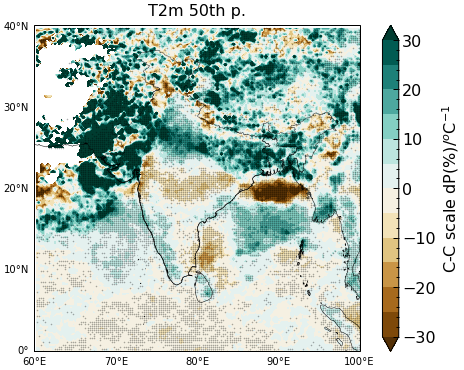

In [52]:
# India T2m 95th
ccplot.plot_3d(t2m_slope_da95, t2m_p_da95, ind, 'T2m 95th p.', threshold_sig=0.05, marker_size=0.3, freq=1, alpha_stipple=0.3, levels=levels, extend='both')
plt.savefig('./images/monsoon/pentad1_95/india_t2m95.pdf', dpi=300)

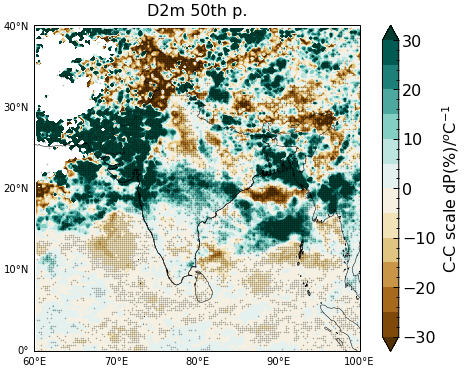

In [53]:
# India D2m 95th
ccplot.plot_3d(d2m_slope_da95, d2m_p_da95, ind, 'D2m 95th p.', threshold_sig=0.05, marker_size=0.3, freq=1, alpha_stipple=0.3, levels=levels, extend='both')
plt.savefig('./images/monsoon/pentad1_95/india_d2m95.pdf', dpi=300)